In [1]:
# standard data analysis modules
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.ticker as ticker

from matplotlib_venn import venn2
from matplotlib_venn import venn3

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# check on the panda version and its dependencies
#pd.__version__
#pd.show_versions()

In [3]:
# to read a directory on my PC
import glob

In [4]:
# regex to take dates from file names
import re

In [5]:
# to remove items from a list but keep the order
from more_itertools import unique_everseen

In [6]:
# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

In [7]:
# Presentation preperation and image saving

# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images and also slide titles)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

# list of slide titles, text and images to add
dateNow = 'April 2020'
presentationTitle = ['AutoTrader data visualisation', 'Andrew Neville', dateNow]
saveFileName = 'presentationPrep - AutoTrader.pptx'
slideTitle = []
slideText = []
imagePath = []

In [8]:
# to keep a track of errors that may occur

error_list = []

In [9]:
# list the files in the directory, will use the list of file names to create the Dataframes
# ignore all files with _cleaned in them, we are going for the raw data now
files = []
files = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1*.csv")
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1yyyymmdd")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1yyyymmdd")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1*.csv")
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1/autotrader1yyyymmdd")

# eliminate files that are names autotrader1*_cleaned.csv where the same file autotrader1*.csv exists
test_to_delete = []
for i in range(len(files)-1):
    if files[i][0:testLength] == files[i+1][0:testLength]:
        test_to_delete.append(files[i+1])

files = sorted(list(set(files)^set(test_to_delete))) # need to keep files in order when eliminating the duplicates

print("files to read ", str(len(files)))
print("first file ",files[0])
print("last file ", files[-1])

files to read  104
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1\autotrader120180506.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Autotrader1/autotrader1\autotrader120200424.csv


In [10]:
#
# create DataFrames
# for each dataframe created, the dtypes will be converted to reduce memeory usage
# and then the next dataframe created and so on
#

In [11]:
%%time

# this will create x number of Dataframes from the csv sheets, df[0] to df[n]

dataCollected = []
dataRemaining = []
original_memory = []
final_memory = []
drop_address = []
drop_isNationalStockAdvert = []
fuel_cat = []
advert_type_cat = []
page_type_cat = []
condition_cat = []
writeOffCategory_cat = []
franchiseApproved_cat = []
quoteType_cat = []
transmission_cat = []

df = []

for i in range(len(files)):
    
    # record the initial status 
    df.append(pd.read_csv(files[i], low_memory=False))
    dataCollected.append(df[i].shape[0]*df[i].shape[1])
    original_memory.append(df[i].memory_usage(deep=True).sum())
    drop_address.append(df[i]['address'].count())
    drop_isNationalStockAdvert.append(df[i]['isNationalStockAdvert'].count())
    fuel_cat.append(list(df[i]['fuel'].unique()))
    advert_type_cat.append(list(df[i]['advert_type'].unique()))
    page_type_cat.append(list(df[i]['page_type'].unique()))
    condition_cat.append(list(df[i]['condition'].unique()))
    writeOffCategory_cat.append(list(df[i]['writeOffCategory'].unique()))
    franchiseApproved_cat.append(list(df[i]['franchiseApproved'].unique()))
    quoteType_cat.append(list(df[i]['quoteType'].unique()))
    transmission_cat.append(df[i]['transmission'].count()\
                            - df[i][df[i]['transmission'] == 'Automatic']['name'].count()\
                            - df[i][df[i]['transmission'] == 'Manual']['name'].count()) 

    # reduce memory usage
    # drop two columns with no values in them
    df[i].drop('address', axis=1, inplace=True)
    df[i].drop('isNationalStockAdvert', axis=1, inplace=True)
    
    # put other columns to category
    df[i]['fuel'] = df[i]['fuel'].astype('category')
    df[i]['advert_type'] = df[i]['advert_type'].astype('category')
    df[i]['page_type'] = df[i]['page_type'].astype('category')
    df[i]['condition'] = df[i]['condition'].astype('category')
    df[i]['writeOffCategory'] = df[i]['writeOffCategory'].astype('category')
    df[i]['franchiseApproved'] = df[i]['franchiseApproved'].astype('category')
    df[i]['quoteType'] = df[i]['quoteType'].astype('category')
    raw_cat = pd.Categorical(df[i]['transmission'], categories = ['Manual','Automatic'])
    df[i]['transmission'] = pd.Series(raw_cat)
    
    # put other columns to float
    df[i]['miles'] = df[i]['miles'].replace('[,]', '', regex=True).astype(float)
    df[i]['price'] = df[i]['price'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['monthlyPayment'] = df[i]['monthlyPayment'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['customerDeposit'] = df[i]['customerDeposit'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['totalCredit'] = df[i]['totalCredit'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['totalAmountPayable'] = df[i]['totalAmountPayable'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['totalInterestPayable'] = df[i]['totalInterestPayable'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['finalPayment'] = df[i]['finalPayment'].replace('[\£,]', '', regex=True).astype(float)
    df[i]['optionToPurchaseFee'] = df[i]['optionToPurchaseFee'].replace('[\£,]', '', regex=True).astype(float)
    
    # gather post adjustement stats
    dataRemaining.append(df[i].shape[0]*df[i].shape[1])
    final_memory.append(df[i].memory_usage(deep=True).sum())

Wall time: 20min 34s


In [12]:
# show summary output of number of dataframes created, datapoints collected, memory reduced

print(len(df),"dataframes created")
print('original data points collected from',len(dataCollected),'dataframes was',sum(dataCollected))
print('original memory over',len(original_memory),'dataframes was',sum(original_memory))
print('data points remaining from',len(dataRemaining),'dataframes was',sum(dataRemaining), '= a',\
      "{0:.0%}".format(1-(sum(dataRemaining)/sum(dataCollected))), 'reduction')
print('final memory over',len(final_memory),'dataframes was',sum(final_memory), '= a',\
      "{0:.0%}".format(1-(sum(final_memory)/sum(original_memory))),'recution')

104 dataframes created
original data points collected from 104 dataframes was 1735406240
original memory over 104 dataframes was 79817456319
data points remaining from 104 dataframes was 1633323520 = a 6% reduction
final memory over 104 dataframes was 29528758449 = a 63% recution


In [13]:
# check the lists of categories for non-common or new items
# this is work in progress

condition_check = ['Used', 'Nearly New', 'New']
fuel_check = ['Petrol', 'Diesel', 'nan', 'Electric']
advert_type_check = ['STANDARD_ADVERT', 'ALLOCATED_STOCK', 'NETWORK_STOCK']
page_type_check = ['Trade']
writeOffCategory_check = ['nan', 'C', 'D', 'N', 'S', 'F']
franchiseApproved_check = ['false', 'false}', 'true', 'true}']
quoteType_cat = ['nan', 'HP', 'PCP']
max(transmission_cat)

1318

In [14]:
# exploring the general data
df[-1].head()
#df[-1].tail()
#df[-1].info(memory_usage='deep')
#df[-1].describe()


cars                      name  \
0    17  P W SALES NORTH WEST LTD   
1    17  P W SALES NORTH WEST LTD   
2    17  P W SALES NORTH WEST LTD   
3    17  P W SALES NORTH WEST LTD   
4    17  P W SALES NORTH WEST LTD   

                                          dealer_url  dealerReviewValue  \
0  /dealers/greater-manchester/salford/p-w-sales-...                5.0   
1  /dealers/greater-manchester/salford/p-w-sales-...                5.0   
2  /dealers/greater-manchester/salford/p-w-sales-...                5.0   
3  /dealers/greater-manchester/salford/p-w-sales-...                5.0   
4  /dealers/greater-manchester/salford/p-w-sales-...                5.0   

   numberOfDealerReview           veh_id  \
0                  10.0  201912085147854   
1                  10.0  202003078144502   
2                  10.0  202002217565706   
3                  10.0  202001196329742   
4                  10.0  202003138401428   

                                         description   price   registration  \
0  Renault Megane,Renault Megane 2.0 VVT Dynamiqu...   895.0  2006 (06 reg)   
1            Nissan Micra,Nissan Micra 1.2 16v S 3dr   995.0  2006 (06 reg)   
2              Fiat Panda,Fiat Panda 1.2 Dynamic 5dr   995.0  2006 (06 reg)   
3  Renault Megane,Renault Megane 1.9 dCi FAP Priv...   995.0  2005 (55 reg)   
4                  MINI Hatch,MINI Hatch 1.6 One 3dr  1145.0  2003 (03 reg)   

      miles transmission engine    fuel      advert_type page_type condition  \
0   81022.0       Manual   2.0L  Petrol  STANDARD_ADVERT     Trade      Used   
1   73225.0       Manual   1.2L  Petrol  STANDARD_ADVERT     Trade      Used   
2   77964.0       Manual   1.2L  Petrol  STANDARD_ADVERT     Trade      Used   
3   97000.0       Manual   1.9L  Diesel  STANDARD_ADVERT     Trade      Used   
4  111900.0       Manual   1.6L  Petrol  STANDARD_ADVERT     Trade      Used   

  writeOffCategory  manufacturerApproved franchiseApproved  totalImages  \
0              NaN                 False             false           27   
1              NaN                 False             false           22   
2              NaN                 False             false           24   
3              NaN                 False             false           22   
4              NaN                 False             false           21   

   hasVideo  monthlyPayment quoteType  duration  customerDeposit  totalCredit  \
0     False             NaN       NaN       NaN              NaN          NaN   
1     False             NaN       NaN       NaN              NaN          NaN   
2     False             NaN       NaN       NaN              NaN          NaN   
3     False             NaN       NaN       NaN              NaN          NaN   
4     False             NaN       NaN       NaN              NaN          NaN   

   totalAmountPayable  representativeApr  totalInterestPayable  \
0                 NaN                NaN                   NaN   
1                 NaN                NaN                   NaN   
2                 NaN                NaN                   NaN   
3                 NaN                NaN                   NaN   
4                 NaN                NaN                   NaN   

   fixedRateInterest  finalPayment  optionToPurchaseFee  
0                NaN           NaN                  NaN  
1                NaN           NaN                  NaN  
2                NaN           NaN                  NaN  
3                NaN           NaN                  NaN  
4                NaN           NaN                  NaN

In [15]:
# df[-1].memory_usage(deep=True)

In [16]:
#check for double counting with veh_id in all DataFrames
double_count = []
for i in range(len(df)):
    double_count.append(df[i].veh_id.count() - len(df[i].veh_id.unique()))
#double_count

In [17]:
# creating a list of the file dates
# now not using _cleaned.csv but going straight to the original raw file

date = []
for i in range(len(df)):
    date.append((re.search('(?<=autotrader1)(\d{8})', files[i])).group(0)[6:8]+"/"+
(re.search('(?<=autotrader1)(\d{8})', files[i])).group(0)[4:6]+"/"+
(re.search('(?<=autotrader1)(\d{8})', files[i])).group(0)[0:4])
    
# remove the duplicates but keep the order
date=list(unique_everseen(date))

In [18]:
# create the start of the summary dataFrame
data = {'Date': date}

df_summary = pd.DataFrame(data, columns=['Date'])

In [19]:
monthNow = df_summary['Date'].iloc[-1]

In [20]:
df_summary.head()


Date
0  06/05/2018
1  11/05/2018
2  19/05/2018
3  26/05/2018
4  01/06/2018

In [21]:
# first columns will be condition (total cars, new, nearly new, used)
# check that 'condition' only has those three in the last dataframe
# using error_list to keep a track of any errors

test_list = list(set(df[-1]['condition']))

if test_list == ['Used', 'Nearly New', 'New']:
    error_list.append(0)
else:
    error_list.append(1)

error_list

[0]

In [22]:
# create columns for total cars, used, nearly new and new
total_condition = [] # this is also the total rows in each dataframe
used = []
nearlynew = []
new = []
for i in range(len(df)):
    total_condition.append(df[i]['condition'].count())
    used.append(df[i]['condition'].value_counts()['Used'])
    nearlynew.append(df[i]['condition'].value_counts()['Nearly New'])
    new.append(df[i]['condition'].value_counts()['New'])

df_summary['Total Cars'] = total_condition
df_summary['New'] = new
df_summary['Nearly New'] = nearlynew
df_summary['Used'] = used

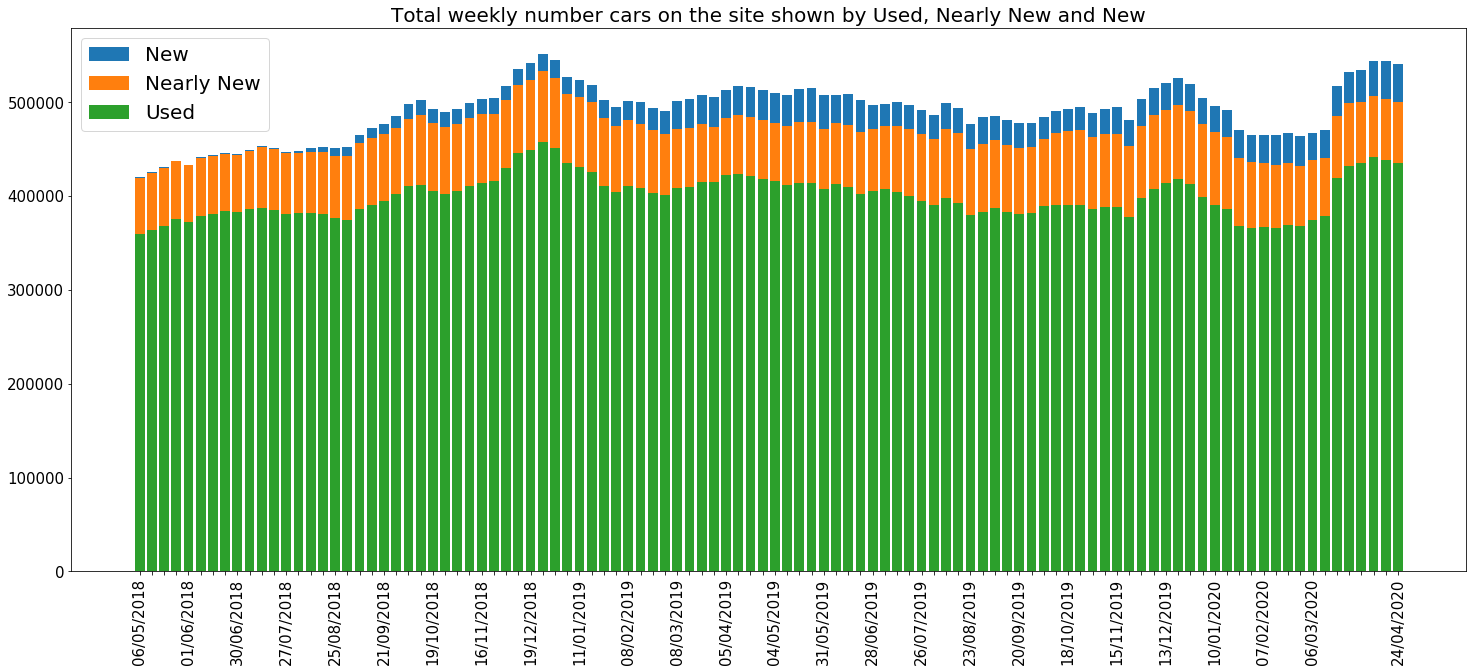

In [23]:
# 1 bar chart showing total cars broken down by used, nearly new and new

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary.index.values

labels = list(df_summary['Date'])

for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

chart_cols=['Used','Nearly New','New']
cum_sum = [0]*len(df_summary)
y = [0]*len(chart_cols)

for i in range(0,len(chart_cols)):
    cum_sum = cum_sum + df_summary[chart_cols[i]]
    y[i] = cum_sum

ax.set_title('Total weekly number cars on the site shown by Used, Nearly New and New', fontsize=20)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_tick_params(labelsize=15)


for i in range(len(chart_cols)-1,-1,-1):
    ax.bar(x, y[i], label = chart_cols[i])

ax.legend(fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - bar chart of cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Cars on the site by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - bar chart of cars on site.png')

plt.show()


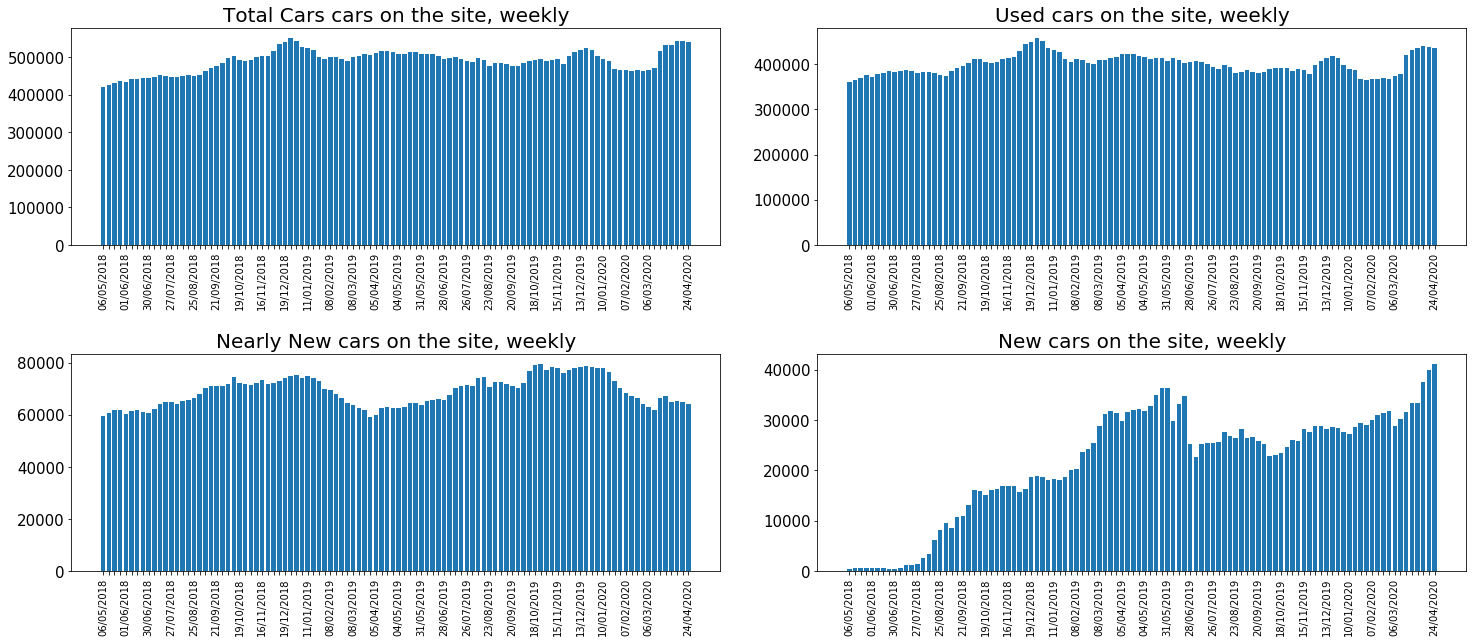

In [24]:
# 4 bar charts showing total cars, used cars, nearly new cars, new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['Total Cars','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(chart_cols[i] + str(' cars on the site, weekly'), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on cars by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Cars on the site: Total; Used; Nearly New; and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on cars by condition.png')

plt.show()

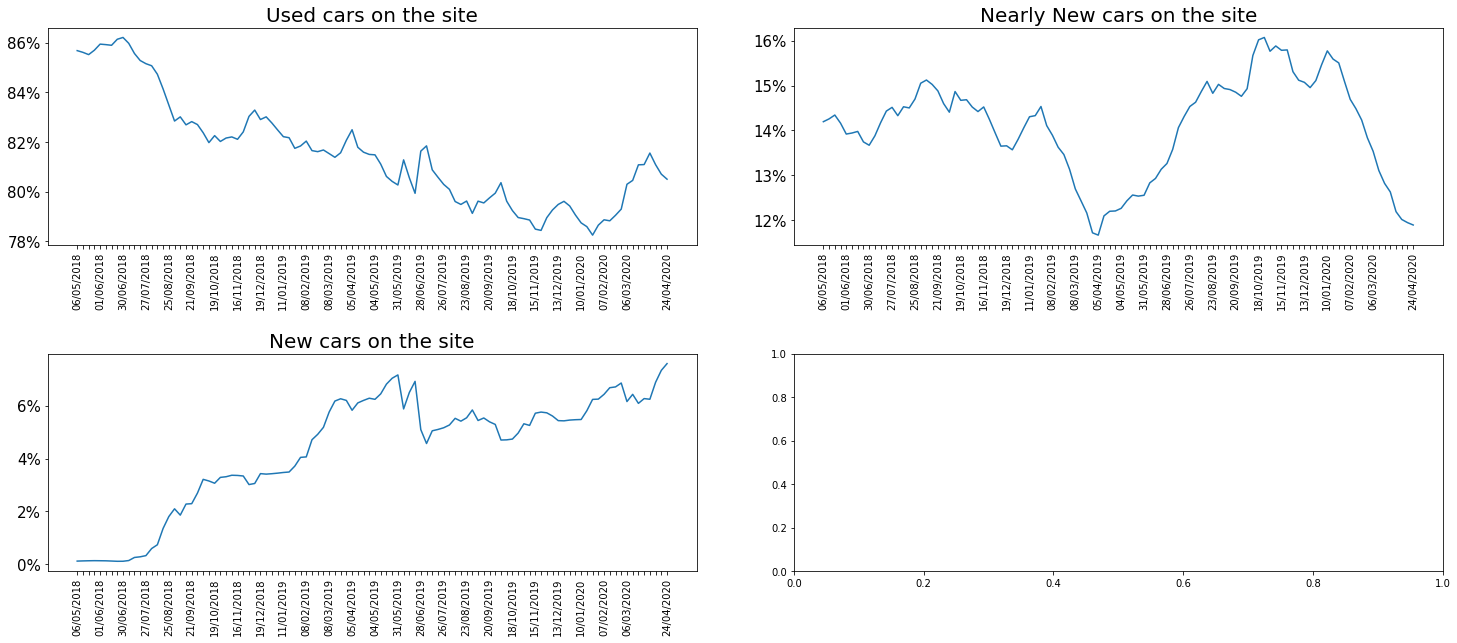

In [25]:
# 4 line charts showing % of total cars that are: used cars; nearly new cars; and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['Used','Nearly New','New']

for i in range(3):
    y.append(df_summary[chart_cols[i]]/df_summary['Total Cars'])
    ax[int(i/2),i%2].set_title(chart_cols[i] + str(' cars on the site'), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 line charts on cars by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Percentage of Cars on the site: Used; Nearly New; and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 line charts on cars by condition.png')

plt.show()

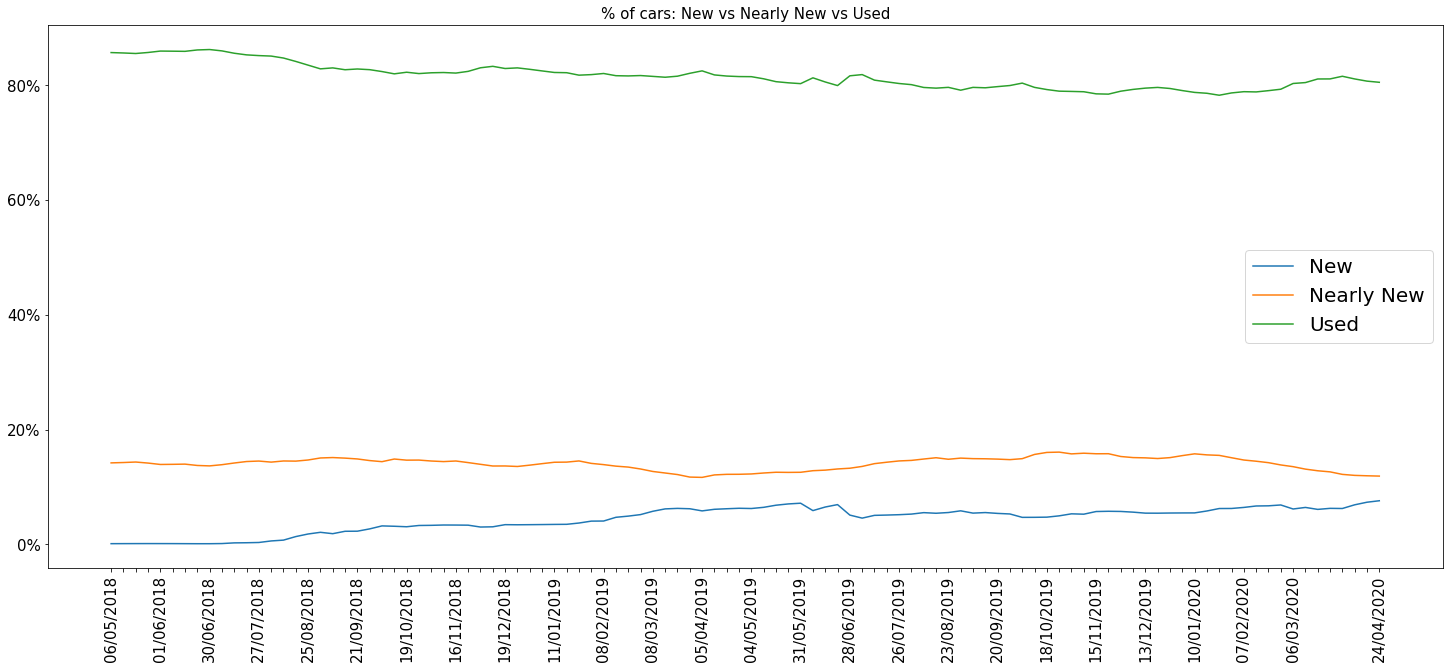

In [26]:
# plot 1 line chart of % New cars, Nearly New cars and Used cars

fig, ax = plt.subplots(figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_summary.index.values

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = (df_summary['New']/df_summary['Total Cars'])
y2 = (df_summary['Nearly New']/df_summary['Total Cars'])
y3 = (df_summary['Used']/df_summary['Total Cars'])

ax.set_title('% of cars: New vs Nearly New vs Used', fontsize=15)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.yaxis.set_tick_params(labelsize=15)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.legend(('New', 'Nearly New', 'Used'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - % of cars by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('% of cars by New vs Nearly New vs Used on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - % of cars by condition.png')   
    
plt.show()

In [27]:
# create columns for number of dealers (i.e. forecourts) and also by used, nearly new and new
# this will determine the number of dealers with at least one of used and/or nearly new and/or new

In [28]:
cars_total = []
new_name = []
nearlyNew_name = []
used_name = []

for i in range(len(df)):
    cars_total.append(df[i]['name'].nunique())
    new_name.append(df[i][(df[i]['condition'] == 'New')]['name'].nunique())
    nearlyNew_name.append(df[i][(df[i]['condition'] == 'Nearly New')]['name'].nunique())
    used_name.append(df[i][(df[i]['condition'] == 'Used')]['name'].nunique())

df_summary['forecourts_total'] = cars_total
df_summary['forecourts_used'] = used_name
df_summary['forecourts_nearlyNew'] = nearlyNew_name
df_summary['forecourts_new'] = new_name


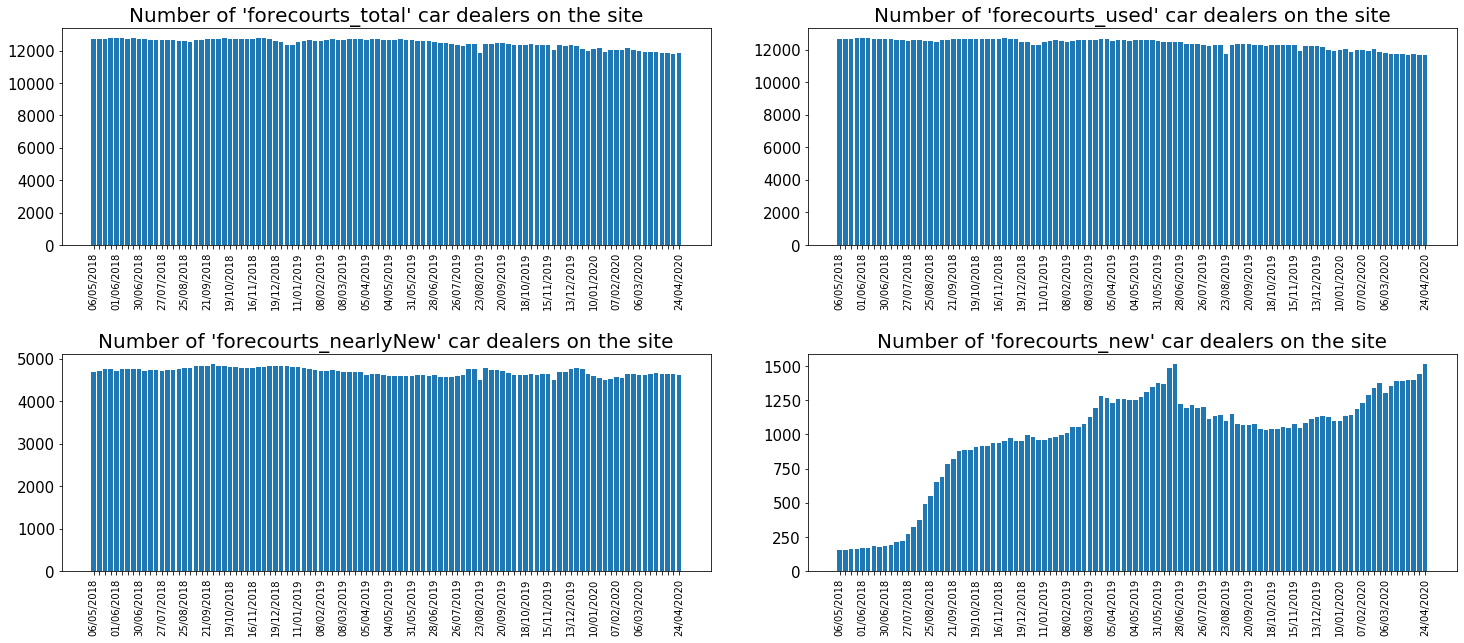

In [29]:
# 4 bar charts showing total dealers for total, used cars, nearly new cars, new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['forecourts_total','forecourts_used','forecourts_nearlyNew','forecourts_new']
chart_totles=['Total','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Number of '") + chart_cols[i] + str("' car dealers on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on dealers by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Dealers (forecourts) on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on dealers by condition.png')

plt.show()

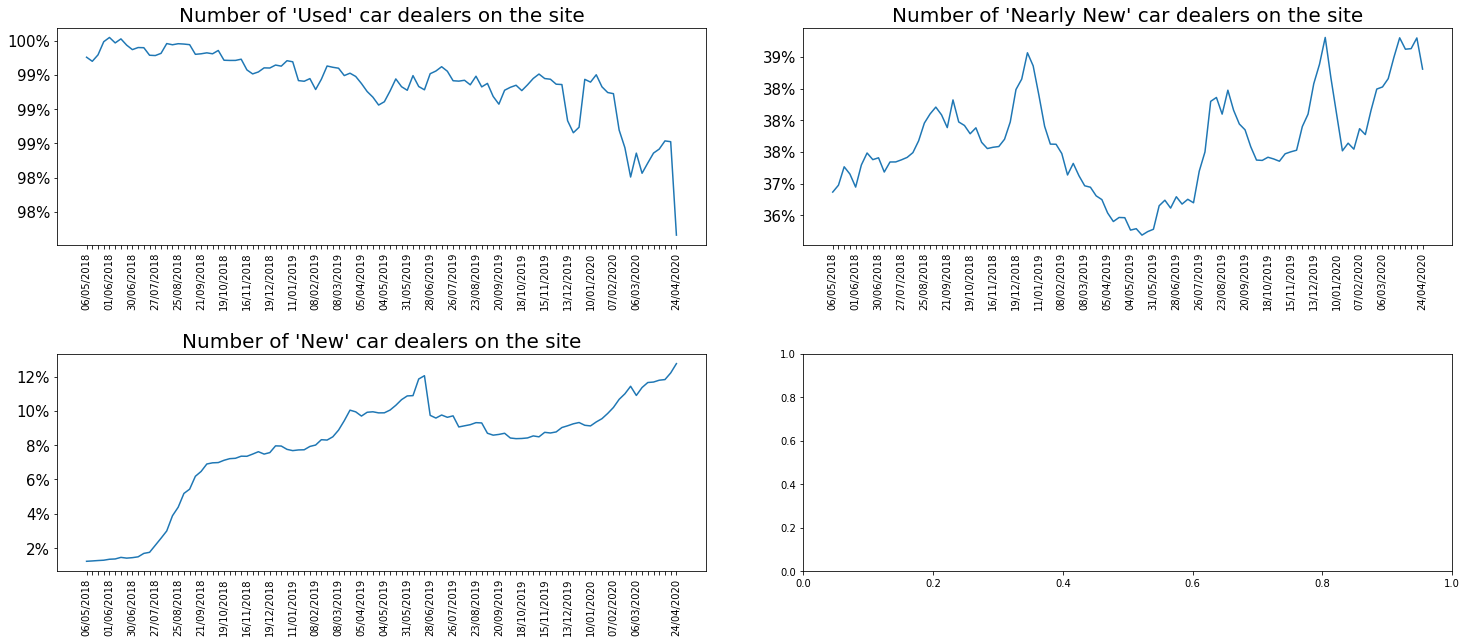

In [30]:
# 4 line charts showing % of dealers that are used cars, nearly new cars, new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['forecourts_used','forecourts_nearlyNew','forecourts_new']
chart_titles=['Used','Nearly New','New']

for i in range(3):
    y.append(df_summary[chart_cols[i]]/df_summary['forecourts_total'])
    ax[int(i/2),i%2].set_title(str("Number of '") + chart_titles[i] + str("' car dealers on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on % dealers by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Dealers on the site - % by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on % dealers by condition.png')

plt.show()

In [31]:
# total values of the cars on the site

price_sum = []
price_new_sum = []
price_nearlyNew_sum = []
price_used_sum = []

for i in range(len(df)):
    price_sum.append(df[i]['price'].sum())
    price_new_sum.append(df[i][(df[i]['condition'] == 'New')]['price'].sum())
    price_nearlyNew_sum.append(df[i][(df[i]['condition'] == 'Nearly New')]['price'].sum())
    price_used_sum.append(df[i][(df[i]['condition'] == 'Used')]['price'].sum())

df_summary['total_value'] = price_sum
df_summary['total_used'] = price_used_sum
df_summary['total_nearlyNew'] = price_nearlyNew_sum
df_summary['total_new'] = price_new_sum

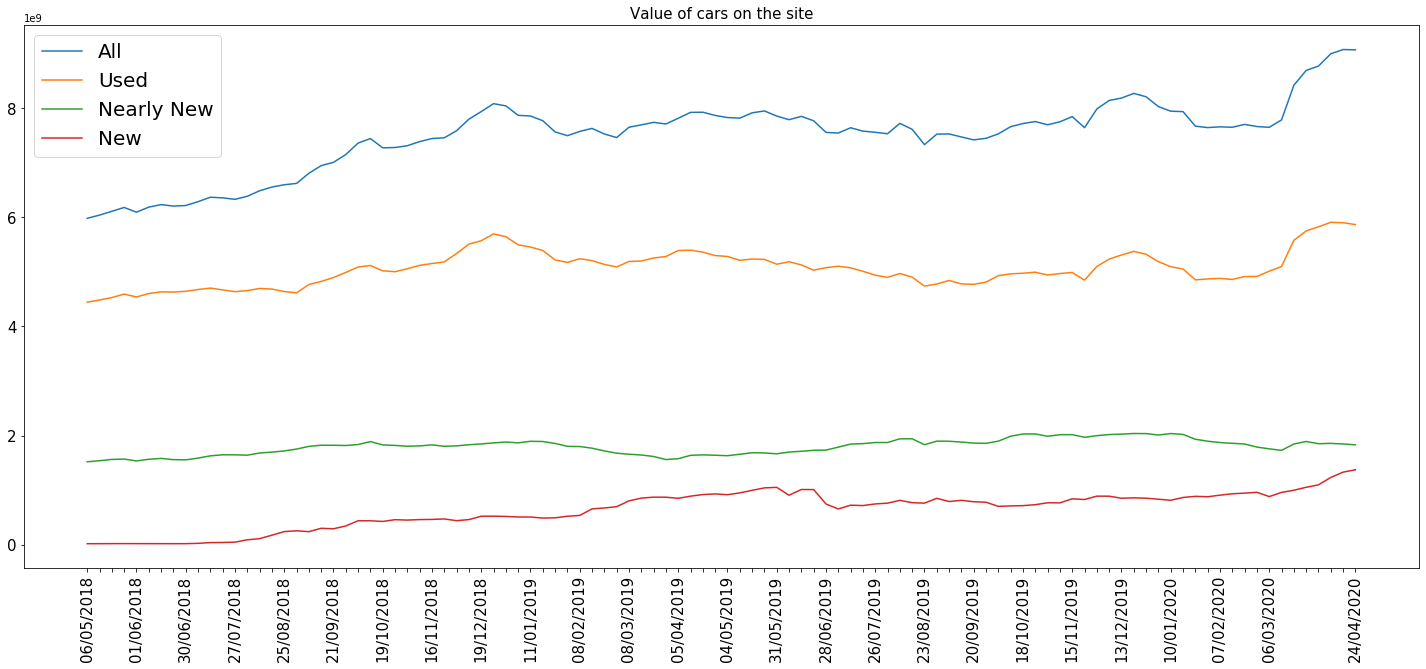

In [32]:
# plot 1 line chart of value of all cars on the site: New cars, Nearly New cars and Used cars

fig, ax = plt.subplots(figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_summary.index.values

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['total_value']
y2 = df_summary['total_used']
y3 = df_summary['total_nearlyNew']
y4 = df_summary['total_new']


ax.set_title('Value of cars on the site', fontsize=15)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_tick_params(labelsize=15)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
ax.legend(('All', 'Used', 'Nearly New', 'New'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - value of cars on the site', bbox_inches = 'tight')
    
    slideTitle.append('Value of cars on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - value of cars on the site.png')   
    
plt.show()

In [33]:
# average price of cars on the site

total_mean = []
new_mean = []
nearlyNew_mean = []
used_mean = []

for i in range(len(files)):
    total_mean.append(df[i]['price'].mean())
    new_mean.append(df[i][(df[i]['condition'] == 'New')]['price'].mean())
    nearlyNew_mean.append(df[i][(df[i]['condition'] == 'Nearly New')]['price'].mean())
    used_mean.append(df[i][(df[i]['condition'] == 'Used')]['price'].mean())
    
df_summary['avePrice_total'] = total_mean
df_summary['avePrice_used'] = used_mean
df_summary['avePrice_nearlyNew'] = nearlyNew_mean
df_summary['avePrice_new'] = new_mean

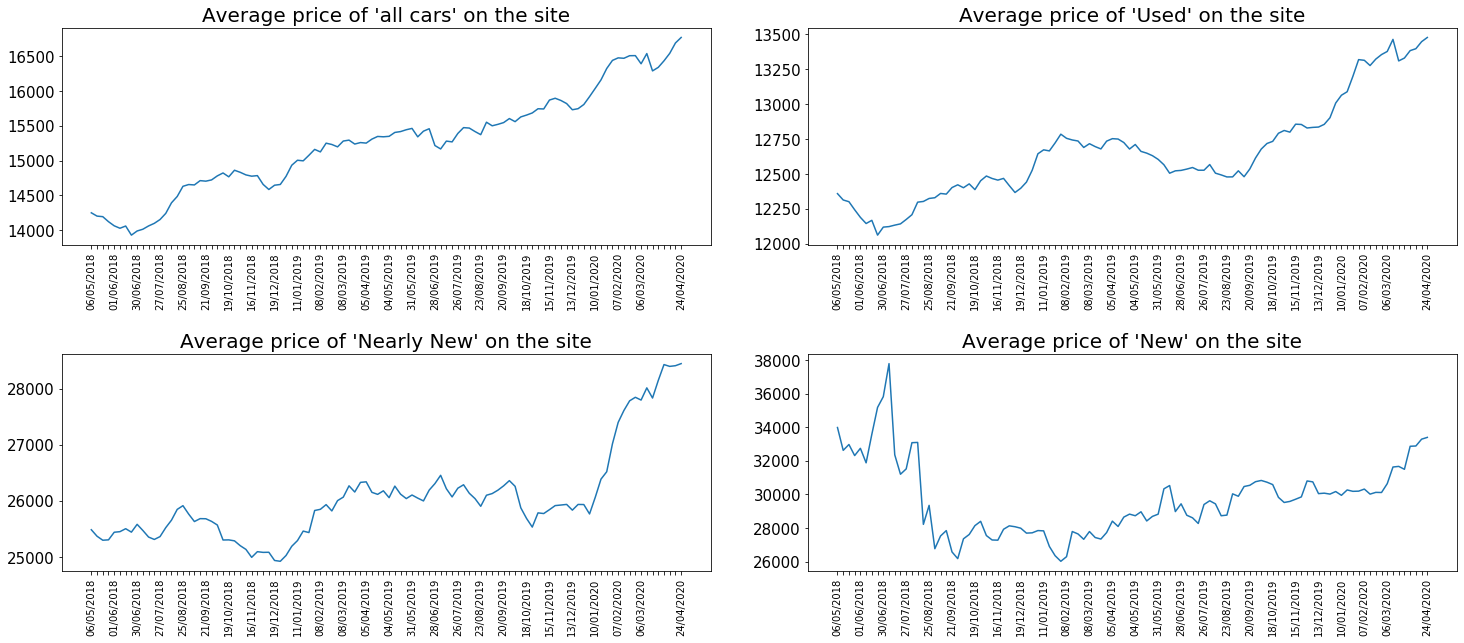

In [34]:
# 4 line charts showing average price of all, used, nearly new and new cars on the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['avePrice_total','avePrice_used','avePrice_nearlyNew','avePrice_new']
chart_titles=['all cars','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Average price of '") + chart_titles[i] + str("' on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].plot(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts of average car price.png', bbox_inches = 'tight')
    
    slideTitle.append('Average Car Price on the site - All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts of average car price.png')

plt.show()

In [35]:
# add in columns for number of videos and total images

hasVideo = []
totalImages = []
new_hasVideo = []
new_totalImages = []
nearlyNew_hasVideo = []
nearlyNew_totalImages = []
used_hasVideo = []
used_totalImages = []

for i in range(len(df)):
    hasVideo.append(df[i][(df[i]['hasVideo'] == True)]['cars'].count())
    totalImages.append(df[i]['totalImages'].sum())
    new_hasVideo.append(df[i][(df[i]['condition'] == 'New') & (df[i]['hasVideo'] == True)]['cars'].count())
    new_totalImages.append(df[i][(df[i]['condition'] == 'New')]['totalImages'].sum())
    nearlyNew_hasVideo.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['hasVideo'] == True)]['cars'].count())
    nearlyNew_totalImages.append(df[i][(df[i]['condition'] == 'Nearly New')]['totalImages'].sum())    
    used_hasVideo.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['hasVideo'] == True)]['cars'].count())
    used_totalImages.append(df[i][(df[i]['condition'] == 'Used')]['totalImages'].sum())
    
df_summary['total_hasVideo'] = hasVideo
df_summary['totalImages'] = totalImages
df_summary['used_hasVideo'] = used_hasVideo
df_summary['usedImages'] = used_totalImages
df_summary['nearlyNew_hasVideo'] = nearlyNew_hasVideo
df_summary['nearlyNewImages'] = nearlyNew_totalImages
df_summary['new_hasVideo'] = new_hasVideo
df_summary['newImages'] = new_totalImages


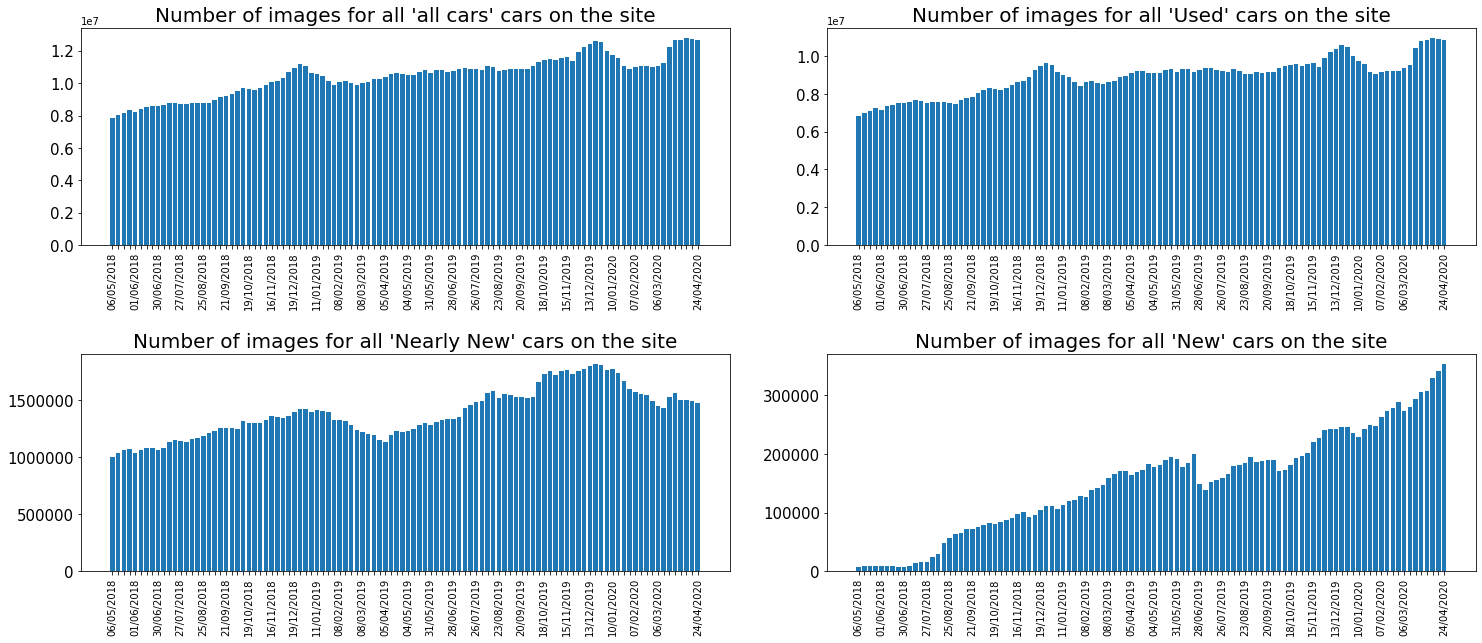

In [36]:
# 4 bar charts showing number of images for all, used, nearly new and new cars on the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['totalImages','usedImages','nearlyNewImages','newImages']
chart_titles=['all cars','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Number of images for all '") + chart_titles[i] + str("' cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts images.png', bbox_inches = 'tight')
    
    slideTitle.append('Number of images by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts images.png')

plt.show()

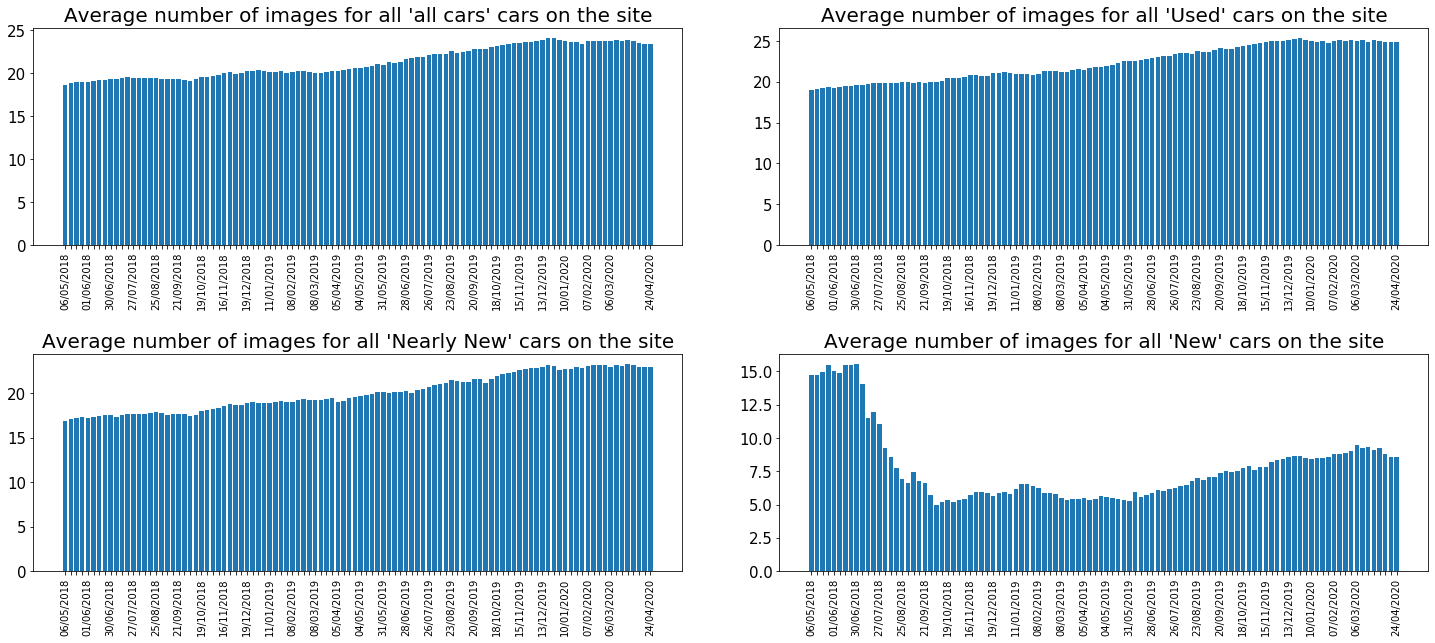

In [37]:
# 4 bar charts showing average number of images for all, used, nearly new and new cars on the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['totalImages','usedImages','nearlyNewImages','newImages']
chart_titles=['all cars','Used','Nearly New','New']
chart_cols_1=['Total Cars','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]]/df_summary[chart_cols_1[i]])
    ax[int(i/2),i%2].set_title(str("Average number of images for all '") + chart_titles[i] + str("' cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts average images.png', bbox_inches = 'tight')
    
    slideTitle.append('Average Number of images per car by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts average images.png')

plt.show()

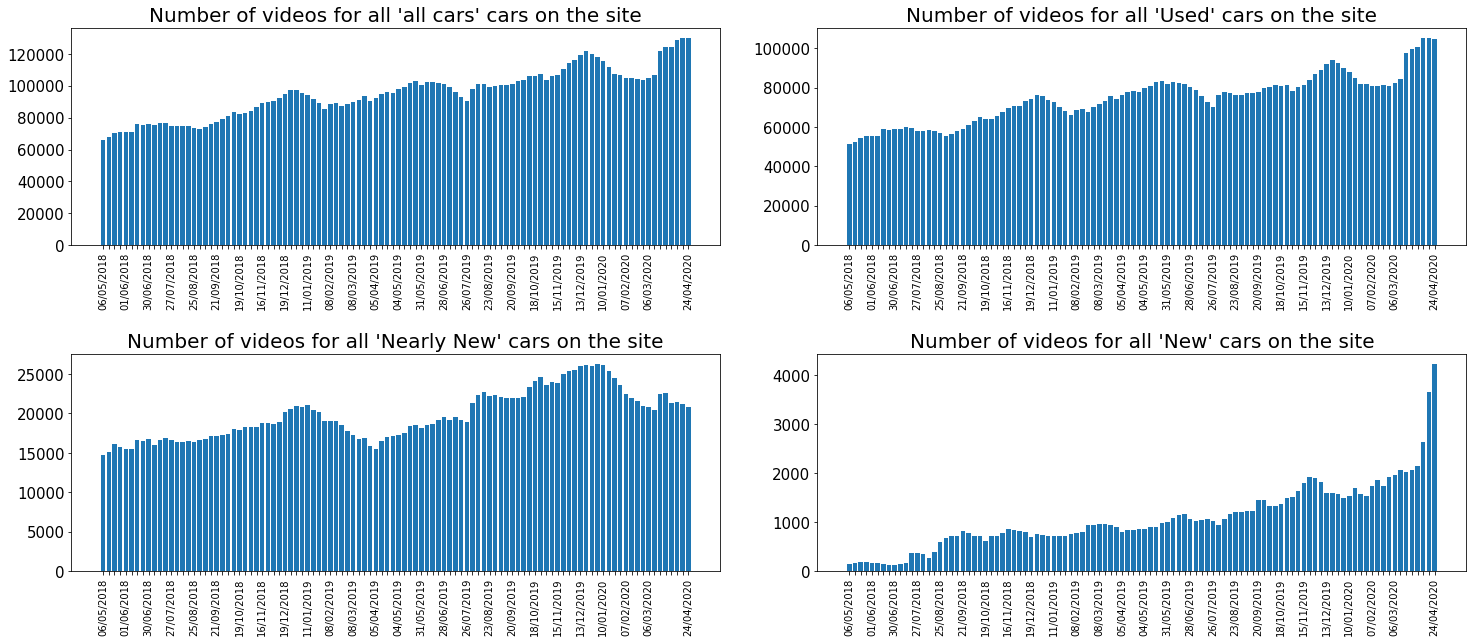

In [38]:
# 4 bar charts showing number of videos for all, used, nearly new and new cars on the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total_hasVideo','used_hasVideo','nearlyNew_hasVideo','new_hasVideo']
chart_titles=['all cars','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Number of videos for all '") + chart_titles[i] + str("' cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts videos.png', bbox_inches = 'tight')
    
    slideTitle.append('Number of videos by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts videos.png')

plt.show()

In [39]:
# add columns for fuel type for new, nearly new and used cars

total_fuelPetrol = []
total_fuelDiesel = []
total_fuelElectric = []
new_fuelPetrol = []
new_fuelDiesel = []
new_fuelElectric = []
nearlyNew_fuelPetrol = []
nearlyNew_fuelDiesel = []
nearlyNew_fuelElectric = []
used_fuelPetrol = []
used_fuelDiesel = []
used_fuelElectric = []

for i in range(len(df)):
    total_fuelPetrol.append(df[i][(df[i]['fuel'] == 'Petrol')]['fuel'].count())
    total_fuelDiesel.append(df[i][(df[i]['fuel'] == 'Diesel')]['fuel'].count())
    total_fuelElectric.append(df[i][(df[i]['fuel'] == 'Electric')]['fuel'].count())
    new_fuelPetrol.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Petrol')]['fuel'].count())
    new_fuelDiesel.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Diesel')]['fuel'].count())
    new_fuelElectric.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Electric')]['fuel'].count())
    nearlyNew_fuelPetrol.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Petrol')]['fuel'].count())
    nearlyNew_fuelDiesel.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Diesel')]['fuel'].count())
    nearlyNew_fuelElectric.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Electric')]['fuel'].count())    
    used_fuelPetrol.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Petrol')]['fuel'].count())
    used_fuelDiesel.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Diesel')]['fuel'].count())
    used_fuelElectric.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Electric')]['fuel'].count())    

df_summary['total_fuelPetrol'] = total_fuelPetrol
df_summary['total_fuelDiesel'] = total_fuelDiesel
df_summary['total_fuelElectric'] = total_fuelElectric
df_summary['used_fuelPetrol'] = used_fuelPetrol
df_summary['used_fuelDiesel'] = used_fuelDiesel
df_summary['used_fuelElectric'] = used_fuelElectric
df_summary['nearlyNew_fuelPetrol'] = nearlyNew_fuelPetrol
df_summary['nearlyNew_fuelDiesel'] = nearlyNew_fuelDiesel
df_summary['nearlyNew_fuelElectric'] = nearlyNew_fuelElectric
df_summary['new_fuelPetrol'] = new_fuelPetrol
df_summary['new_fuelDiesel'] = new_fuelDiesel
df_summary['new_fuelElectric'] = new_fuelElectric


In [40]:
# % of cars with a Fuel type assigned in the last dataframe

df[-1]['fuel'].count()/df[-1].shape[0], df[-1].shape[0]-df[i]['condition'].count()

(0.954426382857576, 0)

In [41]:
# petrol and diesel as a % of all fuels in the last dataframe
i=-1
(df[i][(df[i]['fuel'] == 'Petrol') | (df[i]['fuel'] == 'Diesel')]['fuel'].count())/df[i]['fuel'].count()

0.9999341436250061

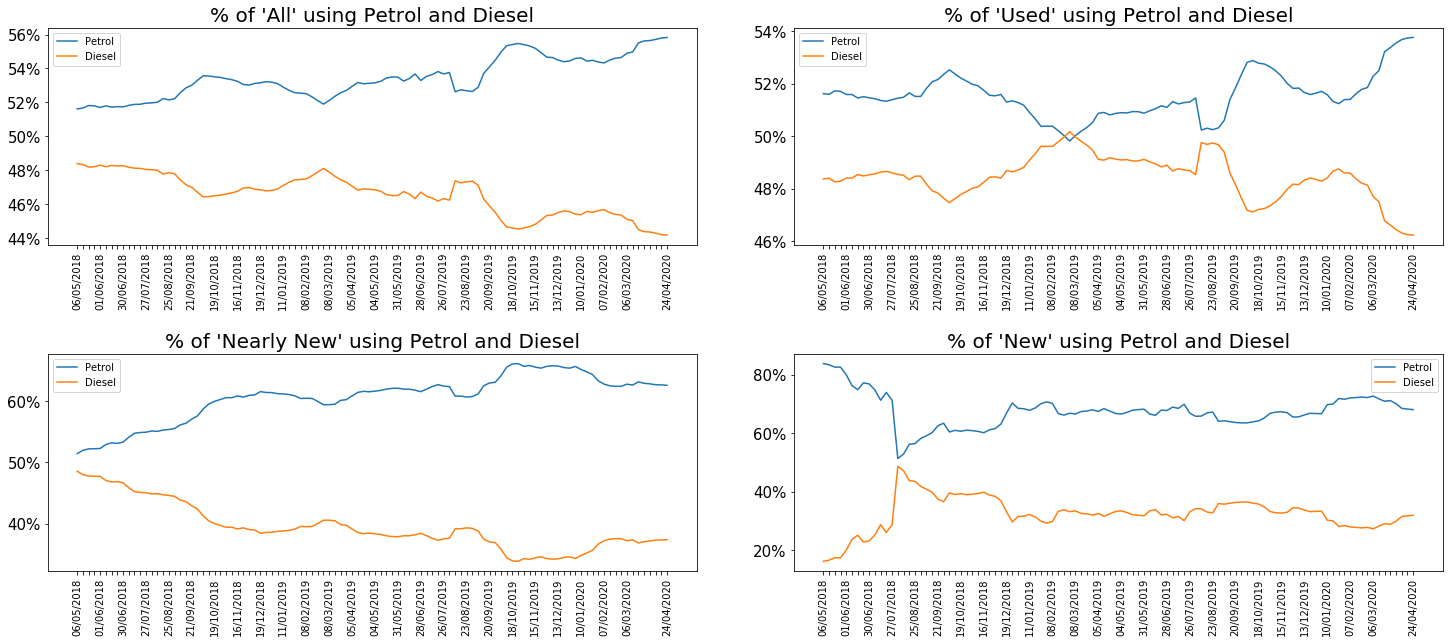

In [42]:
# 4 line charts showing % of Petrol vs Diesel for all, used, nearly new and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total_fuelPetrol','total_fuelDiesel','used_fuelPetrol','used_fuelDiesel',
           'nearlyNew_fuelPetrol','nearlyNew_fuelDiesel','new_fuelPetrol','new_fuelDiesel']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[2*i]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y.append(df_summary[chart_cols[(2*i)+1]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' using Petrol and Diesel"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y[2*i], label='Petrol')
    ax[int(i/2),i%2].plot(x, y[(2*i)+1], label='Diesel')
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on fuel condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Fuel type - % by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on fuel condition.png')

plt.show()

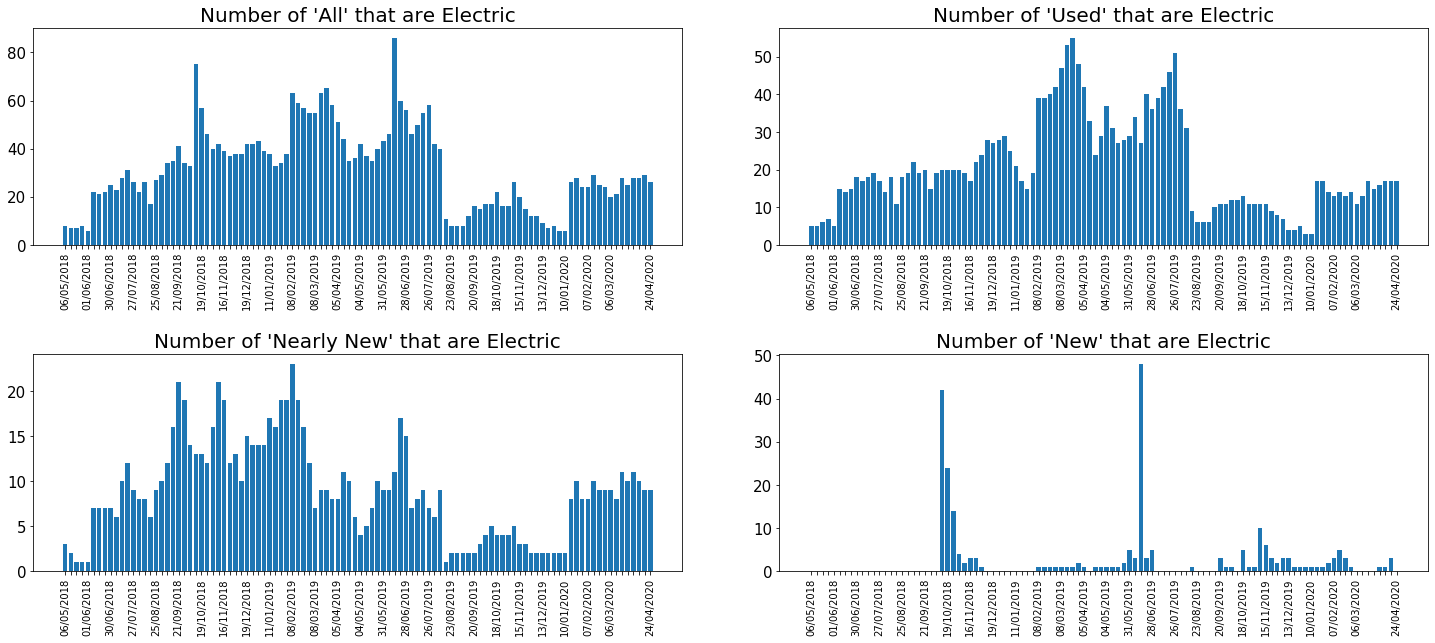

In [43]:
# 4 line charts showing total Election cars on the site for all, used, nearly new and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total_fuelElectric','used_fuelElectric', 'nearlyNew_fuelElectric','new_fuelElectric']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Number of '") + chart_titles[i] + str("' that are Electric"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on Electric cars.png', bbox_inches = 'tight')
    
    slideTitle.append('Fuel Electric - All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on Electric cars.png')

plt.show()

In [44]:
# add columns for transmission type for all, used, nearly new and new

total_automatic = []
total_manual = []
new_automatic = []
new_manual = []
nearlyNew_automatic = []
nearlyNew_manual = []
used_automatic = []
used_manual = []

for i in range(len(df)):
    total_automatic.append(df[i][(df[i]['transmission'] == 'Automatic')]['transmission'].count())
    total_manual.append(df[i][(df[i]['transmission'] == 'Manual')]['transmission'].count())
    new_automatic.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Automatic')]['transmission'].count())
    new_manual.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Manual')]['transmission'].count())
    nearlyNew_automatic.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Automatic')]['transmission'].count())
    nearlyNew_manual.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Manual')]['transmission'].count())
    used_automatic.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Automatic')]['transmission'].count())
    used_manual.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Manual')]['transmission'].count())

df_summary['total_automatic'] = total_automatic
df_summary['total_manual'] = total_manual
df_summary['used_automatic'] = used_automatic
df_summary['used_manual'] = used_manual
df_summary['nearlyNew_automatic'] = nearlyNew_automatic
df_summary['nearlyNew_manual'] = nearlyNew_manual
df_summary['new_automatic'] = new_automatic
df_summary['new_manual'] = new_manual


In [45]:
# % of cars with a transission type assigned in the last dataframe

df[-1]['transmission'].count()/df[-1].shape[0], df[-1].shape[0]-df[i]['condition'].count()

(0.9894865665792242, 0)

In [46]:
# automatic and manual as a % of all transmission in the last dataframe
df[i]['transmission'].unique()

[Manual, Automatic, NaN]
Categories (2, object): [Manual, Automatic]

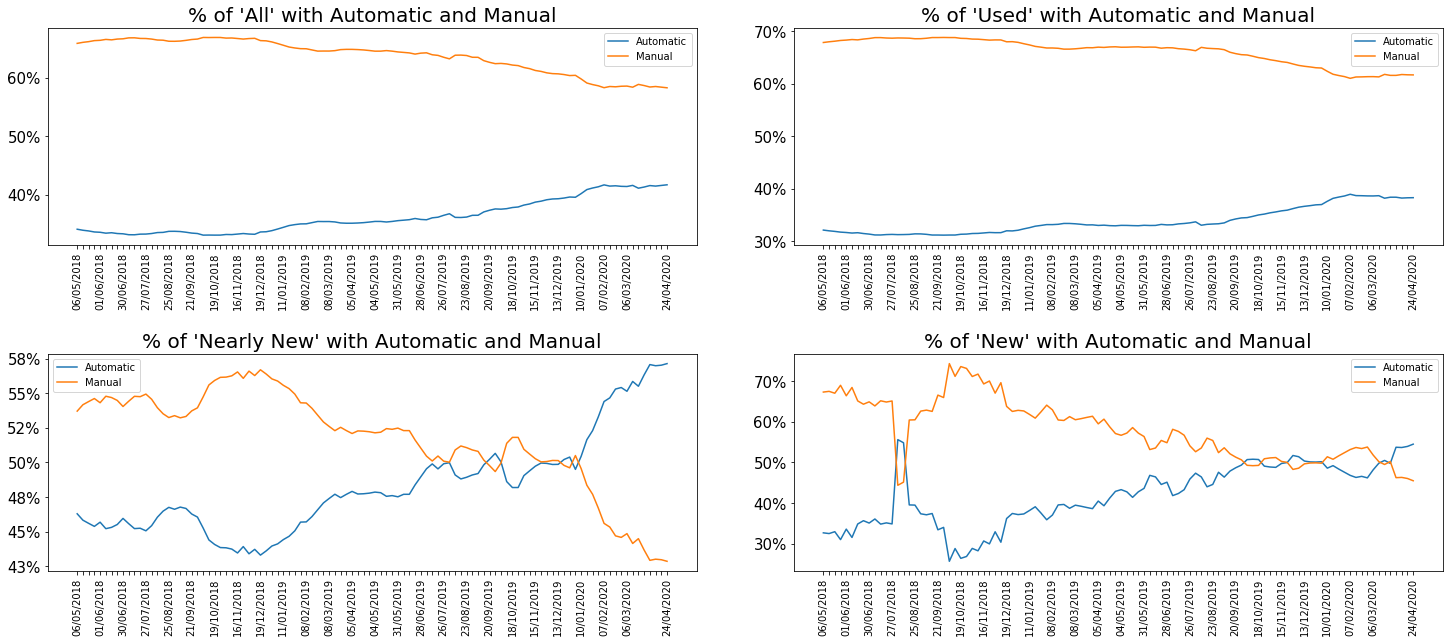

In [47]:
# 4 line charts showing % of Automatic vs Manual for all, used, nearly new and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total_automatic','total_manual','used_automatic','used_manual',
           'nearlyNew_automatic','nearlyNew_manual','new_automatic','new_manual']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[2*i]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y.append(df_summary[chart_cols[(2*i)+1]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' with Automatic and Manual"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y[2*i], label='Automatic')
    ax[int(i/2),i%2].plot(x, y[(2*i)+1], label='Manual')
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on transmission by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Transmission type - % by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on transmission by condition.png')

plt.show()

In [48]:
# add columns for credit use

total_credit = []
new_credit = []
nearlyNew_credit = []
used_credit = []
total_credit_pct = []
new_credit_pct = []
nearlyNew_credit_pct = []
used_credit_pct = []

for i in range(len(df)):
    total_credit.append(len(df[i][(df[i]['totalCredit'].notnull())]))
    new_credit.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'New')]))    
    nearlyNew_credit.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'Nearly New')]))    
    used_credit.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'Used')]))        
    total_credit_pct.append(len(df[i][(df[i]['totalCredit'].notnull())]) / df[i]['condition'].count())
    new_credit_pct.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'New')]) / df[i][(df[i]['condition'] == 'New')]['condition'].count())    
    nearlyNew_credit_pct.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'Nearly New')]) / df[i][(df[i]['condition'] == 'Nearly New')]['condition'].count())    
    used_credit_pct.append(len(df[i][(df[i]['totalCredit'].notnull()) & (df[i]['condition'] == 'Used')]) / df[i][(df[i]['condition'] == 'Used')]['condition'].count())    

df_summary['total credit'] = total_credit
df_summary['new credit'] = new_credit
df_summary['nearly new credit'] = nearlyNew_credit
df_summary['used credit'] = used_credit    
df_summary['total credit %'] = total_credit_pct
df_summary['new credit %'] = new_credit_pct
df_summary['nearly new credit %'] = nearlyNew_credit_pct
df_summary['used credit %'] = used_credit_pct

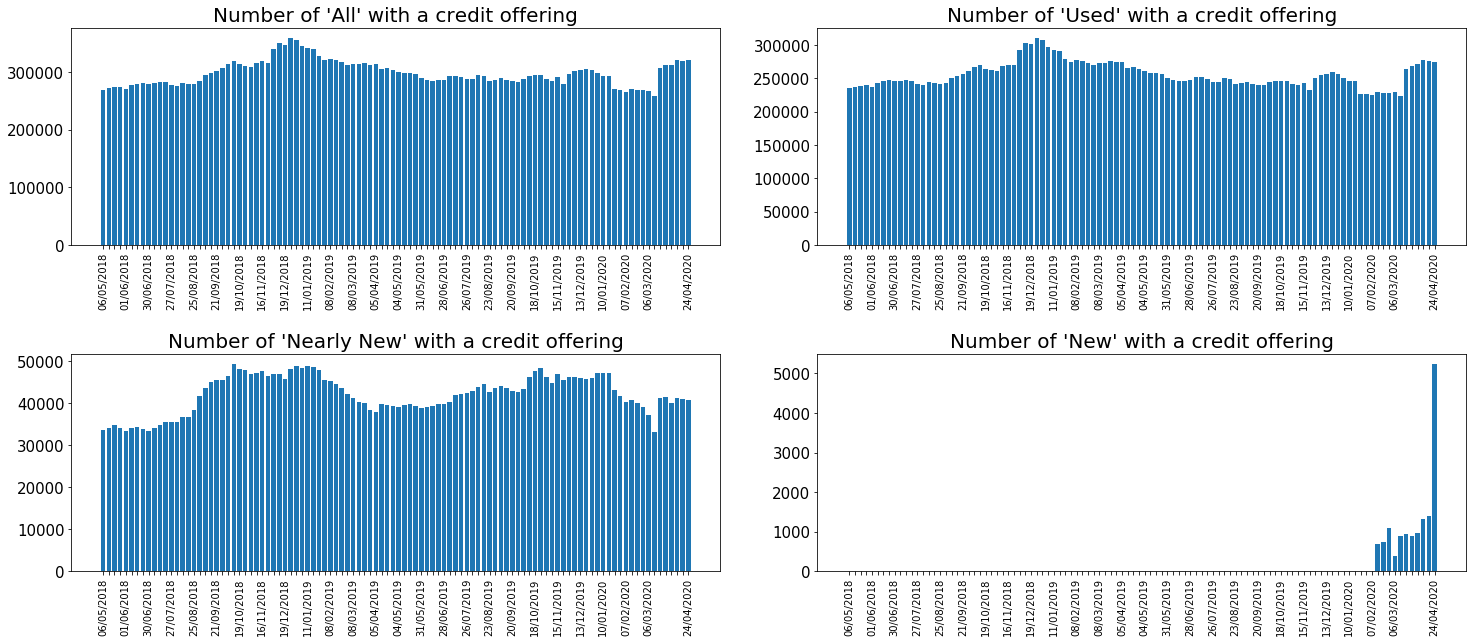

In [49]:
# 4 bar charts showing number of cars with a credit offering for all, used, nearly new and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total credit','used credit','nearly new credit','new credit']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Number of '") + chart_titles[i] + str("' with a credit offering"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].bar(x, y[i])
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on credit volume by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Credit offering - Number of cars by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on credit volume by condition.png')

plt.show()

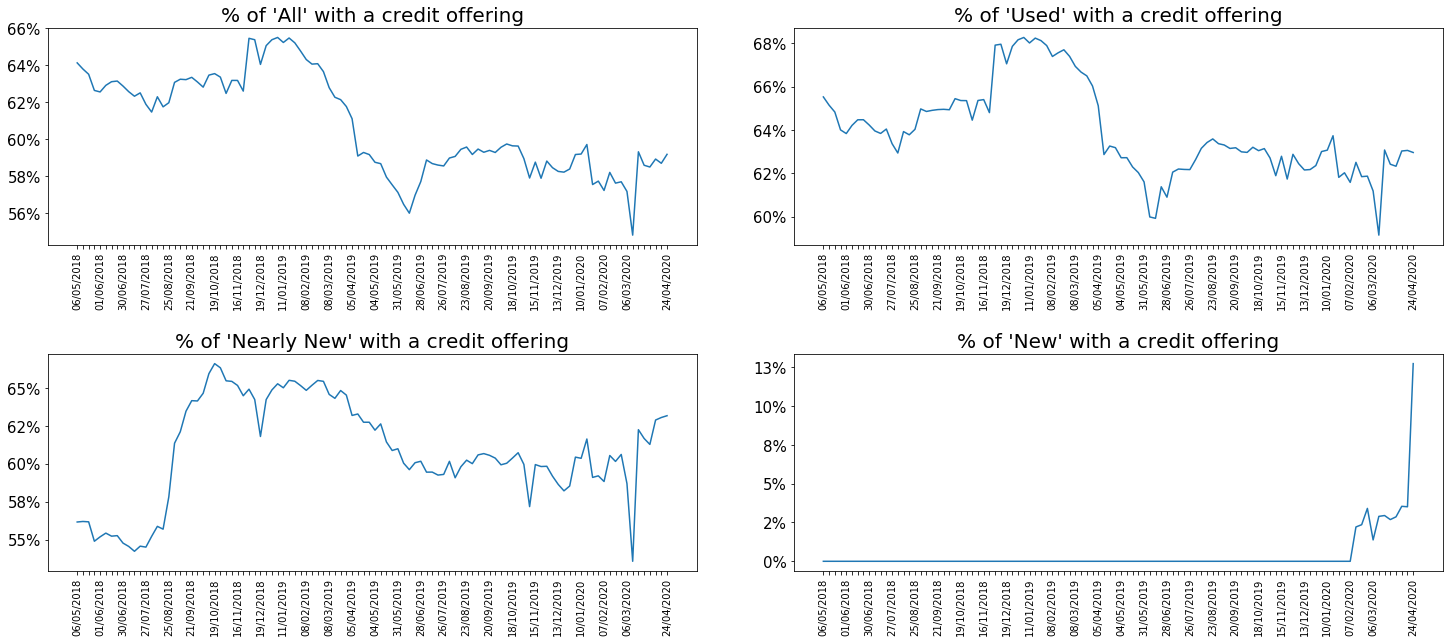

In [50]:
# 4 line charts showing % of cars with a credit offering for all, used, nearly new and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total credit %','used credit %','nearly new credit %','new credit %']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' with a credit offering"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y[i])
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on credit by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Credit offering - % by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on credit by condition.png')

plt.show()

In [51]:
df[-1].quoteType.unique()

[NaN, HP, PCP]
Categories (2, object): [HP, PCP]

In [52]:
# add columns showing credit by type: HP or PCP

hp_pct = []
pcp_pct = []
new_hp_pct = []
new_pcp_pct = []
nearlyNew_hp_pct = []
nearlyNew_pcp_pct = []
used_hp_pct = []
used_pcp_pct = []

for i in range(len(df)):
    hp_pct.append(df[i][(df[i]['quoteType'] == 'HP')]['condition'].count() / df[i]['condition'].count())
    pcp_pct.append(df[i][(df[i]['quoteType'] == 'PCP')]['condition'].count() / df[i]['condition'].count())
    new_hp_pct.append(df[i][(df[i]['quoteType'] == 'HP') & (df[i]['condition'] == 'New')]['condition'].count() / df[i][(df[i]['condition'] == 'New')]['condition'].count())
    new_pcp_pct.append(df[i][(df[i]['quoteType'] == 'PCP') & (df[i]['condition'] == 'New')]['condition'].count() / df[i][(df[i]['condition'] == 'New')]['condition'].count())
    nearlyNew_hp_pct.append(df[i][(df[i]['quoteType'] == 'HP') & (df[i]['condition'] == 'Nearly New')]['condition'].count() / df[i][(df[i]['condition'] == 'Nearly New')]['condition'].count())
    nearlyNew_pcp_pct.append(df[i][(df[i]['quoteType'] == 'PCP') & (df[i]['condition'] == 'Nearly New')]['condition'].count() / df[i][(df[i]['condition'] == 'Nearly New')]['condition'].count())
    used_hp_pct.append(df[i][(df[i]['quoteType'] == 'HP') & (df[i]['condition'] == 'Used')]['condition'].count() / df[i][(df[i]['condition'] == 'Used')]['condition'].count())
    used_pcp_pct.append(df[i][(df[i]['quoteType'] == 'PCP') & (df[i]['condition'] == 'Used')]['condition'].count() / df[i][(df[i]['condition'] == 'Used')]['condition'].count())

df_summary['total HP %'] = hp_pct
df_summary['total PCP %'] = pcp_pct
df_summary['new HP %'] = new_hp_pct
df_summary['new PCP %'] = new_pcp_pct
df_summary['nearly new HP %'] = nearlyNew_hp_pct
df_summary['nearly new PCP %'] = nearlyNew_pcp_pct
df_summary['used HP %'] = used_hp_pct
df_summary['used PCP %'] = used_pcp_pct

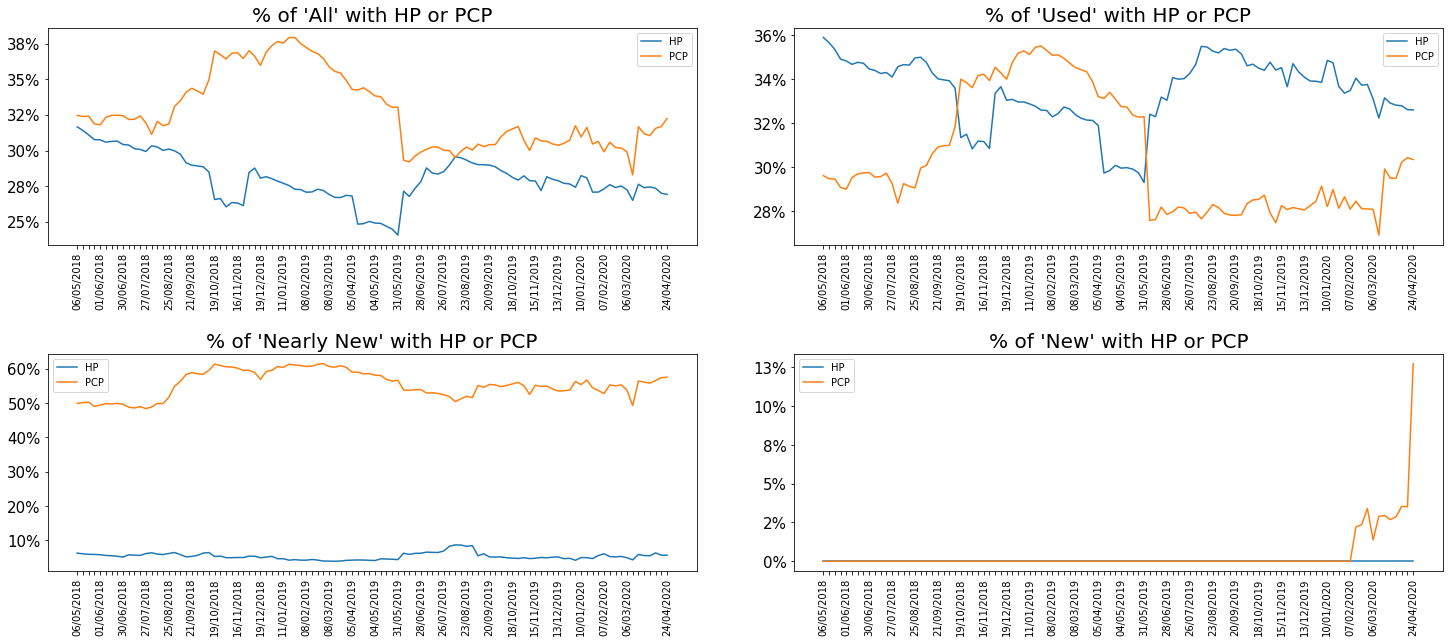

In [53]:
# 4 line charts showing % of HP and PCP vs all cars for all, used, nearly new and new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total HP %','total PCP %','used HP %','used PCP %',
           'nearly new HP %','nearly new PCP %','new HP %','new PCP %']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[2*i]])
    y.append(df_summary[chart_cols[(2*i)+1]])
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' with HP or PCP"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y[2*i], label='HP')
    ax[int(i/2),i%2].plot(x, y[(2*i)+1], label='PCP')
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on HP or PCP by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Credit type - % by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on HP or PCP by condition.png')

plt.show()

In [54]:
# add columns for dealer size and number of cars per size of dealer

cars_0_25 = []
cars_26_50 = []
cars_51_75 = []
cars_76_100 = []
cars_101_200 = []
cars_201_1000 = []
cars_0_25_count = []
cars_26_50_count = []
cars_51_75_count = []
cars_76_100_count = []
cars_101_200_count = []
cars_201_1000_count = []

for i in range(len(df)):
    cars_0_25.append(df[i][(df[i]['cars'] > 0) & (df[i]['cars'] < 26)]['name'].nunique())
    cars_26_50.append(df[i][(df[i]['cars'] > 25) & (df[i]['cars'] < 51)]['name'].nunique())
    cars_51_75.append(df[i][(df[i]['cars'] > 50) & (df[i]['cars'] < 76)]['name'].nunique())
    cars_76_100.append(df[i][(df[i]['cars'] > 75) & (df[i]['cars'] < 101)]['name'].nunique())
    cars_101_200.append(df[i][(df[i]['cars'] > 100) & (df[i]['cars'] < 201)]['name'].nunique())
    cars_201_1000.append(df[i][(df[i]['cars'] > 200) & (df[i]['cars'] < 100000)]['name'].nunique())
    cars_0_25_count.append(df[i][(df[i]['cars'] > 0) & (df[i]['cars'] < 26)]['name'].count())
    cars_26_50_count.append(df[i][(df[i]['cars'] > 25) & (df[i]['cars'] < 51)]['name'].count())
    cars_51_75_count.append(df[i][(df[i]['cars'] > 50) & (df[i]['cars'] < 76)]['name'].count())
    cars_76_100_count.append(df[i][(df[i]['cars'] > 75) & (df[i]['cars'] < 101)]['name'].count())
    cars_101_200_count.append(df[i][(df[i]['cars'] > 100) & (df[i]['cars'] < 201)]['name'].count())
    cars_201_1000_count.append(df[i][(df[i]['cars'] > 200) & (df[i]['cars'] < 100000)]['name'].count())
    
df_summary['cars_0_25'] = cars_0_25
df_summary['cars_26_50'] = cars_26_50
df_summary['cars_51_75'] = cars_51_75
df_summary['cars_76_100'] = cars_76_100    
df_summary['cars_101_200'] = cars_101_200
df_summary['cars_201_1000'] = cars_201_1000
df_summary['cars_0_25_count'] = cars_0_25_count
df_summary['cars_26_50_count'] = cars_26_50_count
df_summary['cars_51_75_count'] = cars_51_75_count
df_summary['cars_76_100_count'] = cars_76_100_count   
df_summary['cars_101_200_count'] = cars_101_200_count
df_summary['cars_201_1000_count'] = cars_201_1000_count

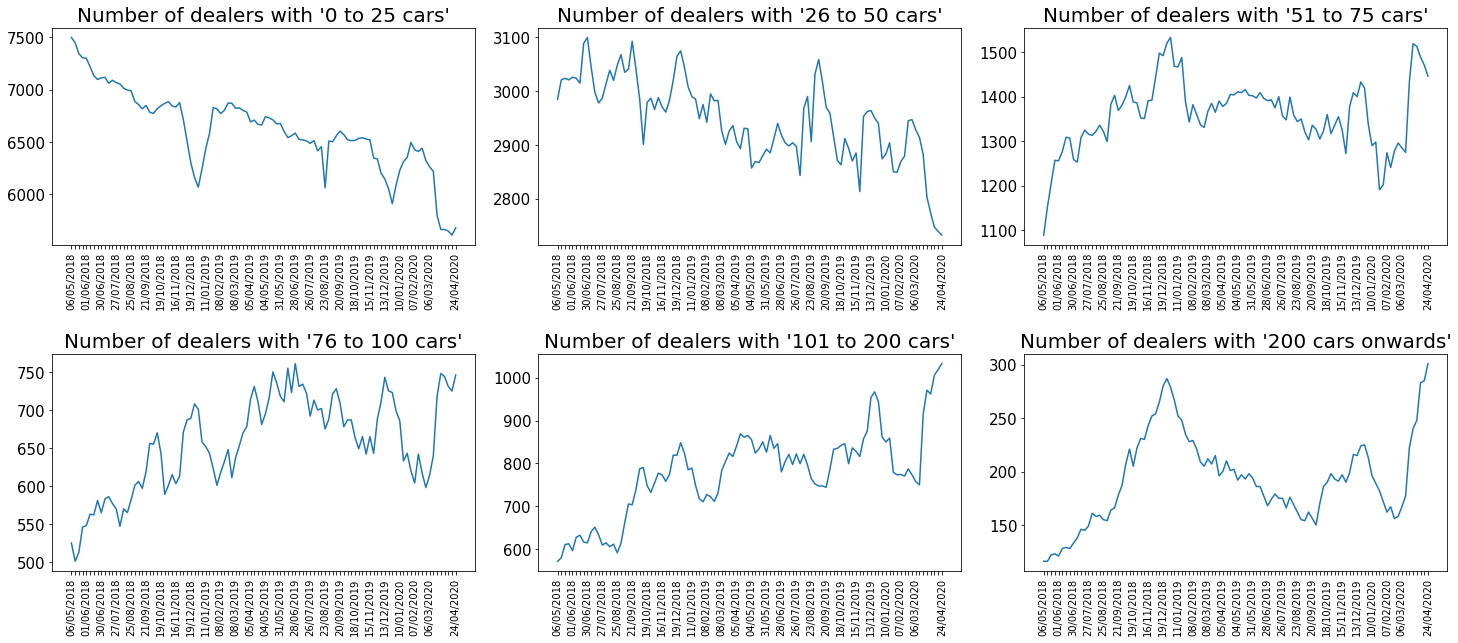

In [55]:
# 6 line charts showing number of dealers by size

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['cars_0_25','cars_26_50','cars_51_75','cars_76_100','cars_101_200','cars_201_1000']
chart_titles=['0 to 25 cars','26 to 50 cars','51 to 75 cars','76 to 100 cars','101 to 200 cars', '200 cars onwards']

for i in range(6):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/3),i%3].set_title(str("Number of dealers with '") + chart_titles[i] + str("'"), fontsize=20)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=15)
    ax[int(i/3),i%3].plot(x, y[i])
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 6 charts on dealer size.png', bbox_inches = 'tight')
    
    slideTitle.append('Charts showing number of dealers by size')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 6 charts on dealer size.png')

plt.show()

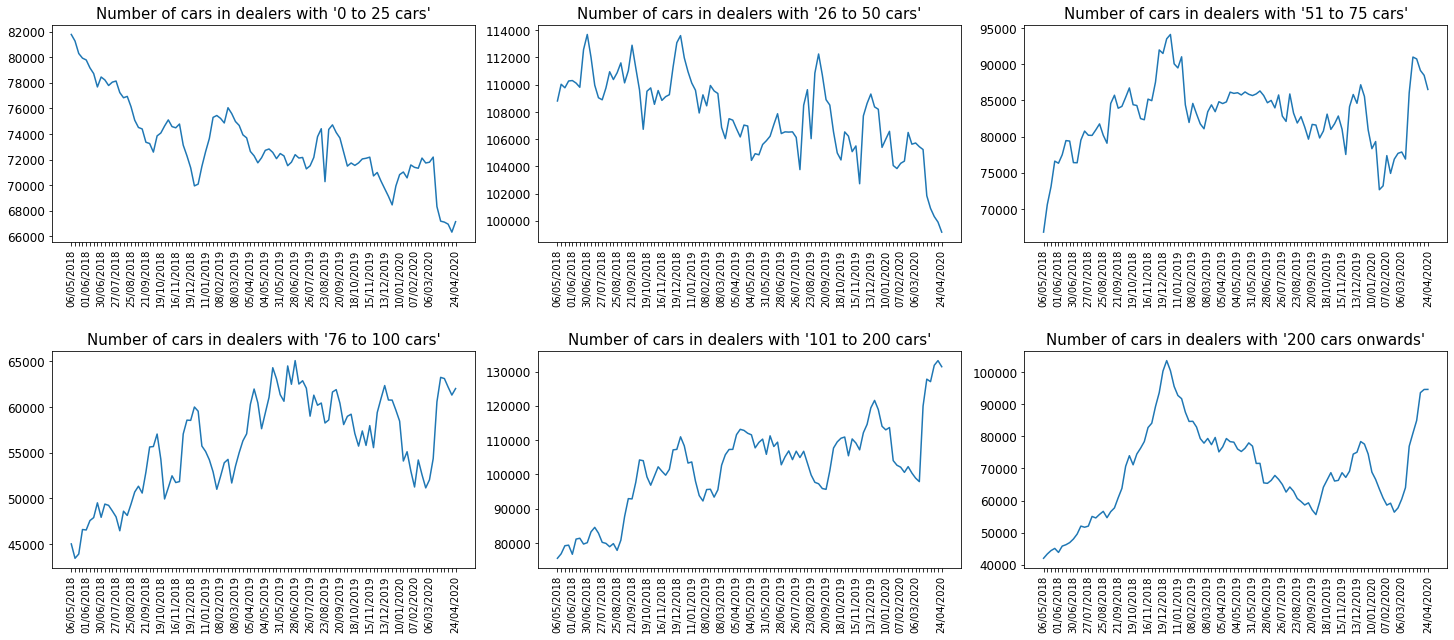

In [56]:
# 6 line charts showing number of cars per dealers by size

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['cars_0_25_count','cars_26_50_count','cars_51_75_count',
            'cars_76_100_count','cars_101_200_count','cars_201_1000_count']
chart_titles=['0 to 25 cars','26 to 50 cars','51 to 75 cars','76 to 100 cars','101 to 200 cars', '200 cars onwards']

for i in range(6):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/3),i%3].set_title(str("Number of cars in dealers with '") + chart_titles[i] + str("'"), fontsize=15)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=12)
    ax[int(i/3),i%3].plot(x, y[i])
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 6 charts on cars by dealer size.png', bbox_inches = 'tight')
    
    slideTitle.append('Charts showing number of cars by dealer by size bucket')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 6 charts on cars by dealer size.png')

plt.show()

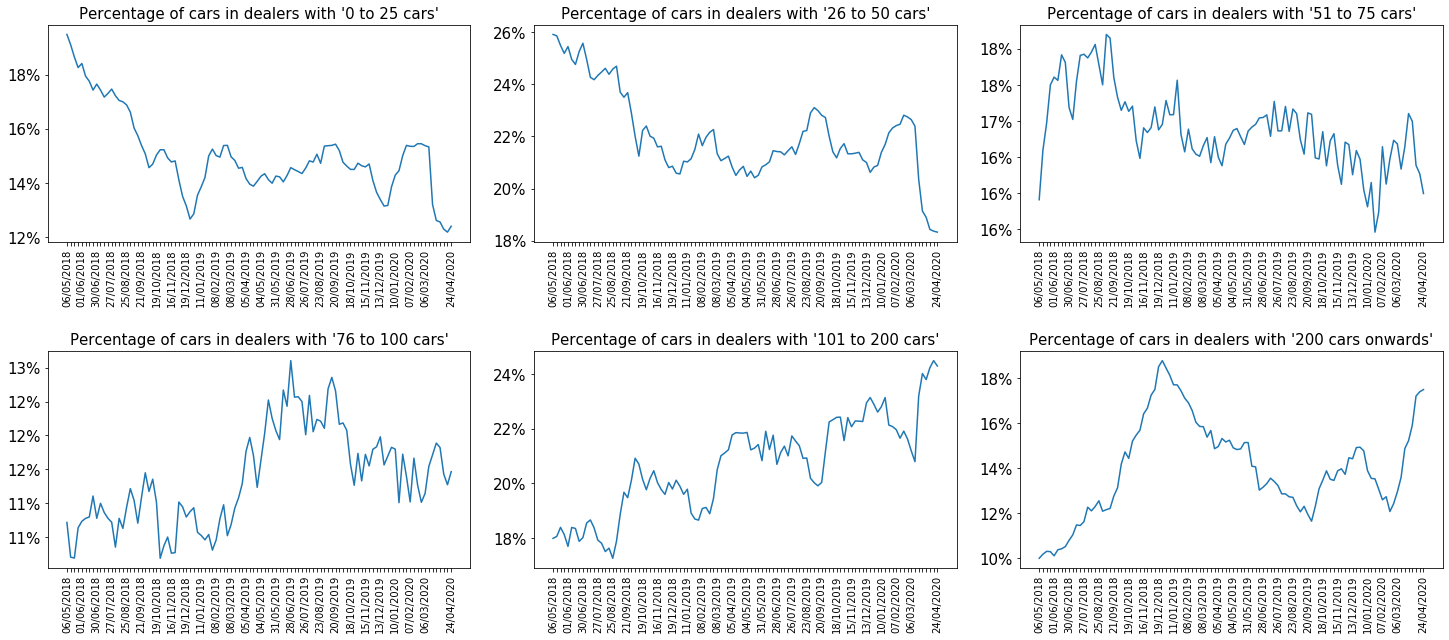

In [57]:
# 6 line charts showing number of cars per dealers by size in %

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['cars_0_25_count','cars_26_50_count','cars_51_75_count',
            'cars_76_100_count','cars_101_200_count','cars_201_1000_count']
chart_titles=['0 to 25 cars','26 to 50 cars','51 to 75 cars','76 to 100 cars','101 to 200 cars', '200 cars onwards']

for i in range(6):
    y.append(df_summary[chart_cols[i]]/df_summary['Total Cars'])
    ax[int(i/3),i%3].set_title(str("Percentage of cars in dealers with '") + chart_titles[i] + str("'"), fontsize=15)
    ax[int(i/3),i%3].set_xticklabels(labels, rotation = 90)
    ax[int(i/3),i%3].yaxis.set_tick_params(labelsize=15)
    ax[int(i/3),i%3].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/3),i%3].plot(x, y[i])
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 6 charts on cars by dealer size pct.png', bbox_inches = 'tight')
    
    slideTitle.append('Charts showing number of cars by dealer by size bucket as a % of all cars')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 6 charts on cars by dealer size pct.png')

plt.show()

In [58]:
df_summary.tail()

Date  Total Cars    New  Nearly New    Used  forecourts_total  \
99   27/03/2020      532080  33382       67212  431486             11883   
100  03/04/2020      533901  33364       65100  435437             11843   
101  10/04/2020      544059  37490       65393  441176             11848   
102  17/04/2020      543846  39932       64987  438927             11792   
103  24/04/2020      540927  41102       64349  435476             11877   

     forecourts_used  forecourts_nearlyNew  forecourts_new   total_value  \
99             11726                  4670            1388  8.694592e+09   
100            11690                  4633            1396  8.774553e+09   
101            11702                  4636            1401  8.999904e+09   
102            11646                  4634            1440  9.077600e+09   
103            11649                  4609            1515  9.071932e+09   

       total_used  total_nearlyNew     total_new  avePrice_total  \
99   5.751410e+09     1.891704e+09  1.051478e+09    16340.761252   
100  5.827204e+09     1.850713e+09  1.096636e+09    16434.793213   
101  5.910089e+09     1.856929e+09  1.232886e+09    16542.146447   
102  5.902011e+09     1.846200e+09  1.329389e+09    16691.489602   
103  5.868746e+09     1.830459e+09  1.372726e+09    16771.083383   

     avePrice_used  avePrice_nearlyNew  avePrice_new  total_hasVideo  \
99    13329.307862        28145.334702  31498.360763          124167   
100   13382.426248        28428.766390  32868.849688          124227   
101   13396.215005        28396.453657  32885.724433          129095   
102   13446.451834        28408.765091  33291.312055          130111   
103   13476.623118        28445.809849  33398.045691          129804   

     totalImages  used_hasVideo  usedImages  nearlyNew_hasVideo  \
99      12698748          99505    10829476               22589   
100     12696794         100732    10884134               21349   
101     12797674         105054    10967837               21413   
102     12744105         105199    10911858               21246   
103     12684969         104783    10854040               20794   

     nearlyNewImages  new_hasVideo  newImages  total_fuelPetrol  \
99           1564478          2073     304794            282851   
100          1505179          2146     307481            283833   
101          1500677          2628     329160            289486   
102          1490501          3666     341746            289473   
103          1477780          4227     353149            288195   

     total_fuelDiesel  total_fuelElectric  used_fuelPetrol  used_fuelDiesel  \
99             225685                  25           221684           193641   
100            226278                  28           224362           194629   
101            230143                  28           227886           196648   
102            229374                  29           226930           195330   
103            228046                  26           225152           193654   

     used_fuelElectric  nearlyNew_fuelPetrol  nearlyNew_fuelDiesel  \
99                  15                 39423                 23239   
100                 16                 38080                 22527   
101                 17                 38160                 22721   
102                 17                 37918                 22594   
103                 17                 37494                 22415   

     nearlyNew_fuelElectric  new_fuelPetrol  new_fuelDiesel  new_fuelElectric  \
99                       10           21744            8805                 0   
100                      11           21391            9122                 1   
101                      10           23440           10774                 1   
102                       9           24625           11450                 3   
103                       9           25549           11977                 0   

     total_automatic  total_manual  used_automatic  used_manual  \

In [59]:
# add columns for the number of vehicles leaving the site each week

In [60]:
leave = [0]
leave_value = [0]
leave_pct = [0]
leave_new = [0]
leave_new_value = [0]
leave_new_pct = [0]
leave_nearlynew = [0]
leave_nearlynew_value = [0]
leave_nearlynew_pct = [0]
leave_used = [0]
leave_used_value = [0]
leave_used_pct = [0]

for i in range(1,len(df)):
    leave.append(len(df[i-1][~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)]))
    leave_value.append(df[i-1][~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)]['price'].sum())
    leave_pct.append(len(df[i-1][~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)]) / df[i-1]['condition'].count())
    leave_new.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['New'])
    leave_new_value.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['condition'] == 'New')]['price'].sum())
    leave_new_pct.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['New'] / df[i-1]['condition'].value_counts()['New'])
    leave_nearlynew.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Nearly New'])
    leave_nearlynew_value.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['condition'] == 'Nearly New')]['price'].sum())
    leave_nearlynew_pct.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Nearly New'] / df[i-1]['condition'].value_counts()['Nearly New'])
    leave_used.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Used'])
    leave_used_value.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['condition'] == 'Used')]['price'].sum())
    leave_used_pct.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values))]['condition'].value_counts()['Used'] / df[i-1]['condition'].value_counts()['Used'])

df_summary['total gone'] = leave
df_summary['total value gone'] = leave_value
df_summary['% total gone'] = leave_pct
df_summary['new gone'] = leave_new
df_summary['new value gone'] = leave_new_value
df_summary['% new gone'] = leave_new_pct
df_summary['nearly new gone'] = leave_nearlynew
df_summary['nearly new value gone'] = leave_nearlynew_value
df_summary['% nearly newgone'] = leave_nearlynew_pct
df_summary['used gone'] = leave_used
df_summary['used value gone'] = leave_used_value
df_summary['% used gone'] = leave_used_pct

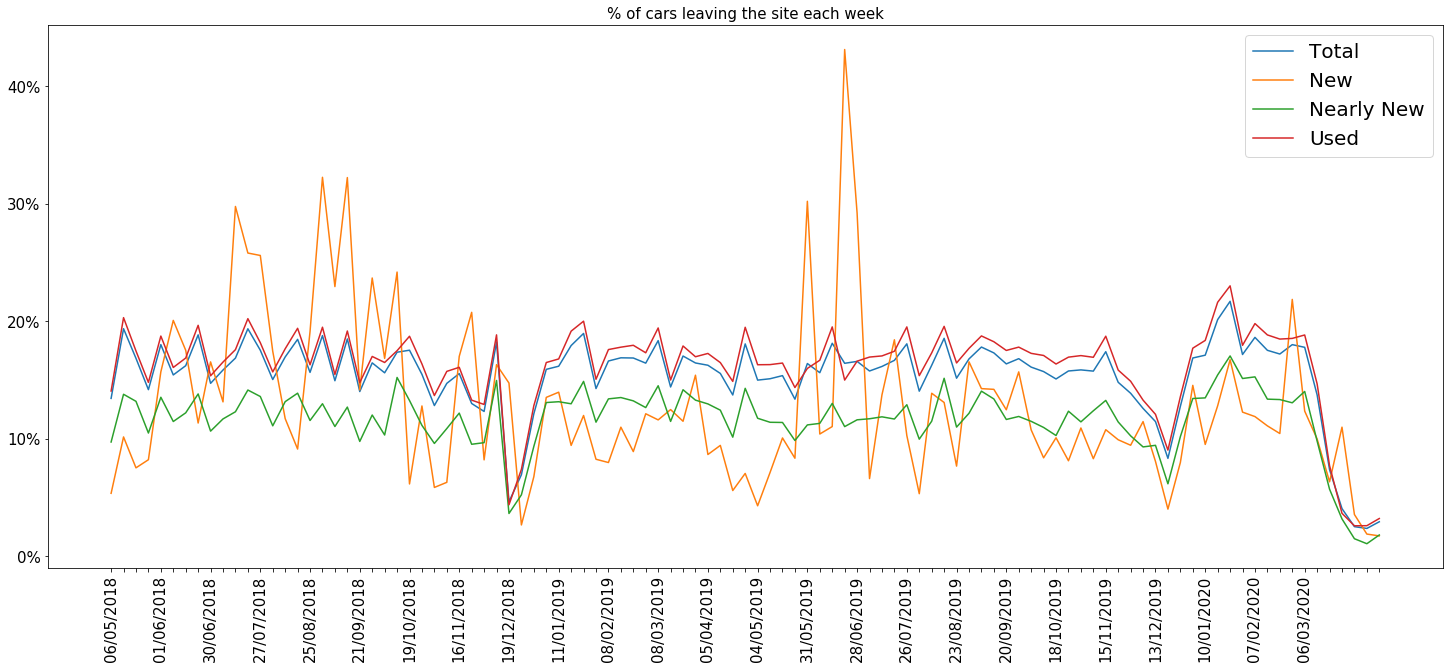

In [61]:
# plot 1 chart showing % of cars leaving (being sold) each week

fig, ax = plt.subplots(figsize=(25,10))

plt.subplots_adjust(hspace=0.6, wspace=0.2)

x = df_summary.index.values[1:]

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels[1:]),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[1:][-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['% total gone'][1:]
y2 = df_summary['% new gone'][1:]
y3 = df_summary['% nearly newgone'][1:]
y4 = df_summary['% used gone'][1:]

ax.set_title('% of cars leaving the site each week', fontsize=15)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
ax.yaxis.set_tick_params(labelsize=15)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
ax.legend(('Total', 'New', 'Nearly New', 'Used'),fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - % of cars leaving weekly by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('% of cars leaving the site each week')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - % of cars leaving weekly by condition.png')   
    
plt.show()


In [62]:
# average lfl pricing changes of cars remaining on the site

In [63]:
price_change_total = [0]
price_change_new = [0]
price_change_nearlyNew = [0]
price_change_used = [0]

for i in range(1,len(df)):
    t1 = df[i].set_index(['veh_id'])['price']
    t2 = df[i-1].set_index(['veh_id'])['price']
    total_sum1 = (t1[t1.index.isin(t2.index)].sum())
    total_sum2 = (t2[t2.index.isin(t1.index)].sum())

    n1 = df[i][df[i]['condition']=='New'].set_index(['veh_id','condition'])['price']
    n2 = df[i-1][df[i-1]['condition']=='New'].set_index(['veh_id','condition'])['price']
    new_sum1 = (n1[n1.index.isin(n2.index)].sum())
    new_sum2 = (n2[n2.index.isin(n1.index)].sum())

    nn1 = df[i][df[i]['condition']=='Nearly New'].set_index(['veh_id','condition'])['price']
    nn2 = df[i-1][df[i-1]['condition']=='Nearly New'].set_index(['veh_id','condition'])['price']
    nearlyNew_sum1 = (nn1[nn1.index.isin(nn2.index)].sum())
    nearlyNew_sum2 = (nn2[nn2.index.isin(nn1.index)].sum())

    u1 = df[i][df[i]['condition']=='Used'].set_index(['veh_id','condition'])['price']
    u2 = df[i-1][df[i-1]['condition']=='Used'].set_index(['veh_id','condition'])['price']
    used_sum1 = (u1[u1.index.isin(u2.index)].sum())
    used_sum2 = (u2[u2.index.isin(u1.index)].sum())
    
    price_change_total.append((total_sum1 - total_sum2)/total_sum2)
    price_change_new.append((new_sum1 - new_sum2)/new_sum2)
    price_change_nearlyNew.append((nearlyNew_sum1 - nearlyNew_sum2)/nearlyNew_sum2)   
    price_change_used.append((used_sum1 - used_sum2)/used_sum2)
    
df_summary['price change total'] = price_change_total
df_summary['price change new'] = price_change_new
df_summary['price change nearly new'] = price_change_nearlyNew
df_summary['price change used'] = price_change_used


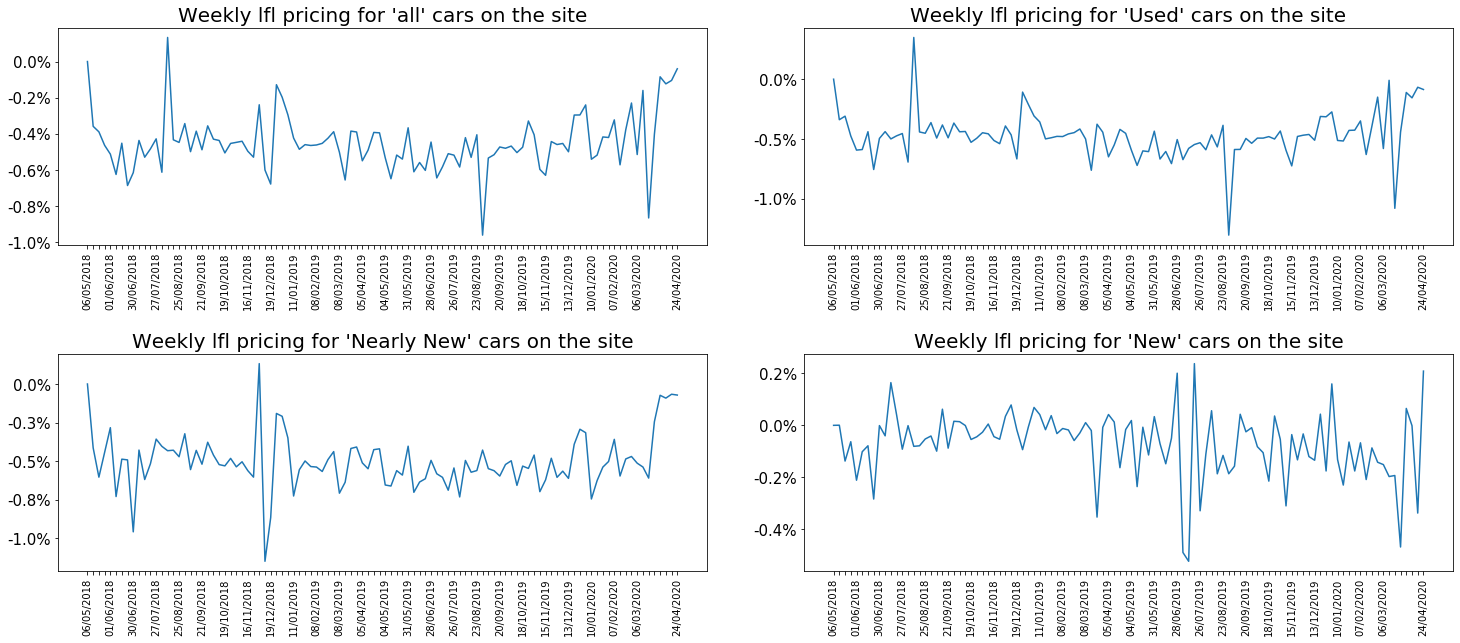

In [64]:
# 4 line charts showing % weekly lfl pricing for all cars, used cars, nearly new cars, new cars

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['price change total','price change used','price change nearly new','price change new']
chart_titles=['all', 'Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Weekly lfl pricing for '") + chart_titles[i] + str("' cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
    ax[int(i/2),i%2].plot(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on % lfl pricing by condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Weekly lfl price change for cars remaining on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on % lfl pricing by condition.png')

plt.show()

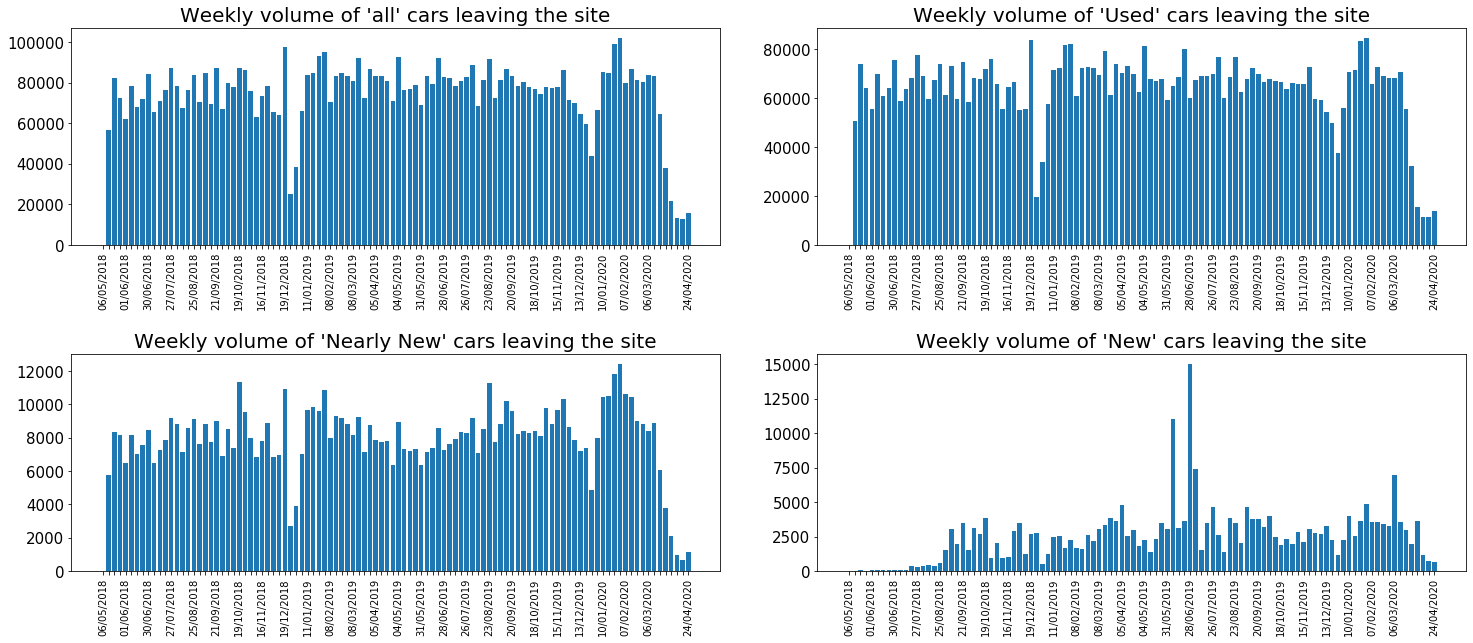

In [65]:
# 4 bar charts showing volume of all cars, used cars, nearly new cars, new cars leaving the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total gone','used gone','nearly new gone','new gone']
chart_titles=['all', 'Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Weekly volume of '") + chart_titles[i] + str("' cars leaving the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts volume leaving.png', bbox_inches = 'tight')
    
    slideTitle.append('Weekly volume of cars leaving the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts volume leaving.png')

plt.show()

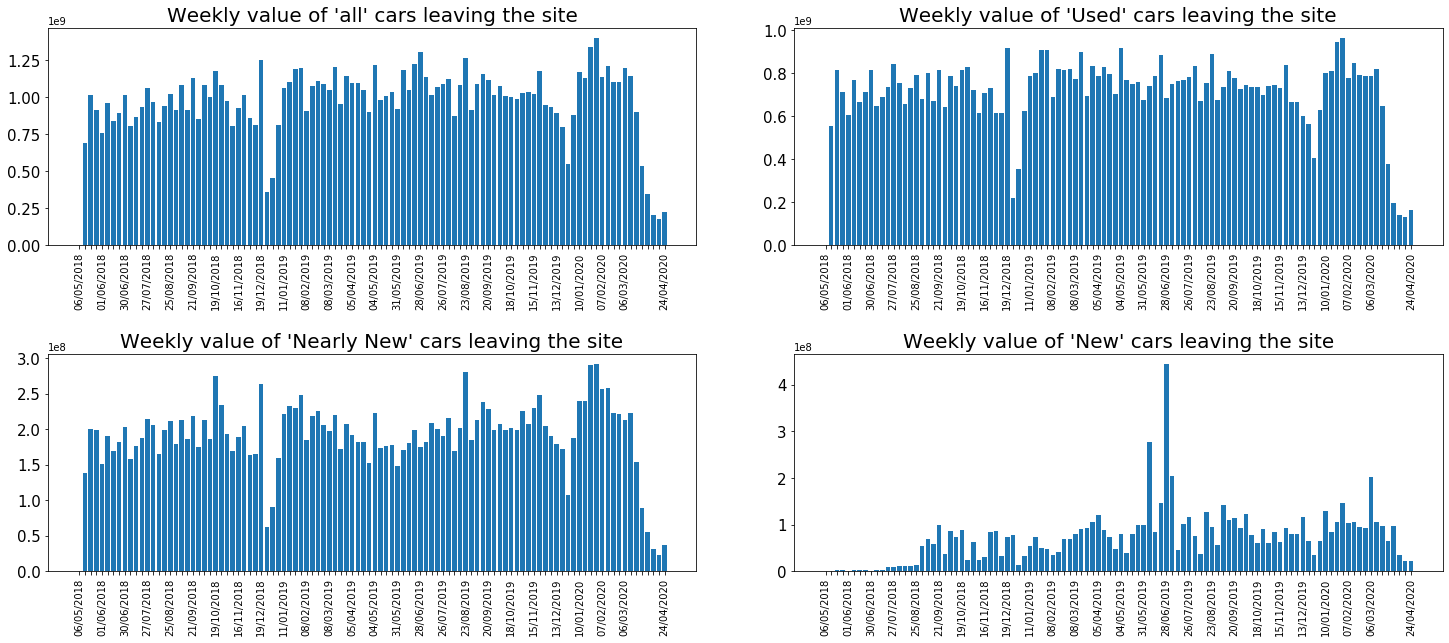

In [66]:
# 4 bar charts showing value of all cars, used cars, nearly new cars, new cars laeving the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['total value gone','used value gone','nearly new value gone','new value gone']
chart_titles=['all', 'Used','Nearly New','New']

for i in range(4):
    y.append(df_summary[chart_cols[i]])
    ax[int(i/2),i%2].set_title(str("Weekly value of '") + chart_titles[i] + str("' cars leaving the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts value leaving.png', bbox_inches = 'tight')
    
    slideTitle.append('Weekly value of cars leaving the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts value leaving.png')

plt.show()

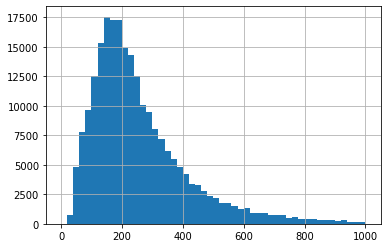

In [67]:
i=0
df[i][df[i]['condition']=='Used']['monthlyPayment'].hist(bins=50,range=(0, 1000))

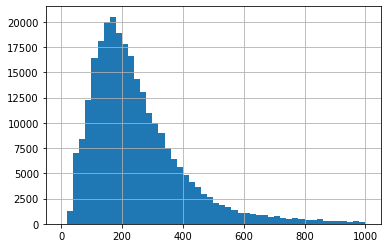

In [68]:
i=-1
df[i][df[i]['condition']=='Used']['monthlyPayment'].hist(bins=50,range=(0, 1000))

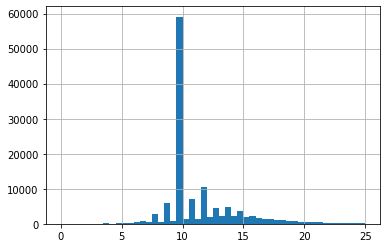

In [69]:
i=0
df[i][(df[i]['condition']=='Used') & (df[i]['quoteType']=='HP')]['representativeApr'].hist(bins=50,range=(0, 25))

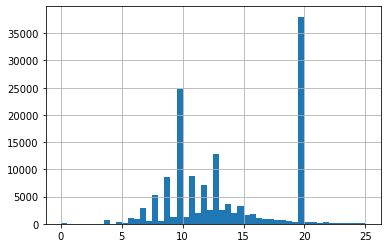

In [70]:
i=-1
df[i][(df[i]['condition']=='Used') & (df[i]['quoteType']=='HP')]['representativeApr'].hist(bins=50,range=(0, 25))

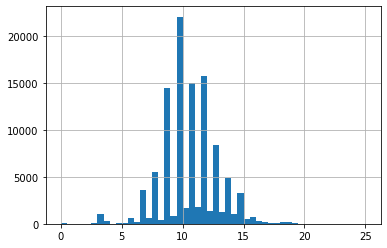

In [71]:
i=0
df[i][(df[i]['condition']=='Used') & (df[i]['quoteType']=='PCP')]['representativeApr'].hist(bins=50,range=(0, 25))

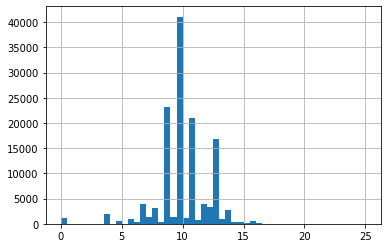

In [72]:
i=-1
df[i][(df[i]['condition']=='Used') & (df[i]['quoteType']=='PCP')]['representativeApr'].hist(bins=50,range=(0, 25))

In [73]:
df_summary.head()

Date  Total Cars  New  Nearly New    Used  forecourts_total  \
0  06/05/2018      419905  505       59610  359790             12703   
1  11/05/2018      425506  542       60671  364293             12736   
2  19/05/2018      430633  572       61771  368290             12736   
3  26/05/2018      437824  597       62012  375215             12778   
4  01/06/2018      433471  580       60343  372548             12768   

   forecourts_used  forecourts_nearlyNew  forecourts_new   total_value  \
0            12624                  4683             155  5.982719e+09   
1            12653                  4709             158  6.042379e+09   
2            12659                  4746             161  6.111748e+09   
3            12713                  4747             164  6.182262e+09   
4            12707                  4717             171  6.095134e+09   

     total_used  total_nearlyNew   total_new  avePrice_total  avePrice_used  \
0  4.446430e+09     1.519127e+09  17162221.0    14248.403006   12359.021436   
1  4.485590e+09     1.539106e+09  17683004.0    14200.856769   12313.510934   
2  4.530266e+09     1.562621e+09  18861170.0    14192.869955   12301.179508   
3  4.593843e+09     1.569127e+09  19292173.0    14120.718173   12243.488661   
4  4.541042e+09     1.535099e+09  18993289.0    14061.226571   12189.144846   

   avePrice_nearlyNew  avePrice_new  total_hasVideo  totalImages  \
0        25484.434021  33984.596040           66068      7841570   
1        25368.484523  32625.468635           67758      8028698   
2        25297.403189  32974.073427           70423      8170129   
3        25304.017094  32315.197655           71198      8326265   
4        25439.555872  32747.050000           70863      8222972   

   used_hasVideo  usedImages  nearlyNew_hasVideo  nearlyNewImages  \
0          51237     6829672               14675          1004464   
1          52448     6983967               15144          1036735   
2          54133     7098173               16102          1063421   
3          55269     7245280               15733          1071728   
4          55161     7174949               15525          1039326   

   new_hasVideo  newImages  total_fuelPetrol  total_fuelDiesel  \
0           156       7434            207849            194890   
1           166       7996            211024            197418   
2           188       8535            214062            199097   
3           196       9257            217526            202436   
4           177       8697            214914            200805   

   total_fuelElectric  used_fuelPetrol  used_fuelDiesel  used_fuelElectric  \
0                   8           179105           167864                  5   
1                   7           181398           170171                  5   
2                   7           183812           171516                  6   
3                   8           187134           174762                  7   
4                   6           185332           173906                  5   

   nearlyNew_fuelPetrol  nearlyNew_fuelDiesel  nearlyNew_fuelElectric  \
0                 28599                 26998                       3   
1                 29470                 27216                       2   
2                 30098                 27549                       1   
3                 30240                 27642                       1   
4                 29426                 26860                       1   

   new_fuelPetrol  new_fuelDiesel  new_fuelElectric  total_automatic  \
0             145              28                 0           142390   
1             156              31                 0           143555   
2             152              32                 0           144682   
3             152              32                 0           146309   
4             156              39                 0           144626   

   total_manual  used_automatic  used_manual  nearlyNew_automatic  \
0        274893          

In [74]:
#
# create a new dataframes for year on year charting
#

In [75]:
year = int(df_summary['Date'].iloc[-1][-4:])

In [76]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Pendragon cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Year on Year Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [77]:
# create a function that takes a column of data and creates a dataframe of annual columns

def yoy_dataframes(selected):

    selected_Data = selected

    data = {'Week': range(0,54)}

    df_temp = pd.DataFrame(data, columns=['Week'])

    column_data = []
    column_data=[0]*17
    column_data.extend(list(df_summary[(pd.to_datetime(df_summary['Date'], format='%d/%m/%Y')).dt.year == 2018][selected_Data]))
    while len(column_data) < 54:
        column_data.append(0)
    df_temp[2018] = column_data

    for i in range(2019,year+1):
        column_data = list(df_summary[(pd.to_datetime(df_summary['Date'], format='%d/%m/%Y')).dt.year == i][selected_Data])
        while len(column_data) < 54:
            column_data.append(0)

        df_temp[i] = column_data
    
    return(df_temp)

In [78]:
# create a function that charts the annual columns

def yoy_dataframes_charts(df_yoyChart_data, title, file_path, number_format, pctDec):

    fig, ax = plt.subplots(nrows=year-2018, ncols=1, figsize=(15,15))

    plt.subplots_adjust(hspace=0.4, wspace=0.1)

    x = df_yoyChart_data['Week'].astype(str)

    labels = list(df_yoyChart_data['Week'])

    for i in range(year-2018):
        y1 = df_yoyChart_data[2018+i]
        y2 = df_yoyChart_data[2019+i]
        ax[i].set_title((title,2018+i,2019+i), fontsize=20)
        ax[i].set_xticklabels(labels, rotation = 90, fontsize=10)
        ax[i].yaxis.set_tick_params(labelsize=15)
        ax[i].bar(x, y1, width=0.4, label=2018+i)
        ax[i].bar(x.astype(int) +0.4, y2, width=0.4, label=2019+i)
        if number_format == 'percent': # numbers are default y-axis
            ax[i].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=pctDec))
        ax[i].legend()


    if savePNG == 1 or PwrptPrep == 1:
        plt.savefig(file_path, bbox_inches = 'tight')

        slideTitle.append(title)
        slideText.append('06 May 2018 to '+ str(monthNow))
        imagePath.append(file_path)

    plt.show()

In [79]:
# create the dataframes of annual columns

df_yoyData_totalCars = yoy_dataframes('Total Cars')
df_yoyData_usedCars = yoy_dataframes('Used')
df_yoyData_nearlyNewCars = yoy_dataframes('Nearly New')
df_yoyData_newCars = yoy_dataframes('New')
df_yoyData_totalDealers = yoy_dataframes('forecourts_total')
df_yoyData_usedDealers = yoy_dataframes('forecourts_used')
df_yoyData_nearlyNewDealers = yoy_dataframes('forecourts_nearlyNew')
df_yoyData_newDealers = yoy_dataframes('forecourts_new')
df_yoyData_totalValCars = yoy_dataframes('total_value')
df_yoyData_usedValCars = yoy_dataframes('total_used')
df_yoyData_nearlyNewValCars = yoy_dataframes('total_nearlyNew')
df_yoyData_newValCars = yoy_dataframes('total_new')
df_yoyData_pcttotalGone = yoy_dataframes('% total gone')
df_yoyData_pctusedGone = yoy_dataframes('% used gone')
df_yoyData_pctnearlyNewGone = yoy_dataframes('% nearly newgone')
df_yoyData_pctnewGone = yoy_dataframes('% new gone')
df_yoyData_pcttotalPriceChg = yoy_dataframes('price change total')
df_yoyData_pctusedPriceChg = yoy_dataframes('price change used')
df_yoyData_pctnearlyNewPriceChg = yoy_dataframes('price change nearly new')
df_yoyData_pctnewPriceChg = yoy_dataframes('price change new')
df_yoyData_volGone = yoy_dataframes('total gone')
df_yoyData_volUsedGone = yoy_dataframes('used gone')
df_yoyData_volnearlyNewGone = yoy_dataframes('nearly new gone')
df_yoyData_volNewGone = yoy_dataframes('new gone')
df_yoyData_valGone = yoy_dataframes('total value gone')
df_yoyData_valUsedGone = yoy_dataframes('used value gone')
df_yoyData_valnearlyNewGone = yoy_dataframes('nearly new value gone')
df_yoyData_valNewGone = yoy_dataframes('new value gone')


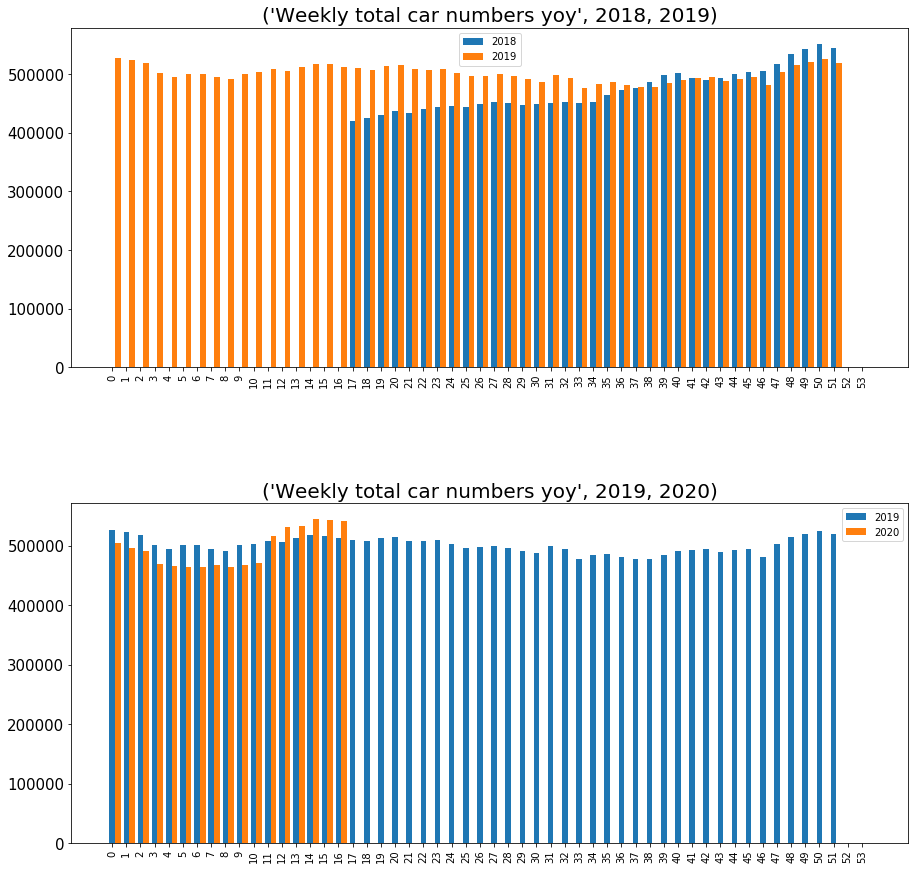

In [80]:
yoy_dataframes_charts(df_yoyData_totalCars, 'Weekly total car numbers yoy', 'Auto Trader - weekly total cars yoy.png','','')

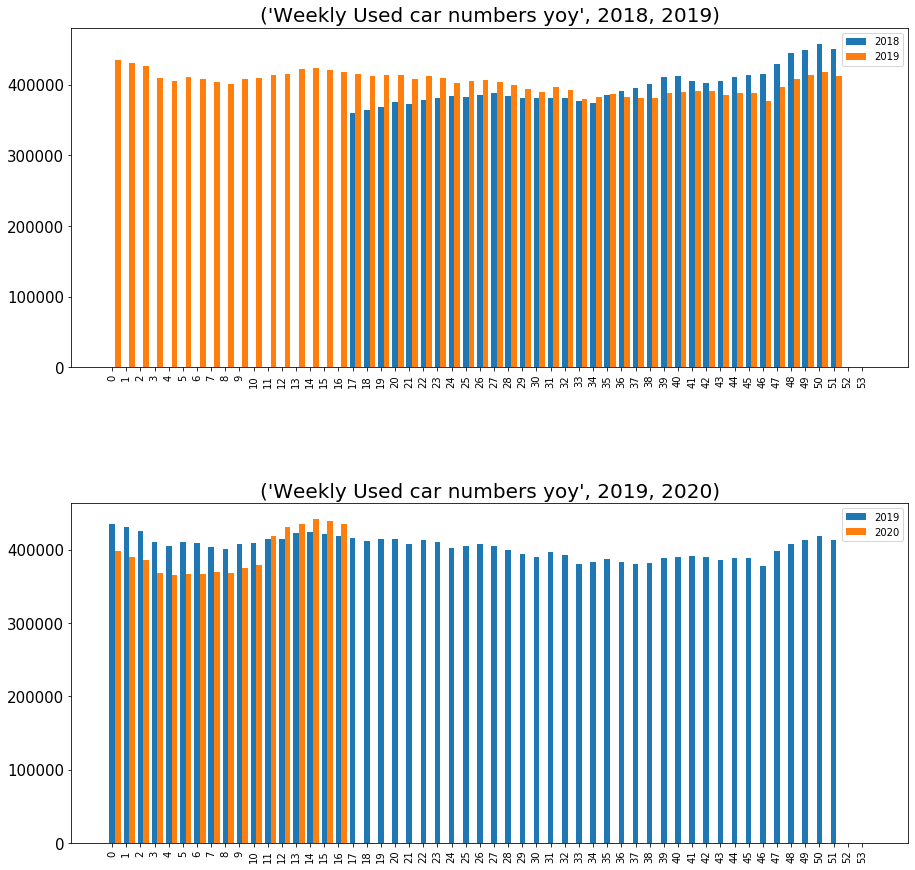

In [81]:
yoy_dataframes_charts(df_yoyData_usedCars, 'Weekly Used car numbers yoy', 'Auto Trader - weekly used cars yoy.png','','')

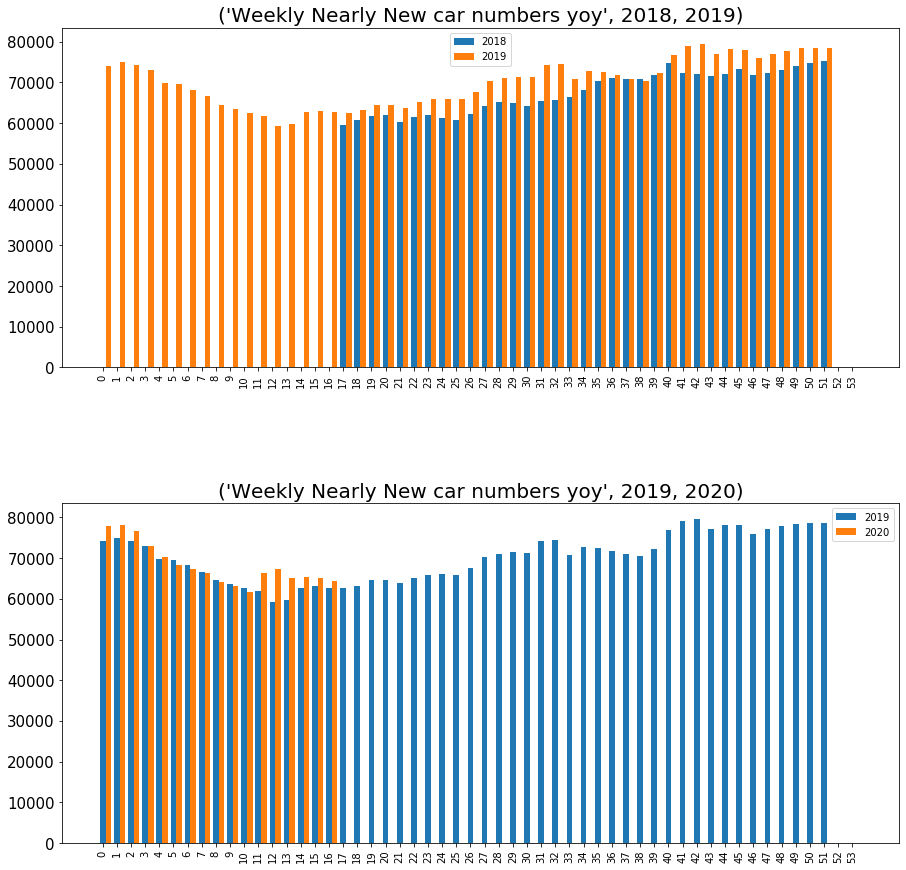

In [82]:
yoy_dataframes_charts(df_yoyData_nearlyNewCars, 'Weekly Nearly New car numbers yoy', 'Auto Trader - weekly nearly new cars yoy.png','','')

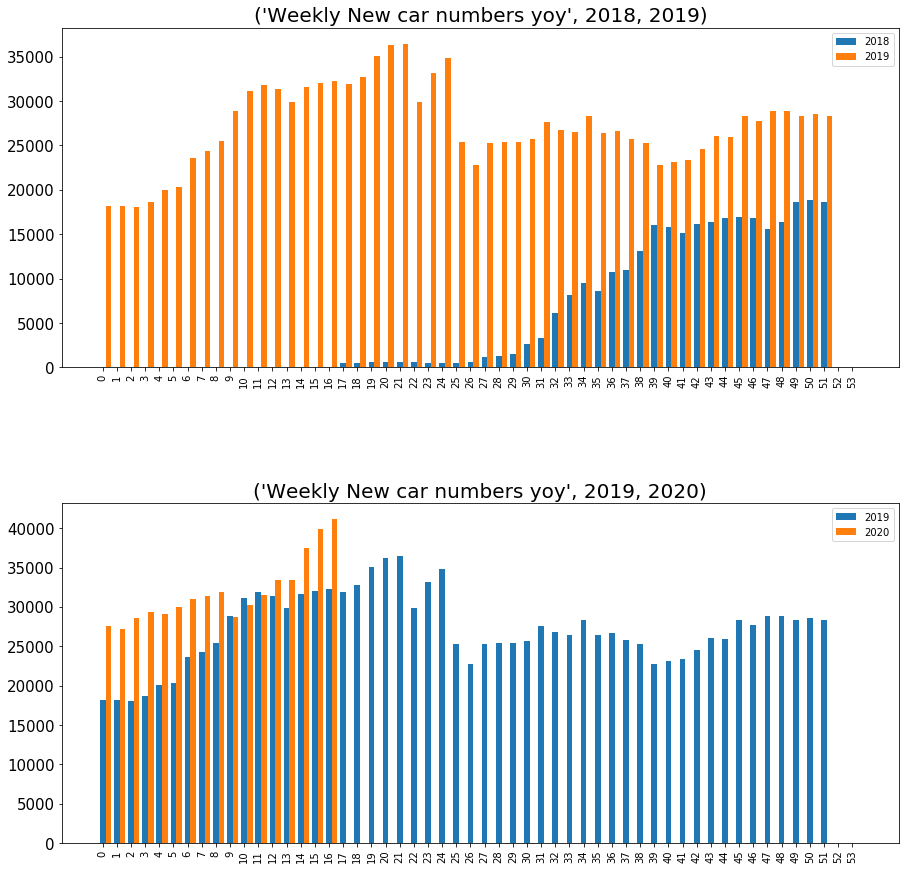

In [83]:
yoy_dataframes_charts(df_yoyData_newCars, 'Weekly New car numbers yoy', 'Auto Trader - weekly new cars yoy.png','','')

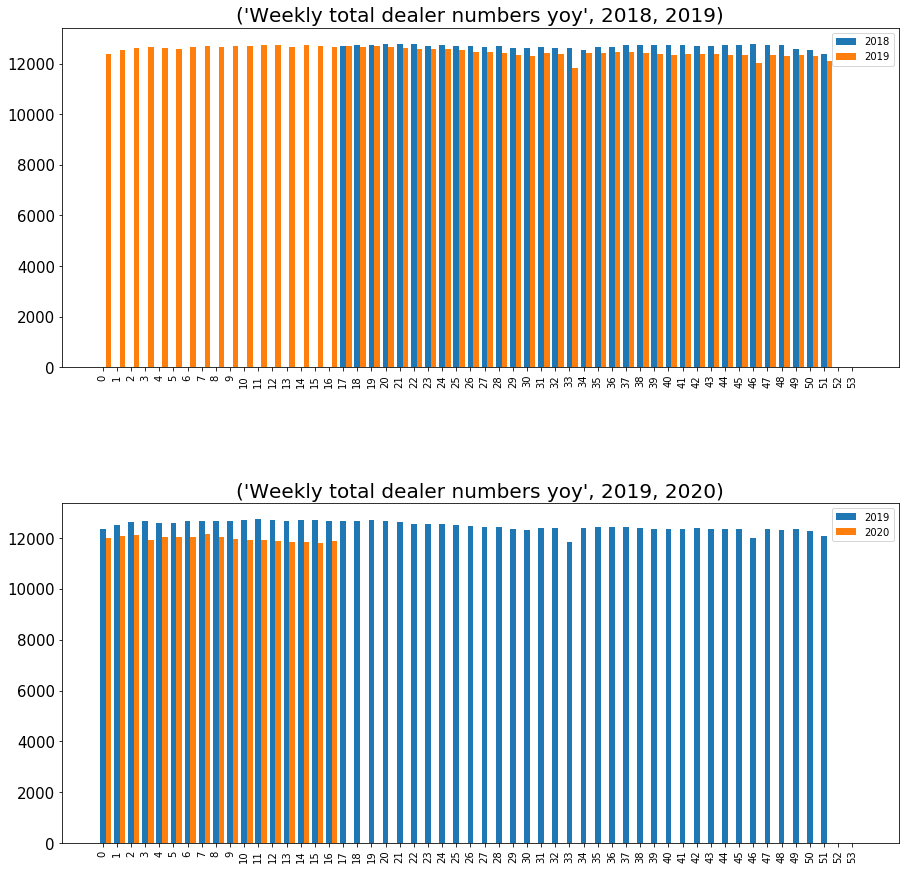

In [84]:
yoy_dataframes_charts(df_yoyData_totalDealers, 'Weekly total dealer numbers yoy', 'Auto Trader - weekly total dealers yoy.png','','')

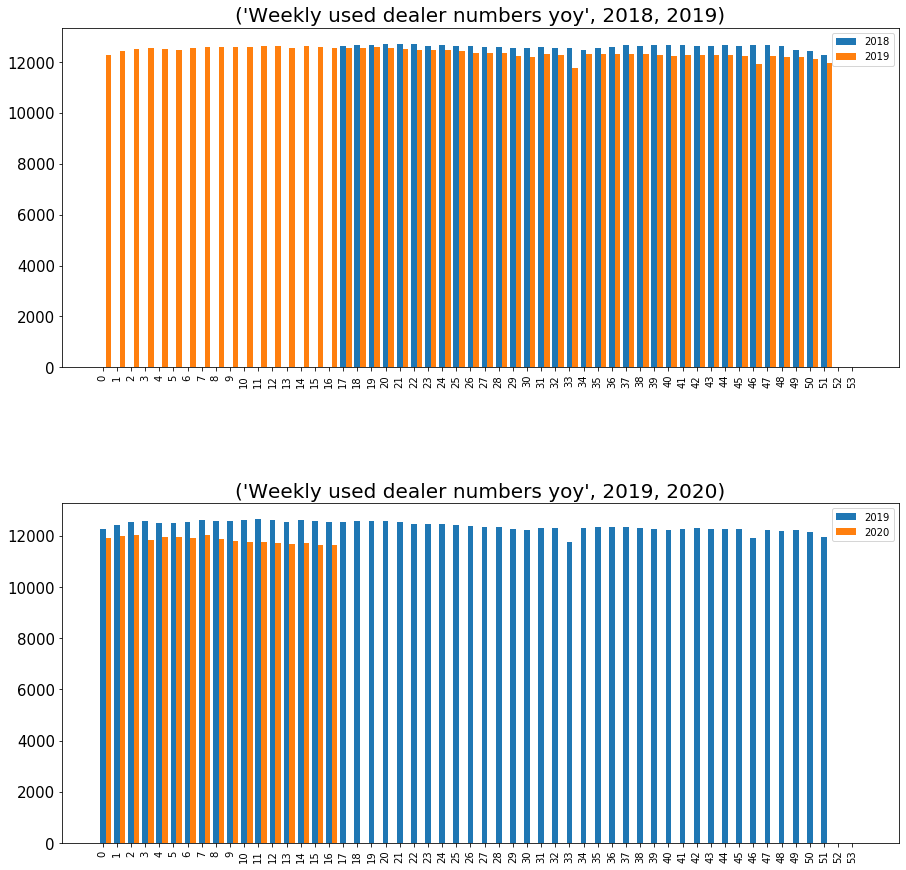

In [85]:
yoy_dataframes_charts(df_yoyData_usedDealers, 'Weekly used dealer numbers yoy', 'Auto Trader - weekly used dealers yoy.png','','')

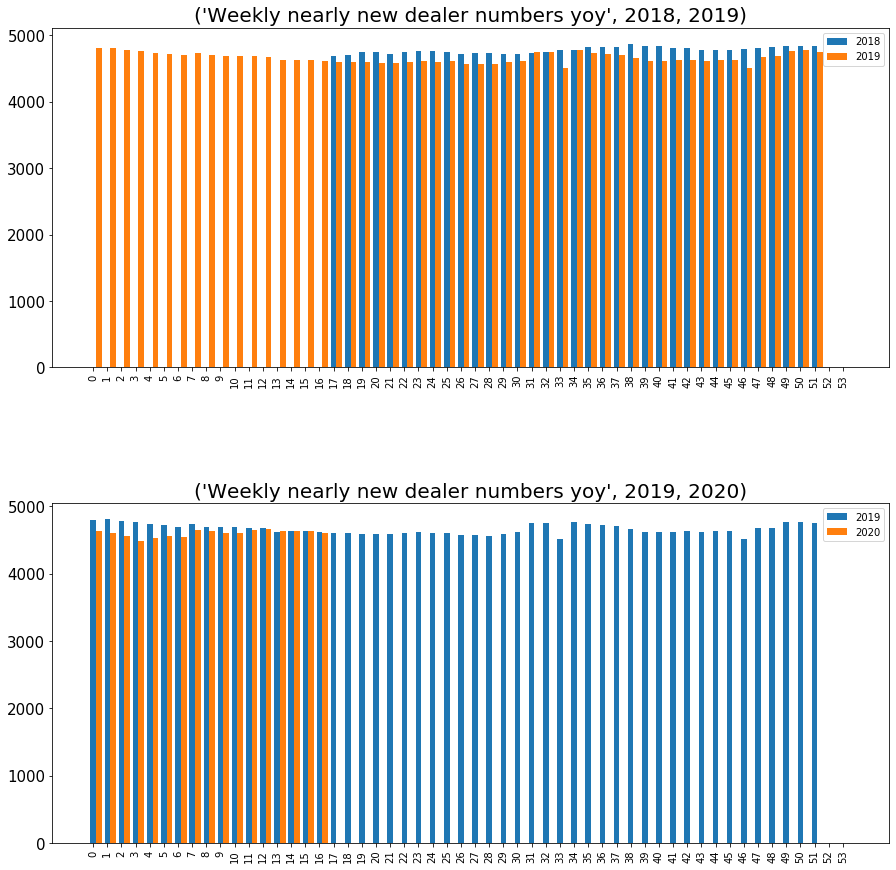

In [86]:
yoy_dataframes_charts(df_yoyData_nearlyNewDealers, 'Weekly nearly new dealer numbers yoy', 'Auto Trader - weekly nearly new dealers yoy.png','','')

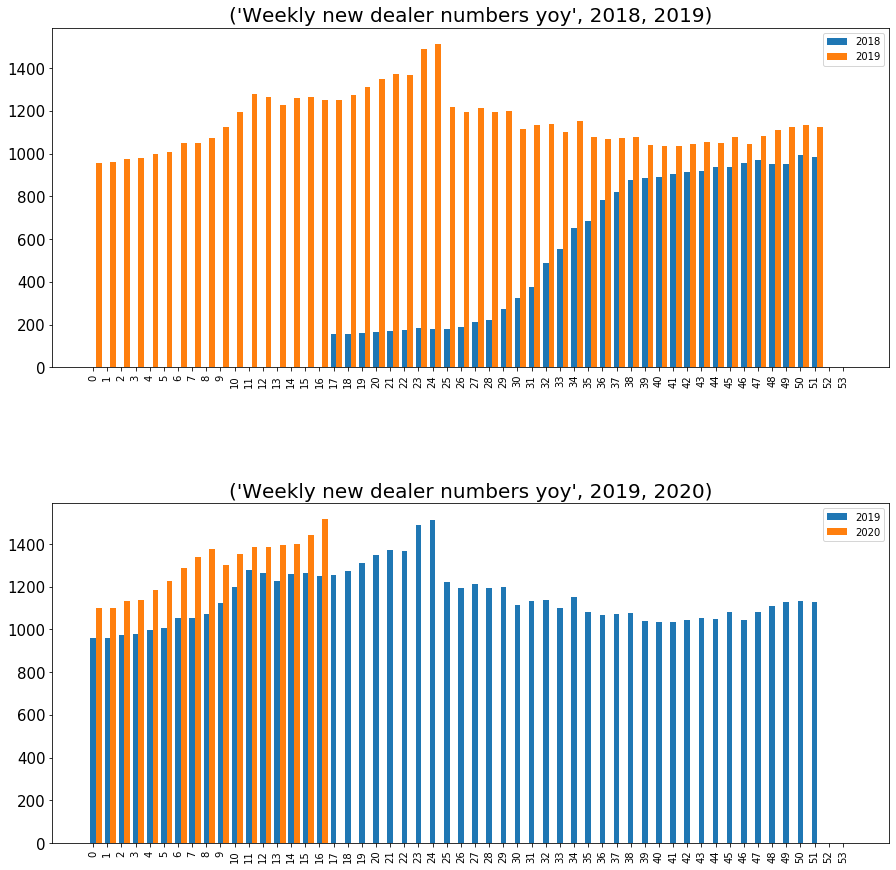

In [87]:
yoy_dataframes_charts(df_yoyData_newDealers, 'Weekly new dealer numbers yoy', 'Auto Trader - weekly new dealers yoy.png','','')

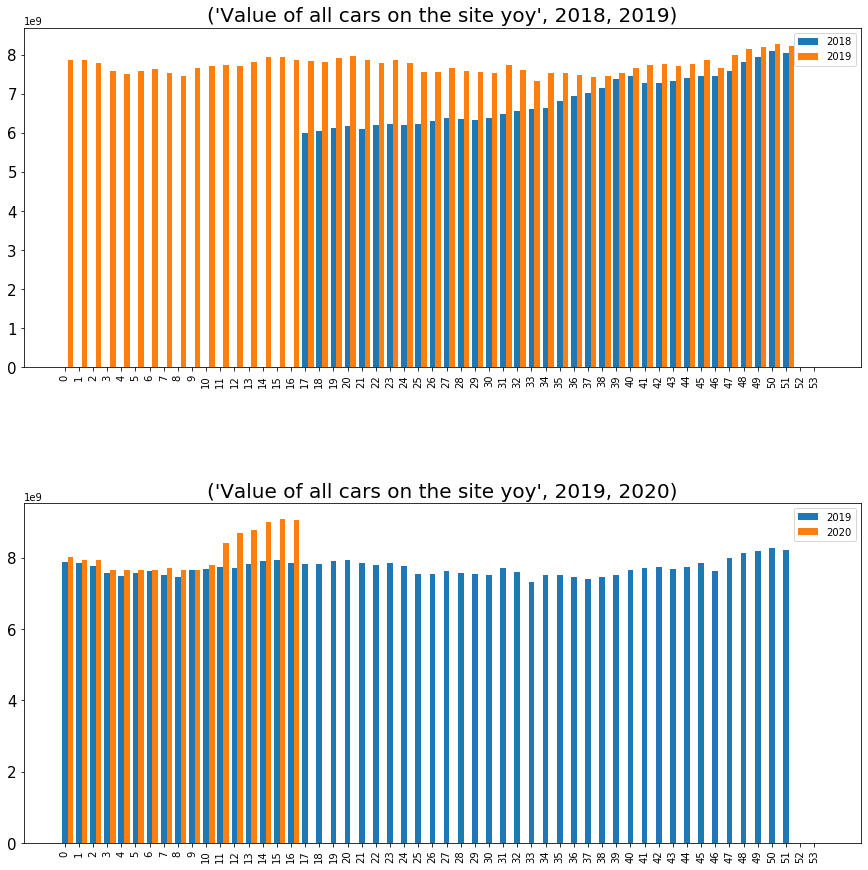

In [88]:
yoy_dataframes_charts(df_yoyData_totalValCars, 'Value of all cars on the site yoy', 'Auto Trader - value of all cars on the site yoy.png','','')

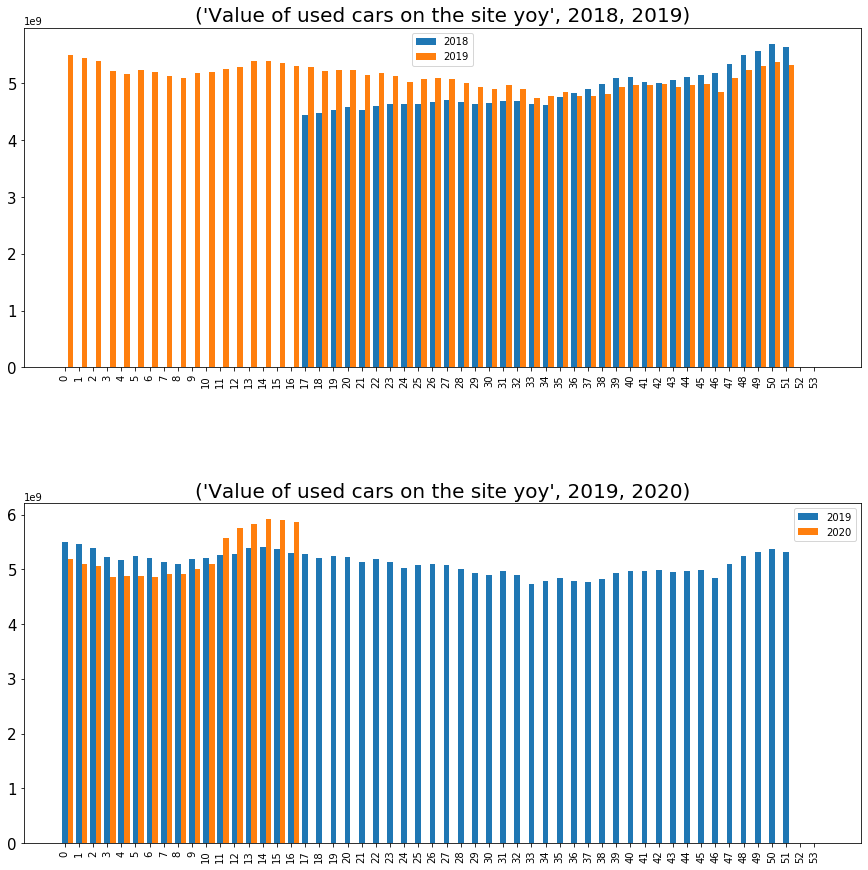

In [89]:
yoy_dataframes_charts(df_yoyData_usedValCars, 'Value of used cars on the site yoy', 'Auto Trader - value of used cars on the site yoy.png','','')

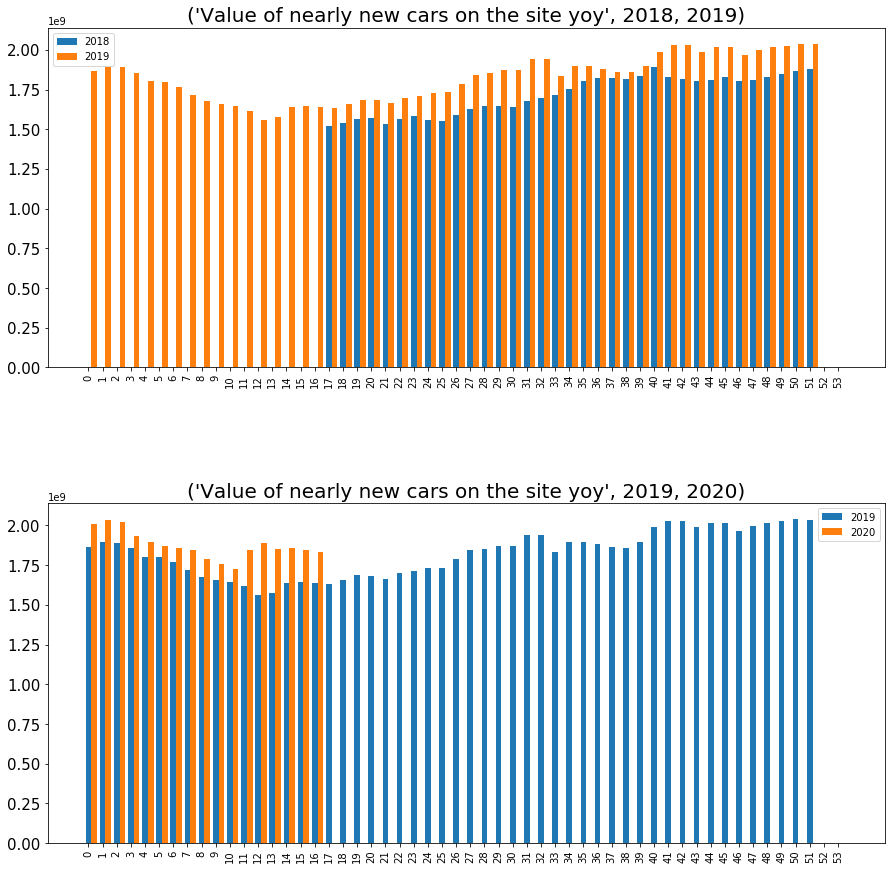

In [90]:
yoy_dataframes_charts(df_yoyData_nearlyNewValCars, 'Value of nearly new cars on the site yoy', 'Auto Trader - value of nearly new cars on the site yoy.png','','')

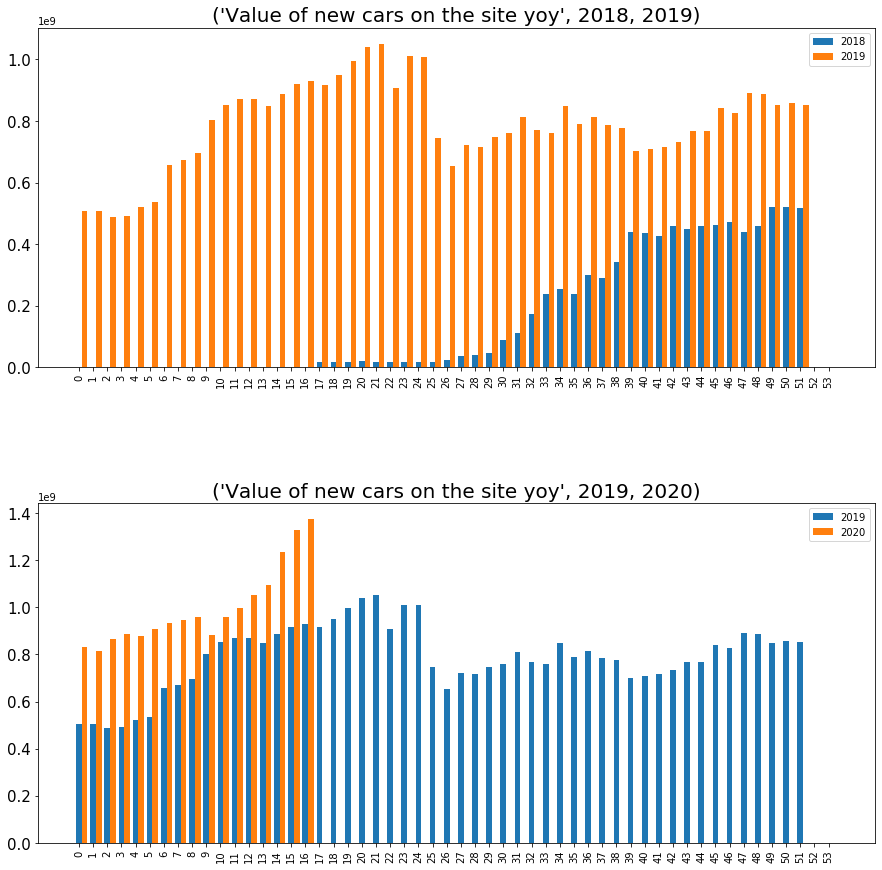

In [91]:
yoy_dataframes_charts(df_yoyData_newValCars, 'Value of new cars on the site yoy', 'Auto Trader - value of new cars on the site yoy.png','','')

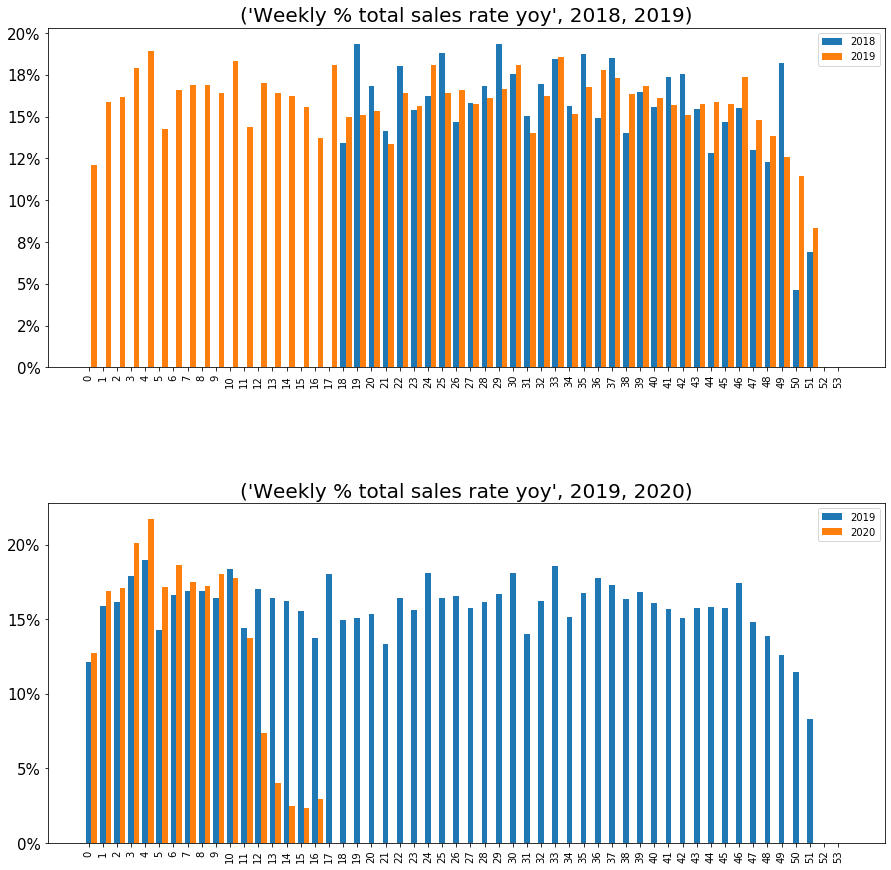

In [92]:
yoy_dataframes_charts(df_yoyData_pcttotalGone, 'Weekly % total sales rate yoy', 'Auto Trader - weekly % total sales rate yoy.png','percent',0)

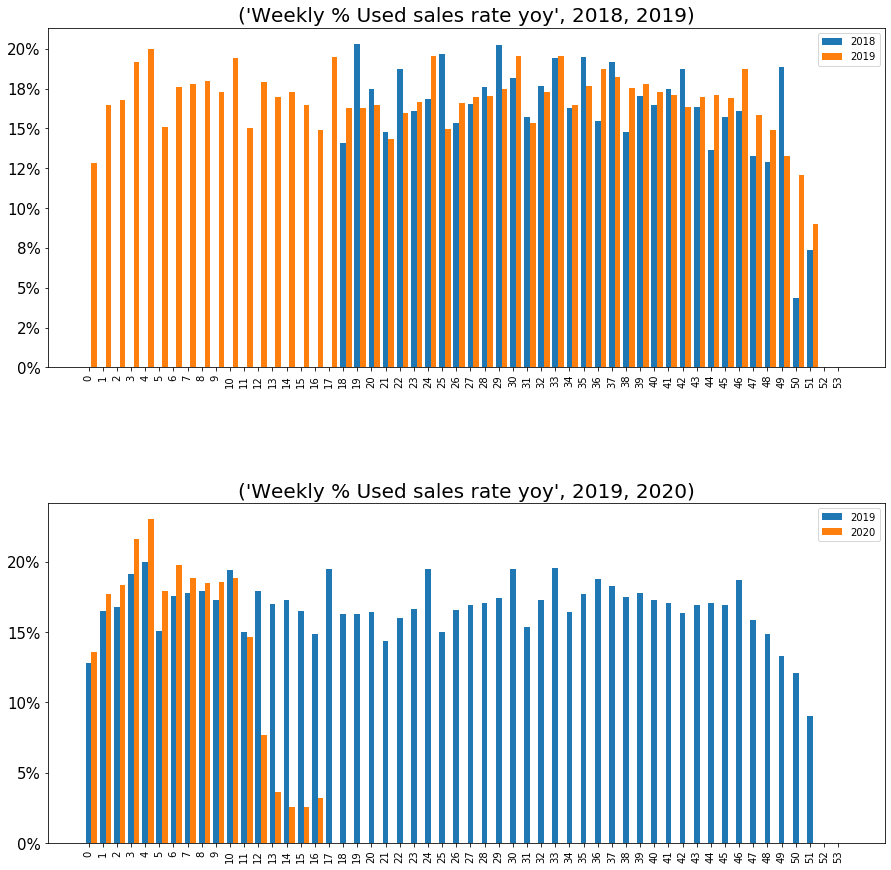

In [93]:
yoy_dataframes_charts(df_yoyData_pctusedGone, 'Weekly % Used sales rate yoy', 'Auto Trader - weekly % used sales rate yoy.png','percent',0)

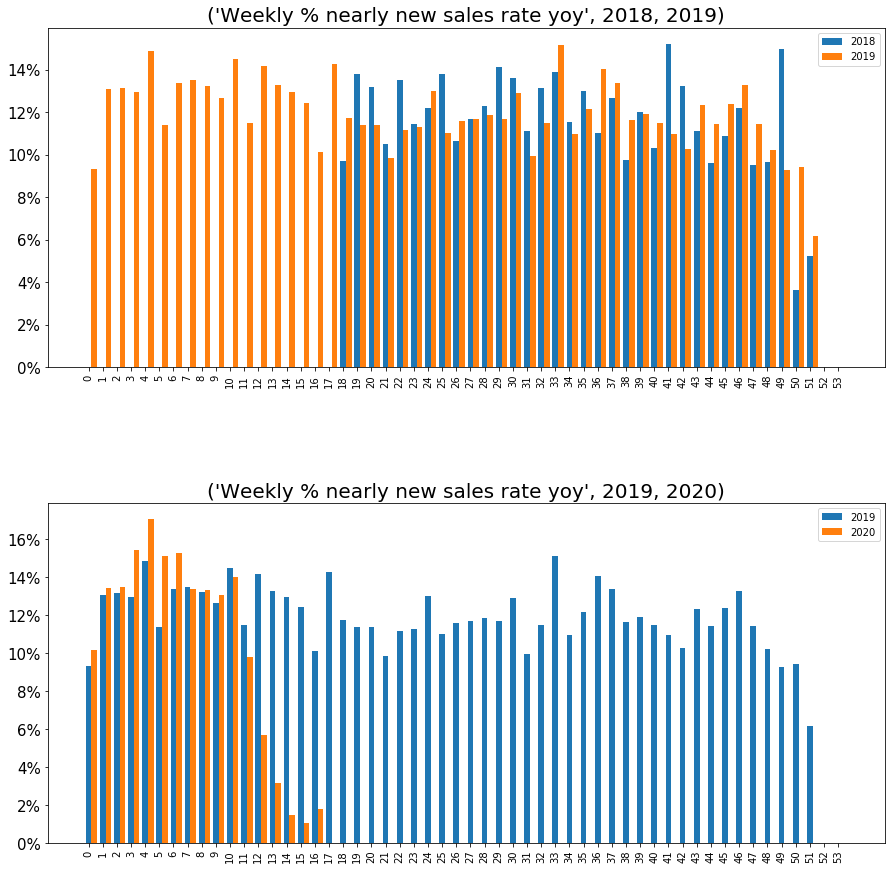

In [94]:
yoy_dataframes_charts(df_yoyData_pctnearlyNewGone, 'Weekly % nearly new sales rate yoy', 'Auto Trader - weekly % nearly new sales rate yoy.png','percent',0)

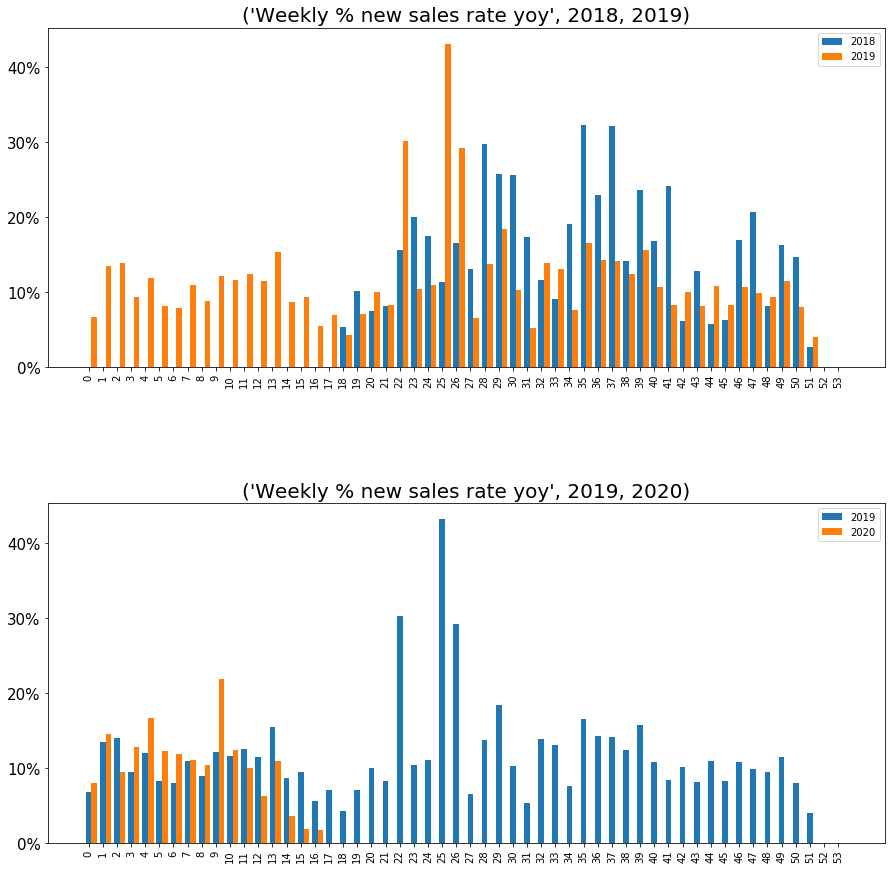

In [95]:
yoy_dataframes_charts(df_yoyData_pctnewGone, 'Weekly % new sales rate yoy', 'Auto Trader - weekly % new sales rate yoy.png','percent',0)

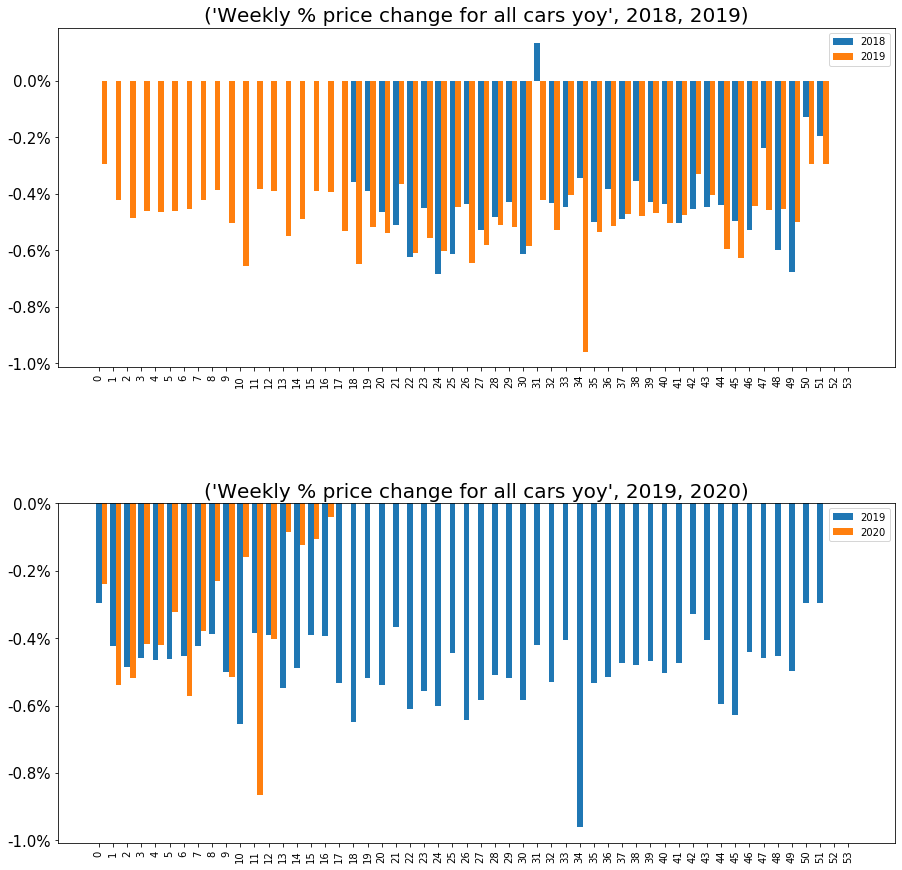

In [96]:
yoy_dataframes_charts(df_yoyData_pcttotalPriceChg, 'Weekly % price change for all cars yoy', 'Auto Trader - weekly % price change all cars yoy.png','percent',1)

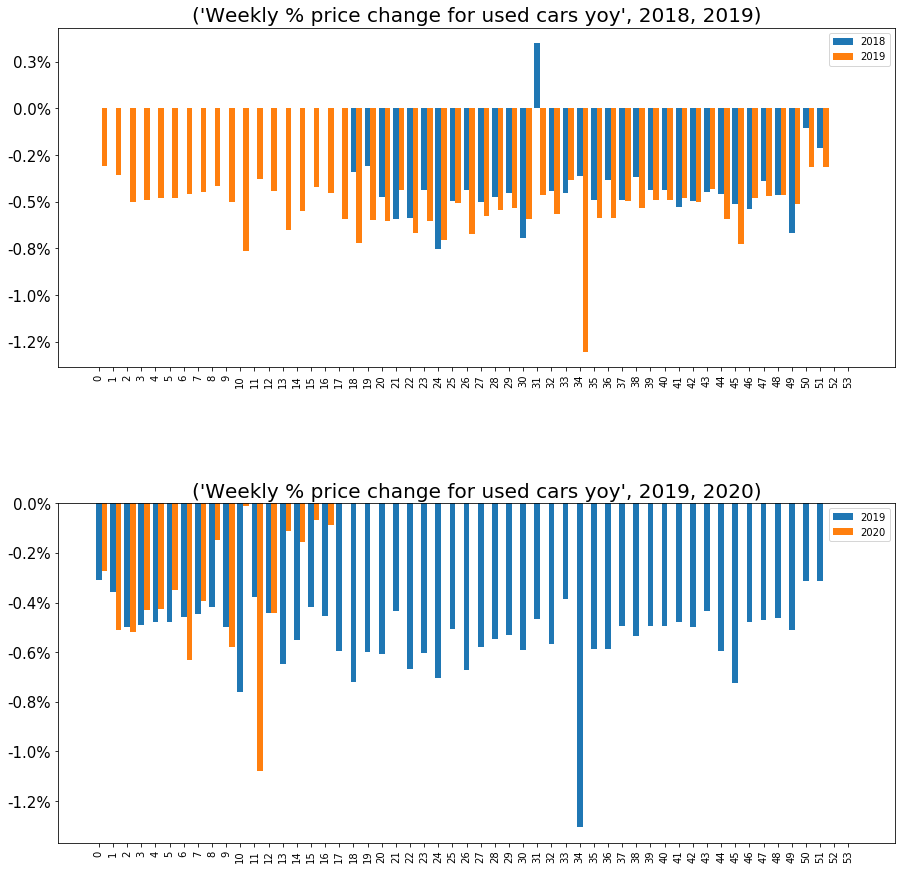

In [97]:
yoy_dataframes_charts(df_yoyData_pctusedPriceChg, 'Weekly % price change for used cars yoy', 'Auto Trader - weekly % price change used cars yoy.png','percent',1)

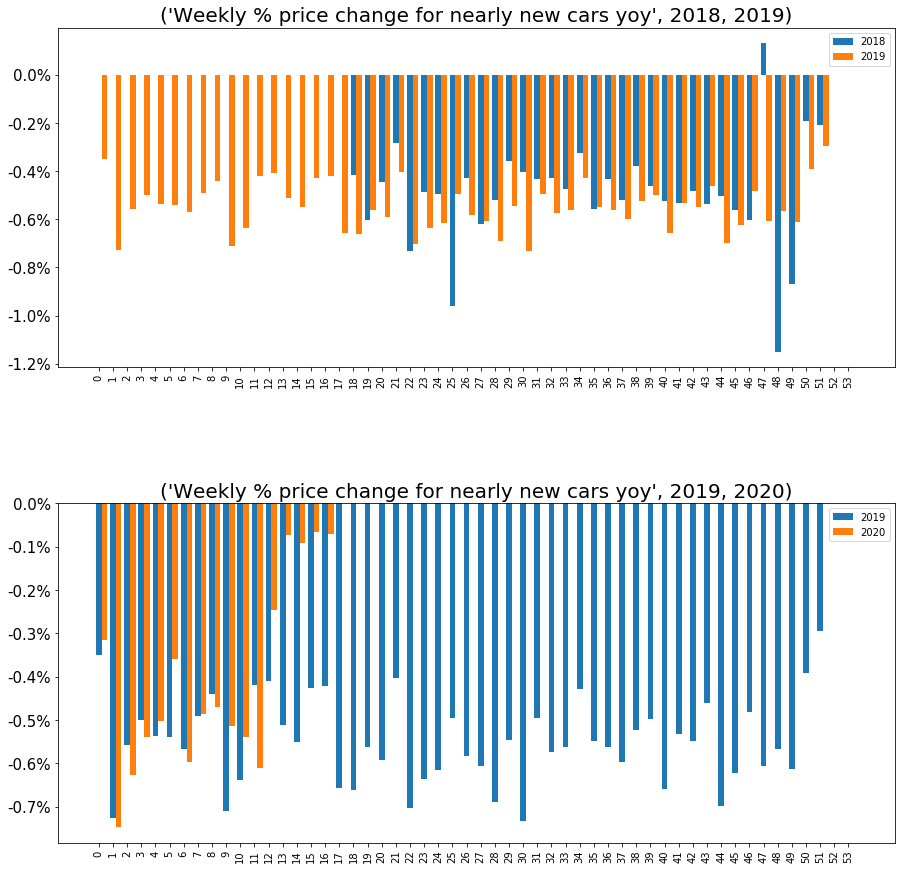

In [98]:
yoy_dataframes_charts(df_yoyData_pctnearlyNewPriceChg, 'Weekly % price change for nearly new cars yoy', 'Auto Trader - weekly % price change nearly new cars yoy.png','percent',1)

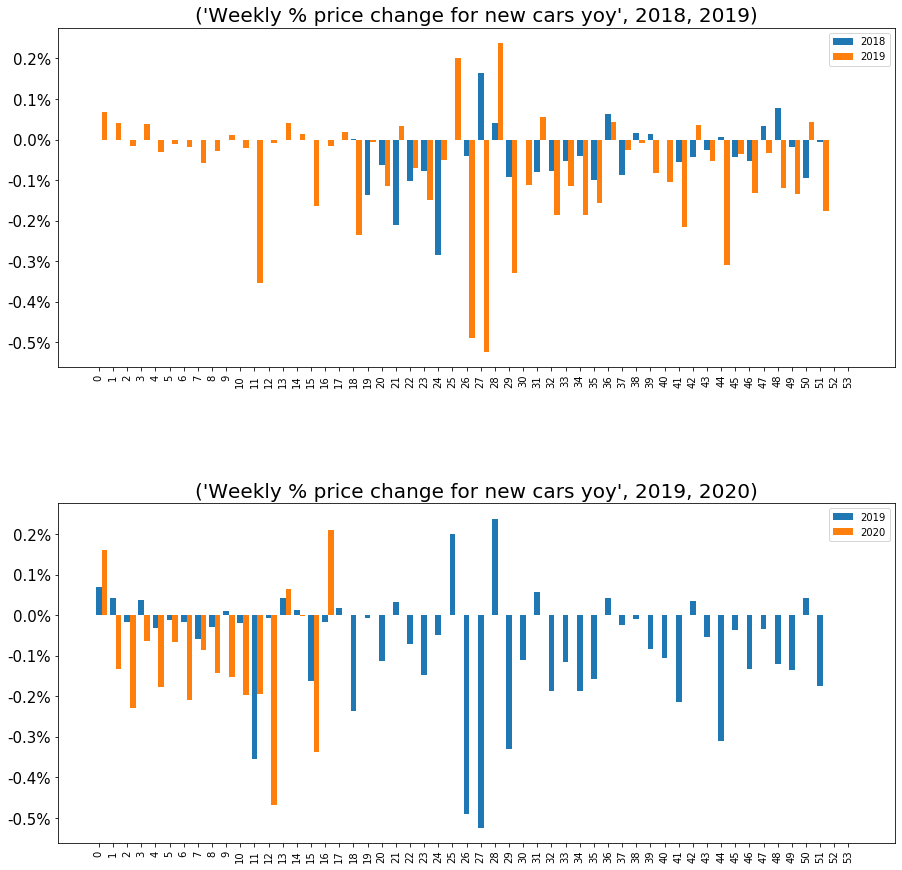

In [99]:
yoy_dataframes_charts(df_yoyData_pctnewPriceChg, 'Weekly % price change for new cars yoy', 'Auto Trader - weekly % price change new cars yoy.png','percent',1)

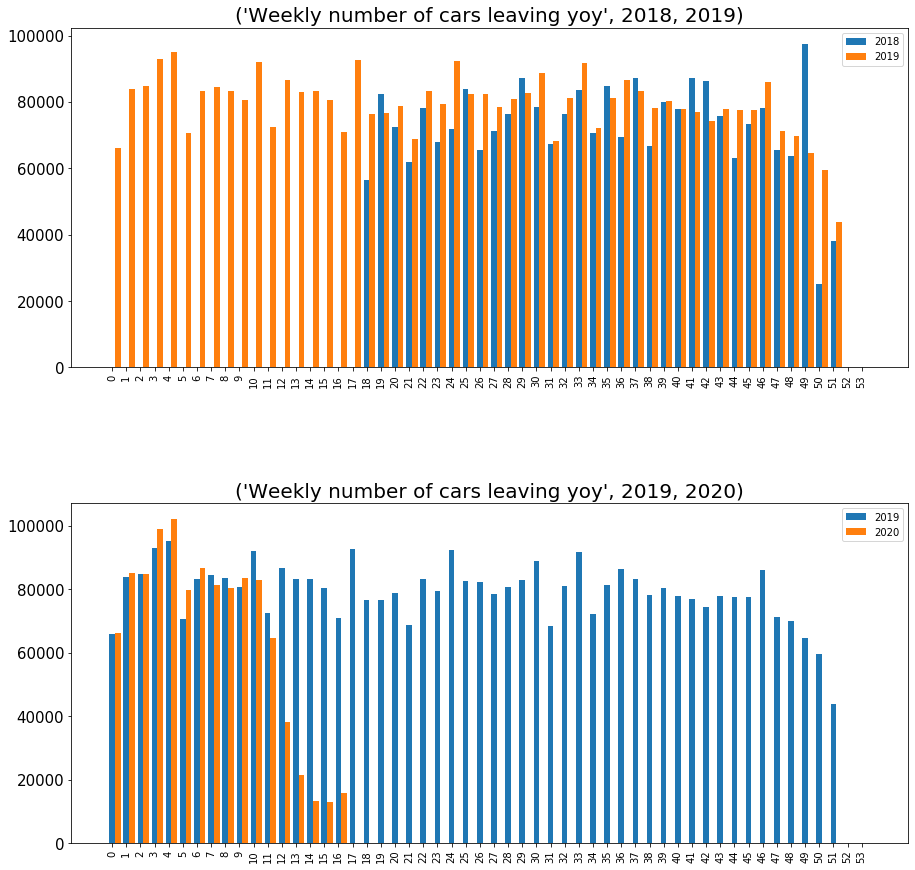

In [100]:
yoy_dataframes_charts(df_yoyData_volGone, 'Weekly number of cars leaving yoy', 'Auto Trader - weekly total cars leaving yoy.png','','')

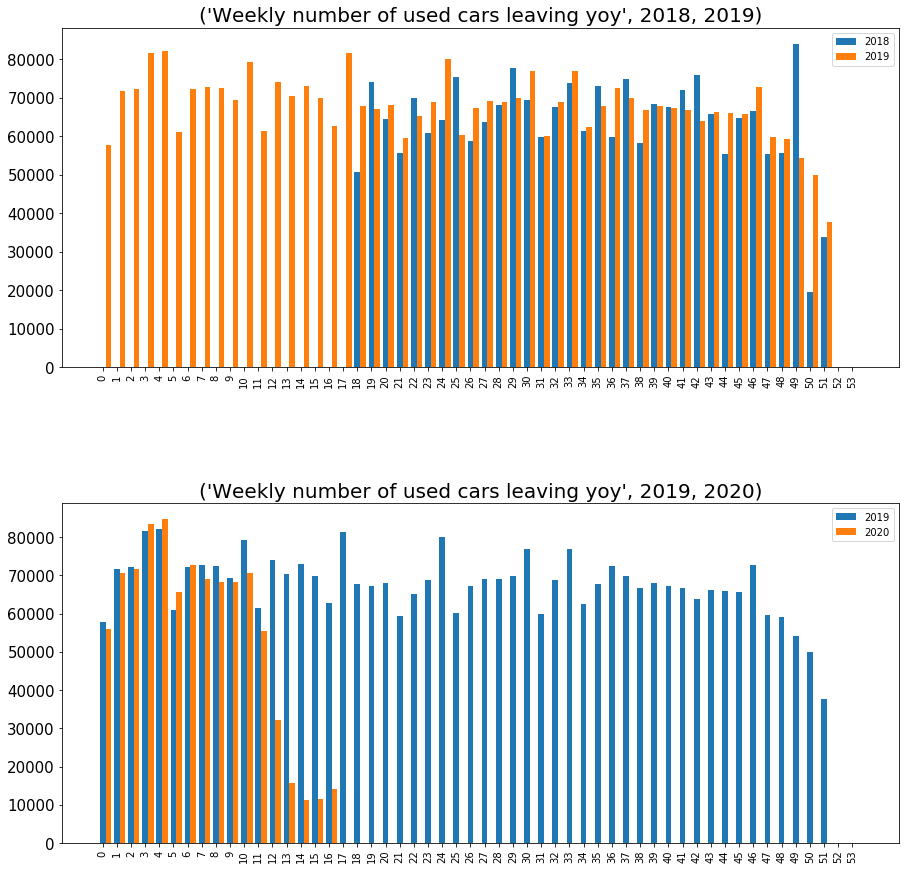

In [101]:
yoy_dataframes_charts(df_yoyData_volUsedGone, 'Weekly number of used cars leaving yoy', 'Auto Trader - weekly used cars leaving yoy.png','','')

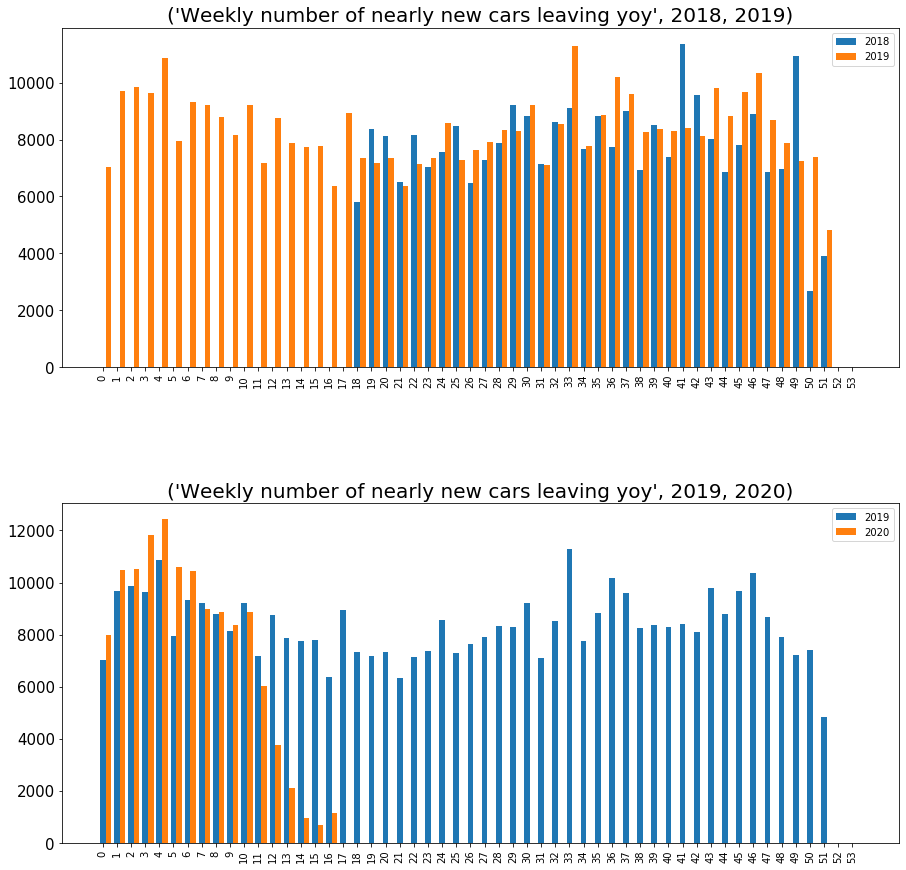

In [102]:
yoy_dataframes_charts(df_yoyData_volnearlyNewGone, 'Weekly number of nearly new cars leaving yoy', 'Auto Trader - weekly nearly new cars leaving yoy.png','','')

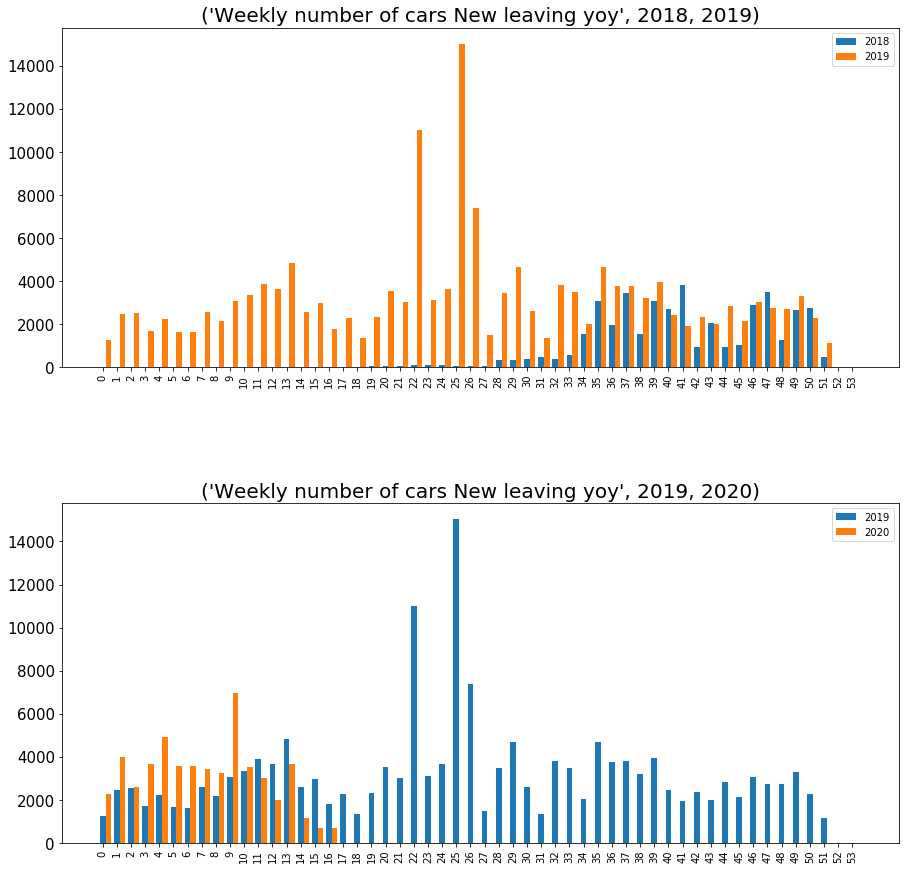

In [103]:
yoy_dataframes_charts(df_yoyData_volNewGone, 'Weekly number of cars New leaving yoy', 'Auto Trader - weekly new cars leaving yoy.png','','')

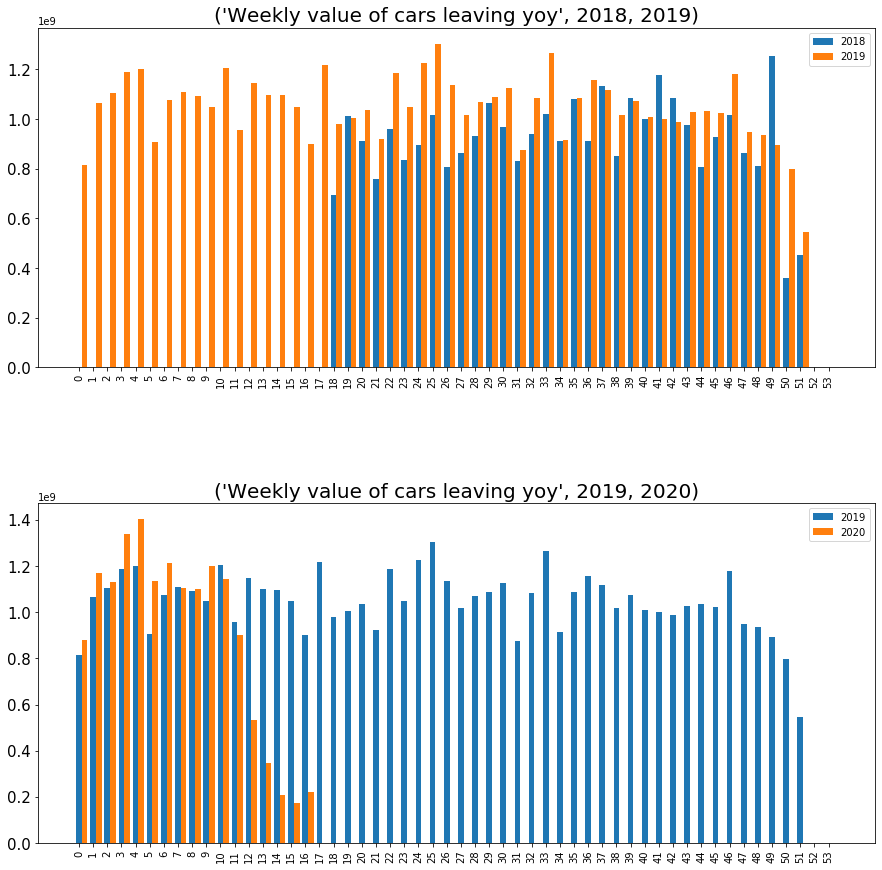

In [104]:
yoy_dataframes_charts(df_yoyData_valGone, 'Weekly value of cars leaving yoy', 'Auto Trader - weekly total value cars leaving yoy.png','','')

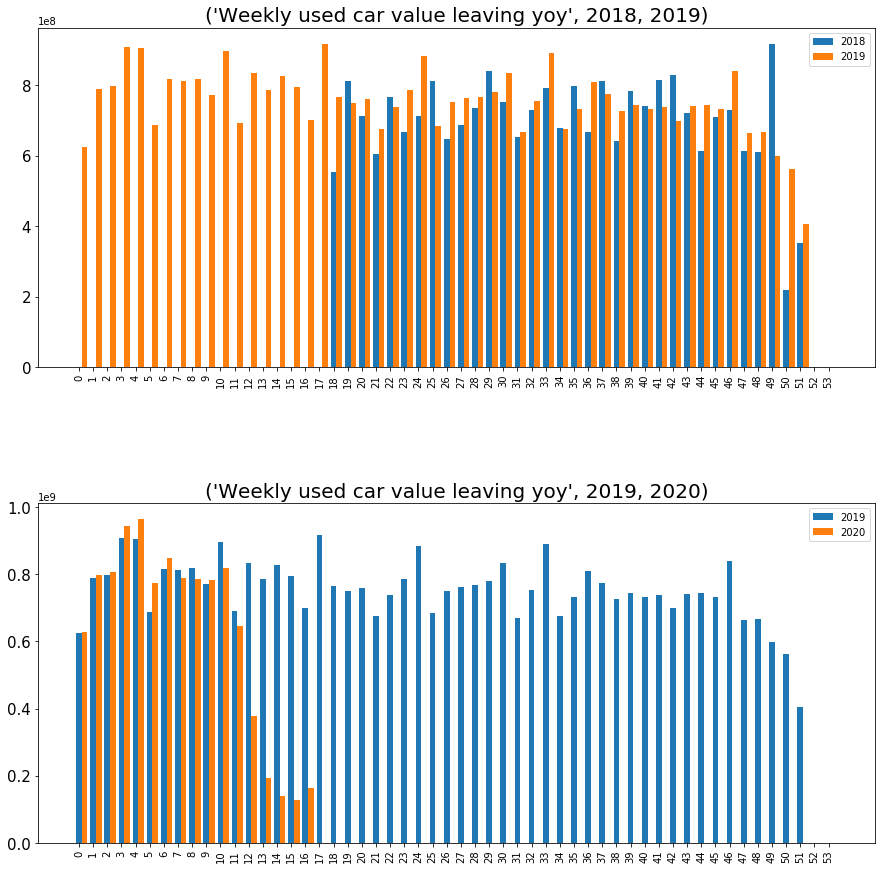

In [105]:
yoy_dataframes_charts(df_yoyData_valUsedGone, 'Weekly used car value leaving yoy', 'Auto Trader - weekly used car value leaving yoy.png','','')

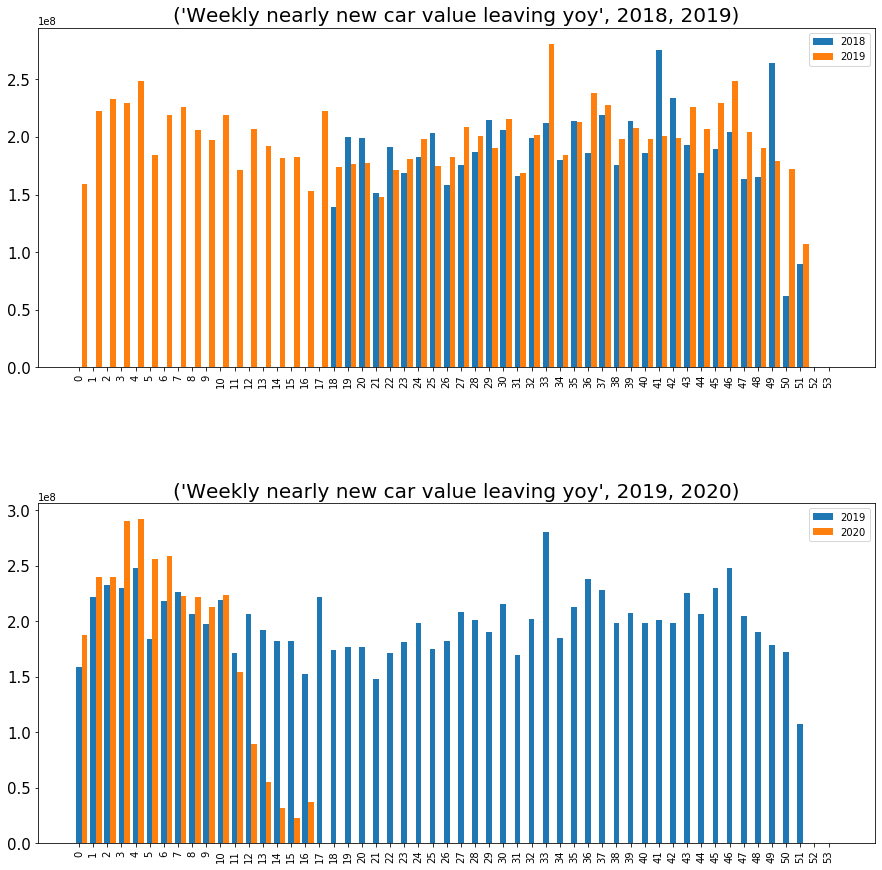

In [106]:
yoy_dataframes_charts(df_yoyData_valnearlyNewGone, 'Weekly nearly new car value leaving yoy', 'Auto Trader - weekly nearly new car value leaving yoy.png','','')

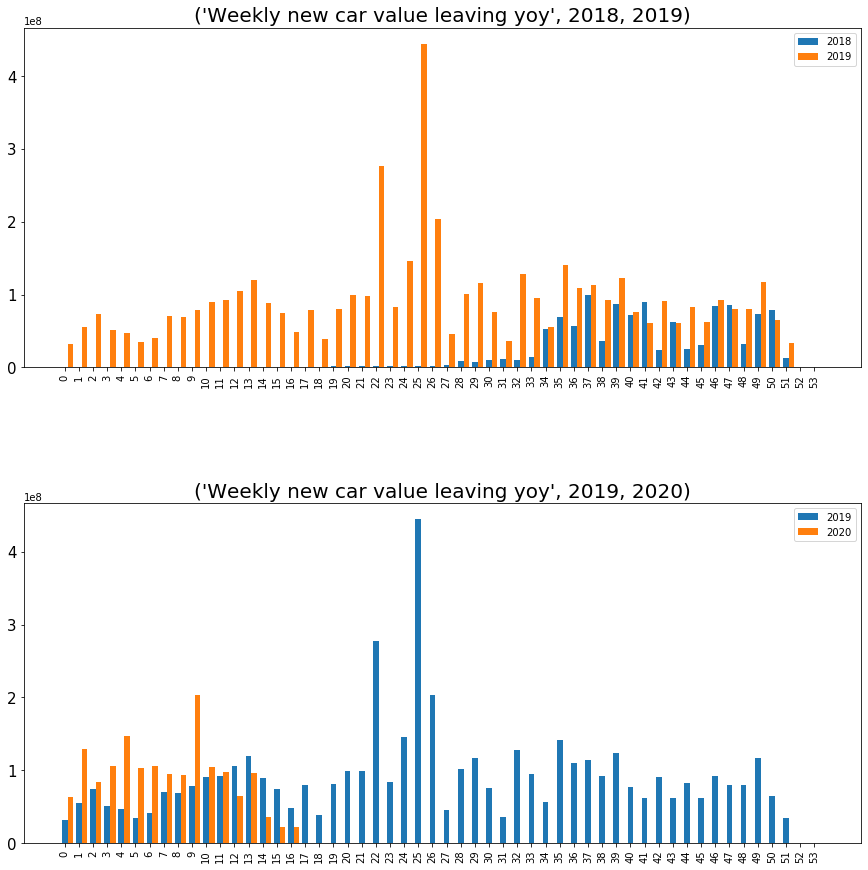

In [107]:
yoy_dataframes_charts(df_yoyData_valNewGone, 'Weekly new car value leaving yoy', 'Auto Trader - weekly new car value leaving yoy.png','','')

In [108]:
#
# Exploring Pendragon data
# brands are halshaw|stratstone|car store|quickco|hornburg|pinewwod
#

In [109]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Pendragon cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Pendragon Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [110]:
pendragonVolume_New = []
pendragonVolume_NearlyNew = []
pendragonVolume_Used = []

for i in range(len(df)):
    pendragonVolume_New.append(df[i][(df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i]['condition'] == 'New')]['name'].count())
    pendragonVolume_NearlyNew.append(df[i][(df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i]['condition'] == 'Nearly New')]['name'].count())
    pendragonVolume_Used.append(df[i][(df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i]['condition'] == 'Used')]['name'].count())
    
df_summary['Pendragon New'] = pendragonVolume_New
df_summary['Pendragon Nearly New'] = pendragonVolume_NearlyNew
df_summary['Pendragon Used'] = pendragonVolume_Used
df_summary['Pendragon total'] = df_summary['Pendragon New'] + df_summary['Pendragon Nearly New'] + df_summary['Pendragon Used']

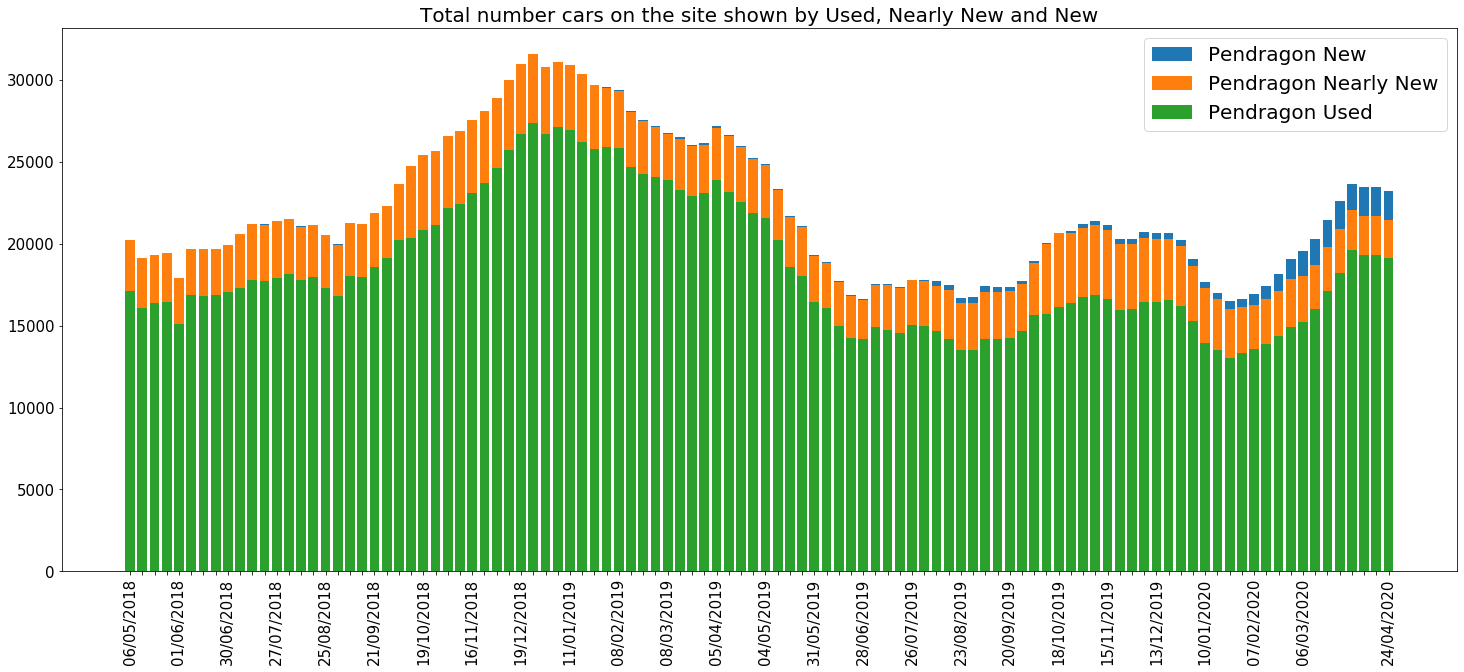

In [111]:
# 1 bar chart showing Pendragon cars broken down by used, nearly new and new

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary.index.values

labels = list(df_summary['Date'])

for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

chart_cols=['Pendragon Used','Pendragon Nearly New','Pendragon New']
cum_sum = [0]*len(df_summary)
y = [0]*len(chart_cols)

for i in range(0,len(chart_cols)):
    cum_sum = cum_sum + df_summary[chart_cols[i]]
    y[i] = cum_sum

ax.set_title('Total number cars on the site shown by Used, Nearly New and New', fontsize=20)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_tick_params(labelsize=15)


for i in range(len(chart_cols)-1,-1,-1):
    ax.bar(x, y[i], label = chart_cols[i])

ax.legend(fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - bar chart of Pendragon cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Pendragon cars on the site by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - bar chart of Pendragon cars on site.png')

plt.show()


In [112]:
price_change_total_pendragon = [0]
price_change_nearlyNew_pendragon = [0]
price_change_used_pendragon = [0]

for i in range(1,len(df)):
    price_total1_pendragon = df[i][(df[i]['veh_id'].isin(df[i-1]['veh_id'])) & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['price'].sum()
    price_total0_pendragon = df[i-1][(df[i-1]['veh_id'].isin(df[i]['veh_id'])) & ((df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['price'].sum()
    price_nearlyNew1_pendragon = df[i][(df[i]['veh_id'].isin(df[i-1]['veh_id'])) & (df[i]['condition'] == 'Nearly New')  & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['price'].sum()
    price_nearlyNew0_pendragon = df[i-1][(df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['condition'] == 'Nearly New') & ((df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['price'].sum()
    price_used1_pendragon = df[i][(df[i]['veh_id'].isin(df[i-1]['veh_id'])) & (df[i]['condition'] == 'Used') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['price'].sum()
    price_used0_pendragon = df[i-1][(df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['condition'] == 'Used') & ((df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['price'].sum()

    price_change_total_pendragon.append((price_total1_pendragon - price_total0_pendragon)/price_total0_pendragon)
    price_change_nearlyNew_pendragon.append((price_nearlyNew1_pendragon - price_nearlyNew0_pendragon)/price_nearlyNew0_pendragon)
    price_change_used_pendragon.append((price_used1_pendragon - price_used0_pendragon)/price_used0_pendragon)
    
df_summary['price change total pendragon'] = price_change_total_pendragon
df_summary['price change nearly new pendragon'] = price_change_nearlyNew_pendragon
df_summary['price change used pendragon'] = price_change_used_pendragon

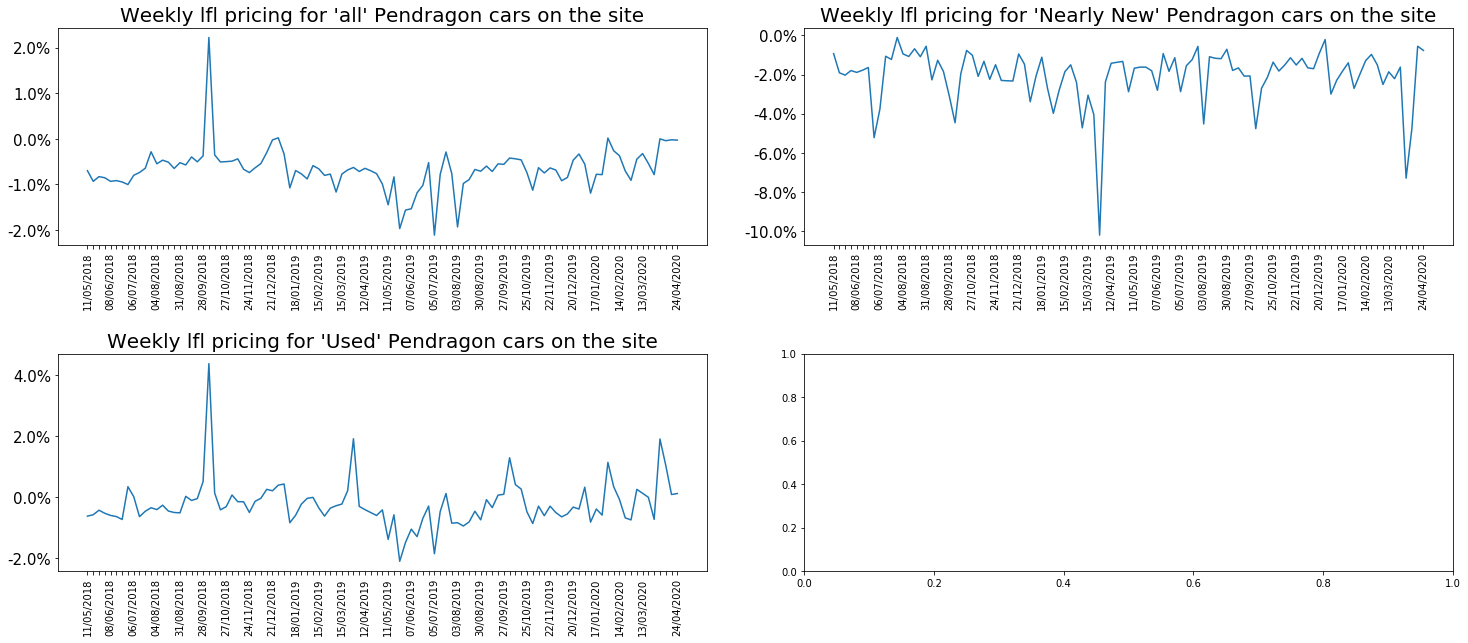

In [113]:
# plot 4 chart showing weekly lfl pricing of pendragon cars remaining on the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('weekly lfl pricing for pendragon cars remaining on the site\n(y-axis scaled differently for each chart)', fontsize = 20)


x = df_summary['Date'][1:]

labels = list(df_summary['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['price change total pendragon','price change nearly new pendragon','price change used pendragon']
chart_titles=['all', 'Nearly New','Used']

for i in range(3):
    y.append(df_summary[chart_cols[i]][1:])
    ax[int(i/2),i%2].set_title(str("Weekly lfl pricing for '") + chart_titles[i] + str("' Pendragon cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
    ax[int(i/2),i%2].plot(x, y[i])

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - pendragon weekly lfl price change by condition.png', bbox_inches = 'tight')

    slideTitle.append('Weekly lfl price change for pendragon cars remaining on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - pendragon weekly lfl price change by condition.png')   
    
plt.show()

In [114]:
# calculation the % of Pendragon sales each week
   
leave_pendragon_New = [0]
leave_pendragon_NearlyNew = [0]
leave_pendragon_Used = [0]

for i in range(1,len(df)):
    leave_pendragon_New.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i-1]['condition'] == 'New')]['name'].count())
    leave_pendragon_NearlyNew.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i-1]['condition'] == 'Nearly New')]['name'].count())
    leave_pendragon_Used.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)) & (df[i-1]['condition'] == 'Used')]['name'].count())

df_summary['Pendragon New gone'] = leave_pendragon_New
df_summary['Pendragon Nearly New gone'] = leave_pendragon_NearlyNew
df_summary['Pendragon Used gone'] = leave_pendragon_Used   

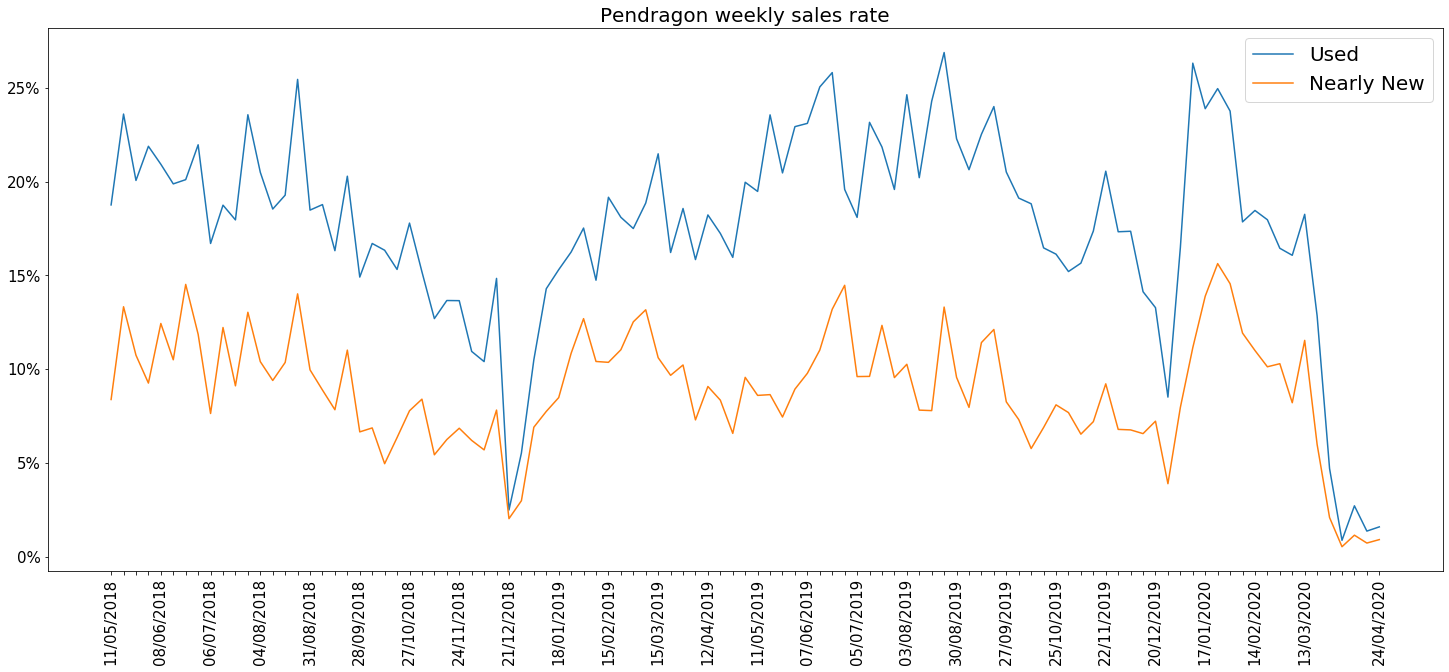

In [115]:
# plot 1 chart showing pendragon sales rate

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date'][1:]

#prevent x-axis labels from overlapping by printing first, every 5 and last label only
labels = list(df_summary['Date'][1:])
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['Pendragon Used gone'][1:] / df_summary['Pendragon Used'][1:]
y2 = df_summary['Pendragon Nearly New gone'][1:] / df_summary['Pendragon Nearly New'][1:]
#y3 = df_summary['Pendragon New gone'] / df_summary['Pendragon New']
#ax.set_xticks(x)
ax.set_title('Pendragon weekly sales rate', fontsize=20)
ax.set_xticklabels(labels, rotation = 90, fontsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
#ax.set_ylim(top = 0.4)
ax.plot(x, y1, label = 'Used')
ax.plot(x, y2, label = 'Nearly New')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - pendragon pct leaving.png', bbox_inches = 'tight')

    slideTitle.append('Pendragon weekly sales rate')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - pendragon pct leaving.png')   
    
plt.show()

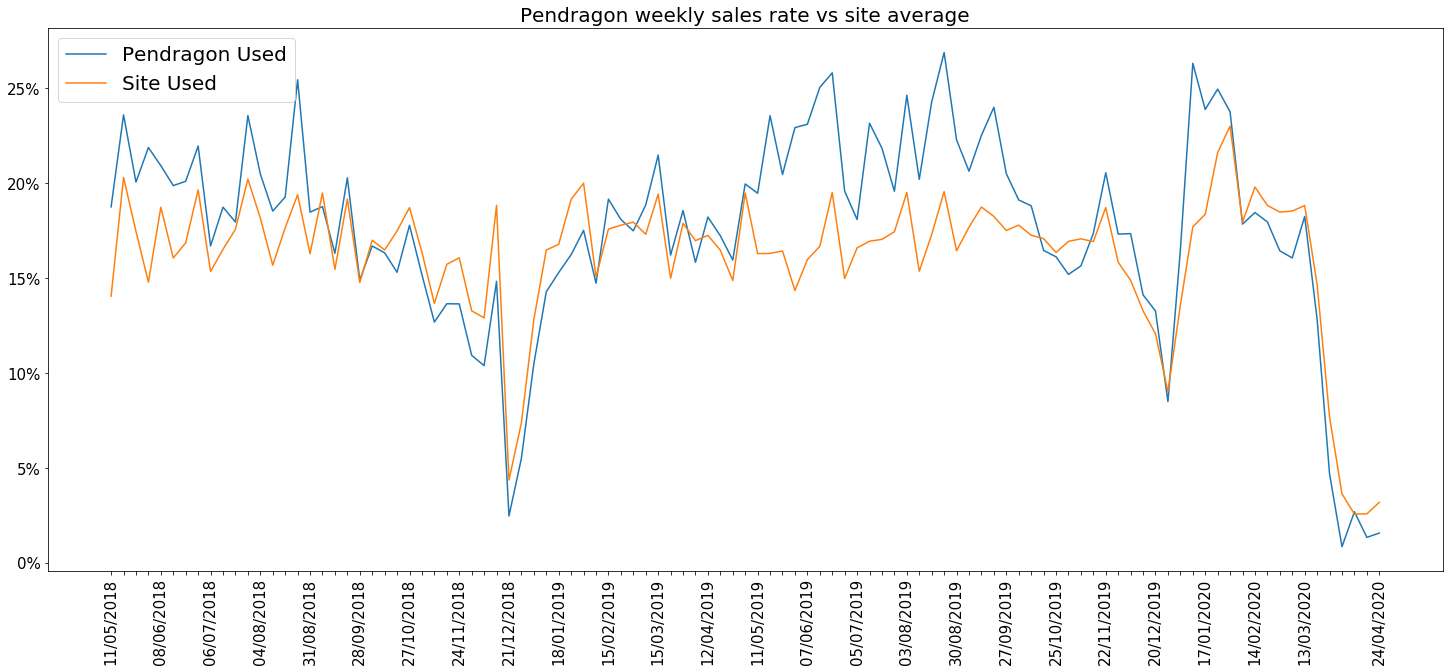

In [116]:
# plot 1 chart showing pendragon used car sales rate vs site sales rate

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date'][1:]

#prevent x-axis labels from overlapping by printing first, every 5 and last label only
labels = list(df_summary['Date'][1:])
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['Pendragon Used gone'][1:] / df_summary['Pendragon Used'][1:]
y2 = df_summary['% used gone'][1:]
#y3 = df_summary['Pendragon New gone'] / df_summary['Pendragon New']
#ax.set_xticks(x)
ax.set_title('Pendragon weekly sales rate vs site average', fontsize=20)
ax.set_xticklabels(labels, rotation = 90, fontsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
#ax.set_ylim(top = 0.4)
ax.plot(x, y1, label = 'Pendragon Used')
ax.plot(x, y2, label = 'Site Used')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - pendragon pct leaving vs average.png', bbox_inches = 'tight')

    slideTitle.append('Pendragon weekly sales rate vs site average')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - pendragon pct leaving vs average.png')   
    
plt.show()

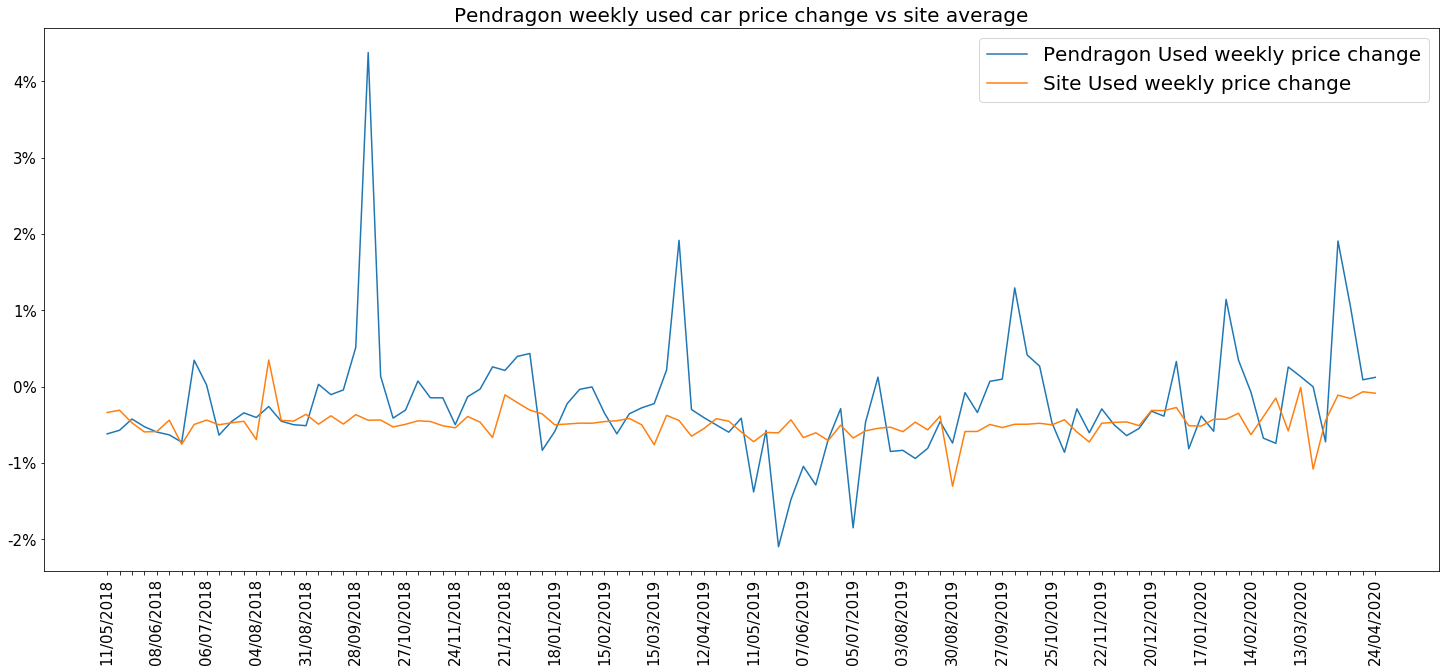

In [117]:
# plot 1 chart showing weekly lfl pricing of pendragon cars remaining on the site vs site average

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date'][1:]

#prevent x-axis labels from overlapping by printing first, every 5 and last label only
labels = list(df_summary['Date'][1:])
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['price change used pendragon'][1:]
y2 = df_summary['price change used'][1:]
#y3 = df_summary['Pendragon New gone'] / df_summary['Pendragon New']
#ax.set_xticks(x)
ax.set_title('Pendragon weekly used car price change vs site average', fontsize=20)
ax.set_xticklabels(labels, rotation = 90, fontsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
#ax.set_ylim(top = 0.4)
ax.plot(x, y1, label = 'Pendragon Used weekly price change')
ax.plot(x, y2, label = 'Site Used weekly price change')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - pendragon weekly lfl price change by condition.png', bbox_inches = 'tight')

    slideTitle.append('Weekly lfl price change for pendragon cars remaining on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - pendragon weekly lfl price change by condition.png')   
    
plt.show()

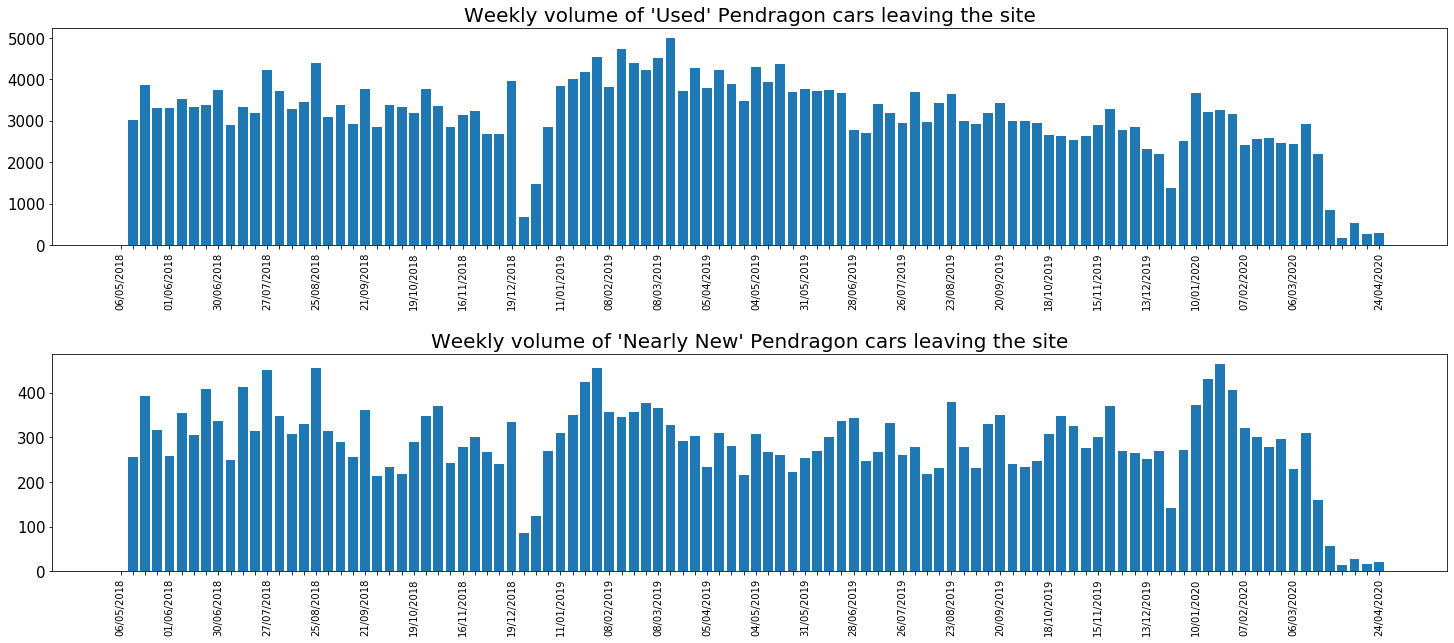

In [118]:
# 2 bar charts showing volume of all Pendragon cars, used cars, nearly new cars, new cars leaving the site

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['Pendragon Used gone','Pendragon Nearly New gone']
chart_titles=['Used','Nearly New']

for i in range(2):
    y.append(df_summary[chart_cols[i]])
    ax[i].set_title(str("Weekly volume of '") + chart_titles[i] + str("' Pendragon cars leaving the site"), fontsize=20)
    ax[i].set_xticklabels(labels, rotation = 90)
    ax[i].yaxis.set_tick_params(labelsize=15)
    #ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[i].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 2 charts volume leaving Pendragon.png', bbox_inches = 'tight')
    
    slideTitle.append('Weekly volume of Pendragon cars leaving the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 2 charts volume leaving Pendragon.png')

plt.show()

In [119]:
# add in columns for number of Pendragon videos and total images

hasVideo_pendragon = []
totalImages_pendragon = []
new_hasVideo_pendragon = []
new_totalImages_pendragon = []
nearlyNew_hasVideo_pendragon = []
nearlyNew_totalImages_pendragon = []
used_hasVideo_pendragon = []
used_totalImages_pendragon = []

for i in range(len(df)):
    hasVideo_pendragon.append(df[i][(df[i]['hasVideo'] == True) \
                                    & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                              ['cars'].count())
    totalImages_pendragon.append(df[i][((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False, na=False)))]\
                                 ['totalImages'].sum())
    new_hasVideo_pendragon.append(df[i][(df[i]['condition'] == 'New') & (df[i]['hasVideo'] == True) \
                                        & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                                  ['cars'].count())
    new_totalImages_pendragon.append(df[i][(df[i]['condition'] == 'New') \
                                           & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                                     ['totalImages'].sum())
    nearlyNew_hasVideo_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['hasVideo'] == True) \
                                              & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                                        ['cars'].count())
    nearlyNew_totalImages_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') \
                                                 & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                                           ['totalImages'].sum())    
    used_hasVideo_pendragon.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['hasVideo'] == True) \
                                         & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                                   ['cars'].count())
    used_totalImages_pendragon.append(df[i][(df[i]['condition'] == 'Used') \
                                            & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]\
                                      ['totalImages'].sum())
    
df_summary['total_hasVideo_pendragon'] = hasVideo_pendragon
df_summary['totalImages_pendragon'] = totalImages_pendragon
df_summary['used_hasVideo_pendragon'] = used_hasVideo_pendragon
df_summary['usedImages_pendragon'] = used_totalImages_pendragon
df_summary['nearlyNew_hasVideo_pendragon'] = nearlyNew_hasVideo_pendragon
df_summary['nearlyNewImages_pendragon'] = nearlyNew_totalImages_pendragon
df_summary['new_hasVideo_pendragon'] = new_hasVideo_pendragon
df_summary['newImages_pendragon'] = new_totalImages_pendragon

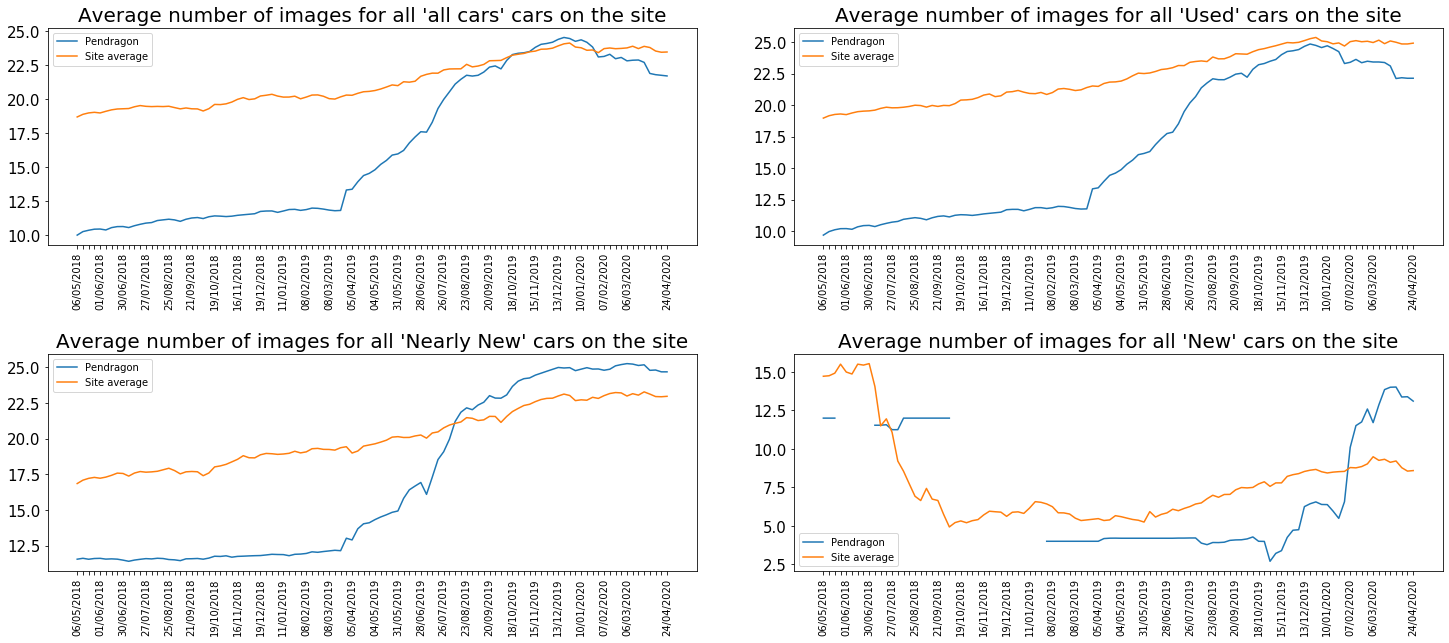

In [120]:
# 4 bar charts showing Pendragon average number of images for all, used, nearly new and new cars on the site
# vs the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1=[]
y2=[]
chart_cols=['totalImages_pendragon','usedImages_pendragon','nearlyNewImages_pendragon','newImages_pendragon']
chart_cols_site=['totalImages','usedImages','nearlyNewImages','newImages']
chart_titles=['all cars','Used','Nearly New','New']
chart_cols_1=['Pendragon total','Pendragon Used','Pendragon Nearly New','Pendragon New']
chart_cols_site_1=['Total Cars','Used','Nearly New','New']

for i in range(4):
    y1.append(df_summary[chart_cols[i]]/df_summary[chart_cols_1[i]])
    y2.append(df_summary[chart_cols_site[i]]/df_summary[chart_cols_site_1[i]])
    ax[int(i/2),i%2].set_title(str("Average number of images for all '") + chart_titles[i] + str("' cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].plot(x, y1[i], label = 'Pendragon')
    ax[int(i/2),i%2].plot(x, y2[i], label = 'Site average')
    ax[int(i/2),i%2].legend()

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts Pendragon average images vs site.png', bbox_inches = 'tight')
    
    slideTitle.append('Average Number of images per Pendragon vs site cars by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts Pendragon average images vs site.png')

plt.show()

In [121]:
# add columns for fuel type for new, nearly new and used cars

total_fuelPetrol_pendragon = []
total_fuelDiesel_pendragon = []
total_fuelElectric_pendragon = []
new_fuelPetrol_pendragon = []
new_fuelDiesel_pendragon = []
new_fuelElectric_pendragon = []
nearlyNew_fuelPetrol_pendragon = []
nearlyNew_fuelDiesel_pendragon = []
nearlyNew_fuelElectric_pendragon = []
used_fuelPetrol_pendragon = []
used_fuelDiesel_pendragon = []
used_fuelElectric_pendragon = []

for i in range(len(df)):
    total_fuelPetrol_pendragon.append(df[i][(df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    total_fuelDiesel_pendragon.append(df[i][(df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    total_fuelElectric_pendragon.append(df[i][(df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    new_fuelPetrol_pendragon.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    new_fuelDiesel_pendragon.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    new_fuelElectric_pendragon.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    nearlyNew_fuelPetrol_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    nearlyNew_fuelDiesel_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    nearlyNew_fuelElectric_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())    
    used_fuelPetrol_pendragon.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    used_fuelDiesel_pendragon.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())
    used_fuelElectric_pendragon.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['fuel'].count())    

df_summary['total_fuelPetrol_pendragon'] = total_fuelPetrol_pendragon
df_summary['total_fuelDiesel_pendragon'] = total_fuelDiesel_pendragon
df_summary['total_fuelElectric_pendragon'] = total_fuelElectric_pendragon
df_summary['used_fuelPetrol_pendragon'] = used_fuelPetrol_pendragon
df_summary['used_fuelDiesel_pendragon'] = used_fuelDiesel_pendragon
df_summary['used_fuelElectric_pendragon'] = used_fuelElectric_pendragon
df_summary['nearlyNew_fuelPetrol_pendragon'] = nearlyNew_fuelPetrol_pendragon
df_summary['nearlyNew_fuelDiesel_pendragon'] = nearlyNew_fuelDiesel_pendragon
df_summary['nearlyNew_fuelElectric_pendragon'] = nearlyNew_fuelElectric_pendragon
df_summary['new_fuelPetrol_pendragon'] = new_fuelPetrol_pendragon
df_summary['new_fuelDiesel_pendragon'] = new_fuelDiesel_pendragon
df_summary['new_fuelElectric_pendragon'] = new_fuelElectric_pendragon


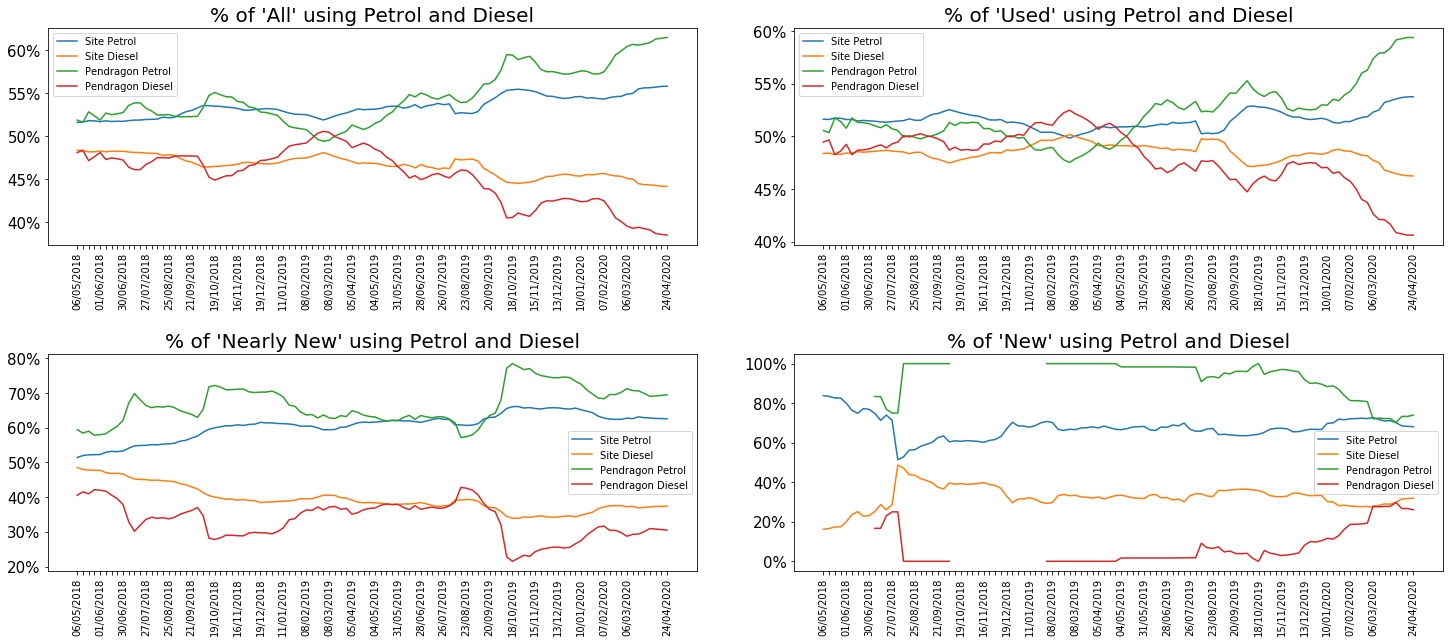

In [122]:
# 4 line charts showing % of Petrol vs Diesel for all, used, nearly new and new cars pendragon vs site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1=[]
y2=[]
chart_cols=['total_fuelPetrol','total_fuelDiesel','used_fuelPetrol','used_fuelDiesel',
           'nearlyNew_fuelPetrol','nearlyNew_fuelDiesel','new_fuelPetrol','new_fuelDiesel']
chart_cols_pendragon=['total_fuelPetrol_pendragon','total_fuelDiesel_pendragon','used_fuelPetrol_pendragon','used_fuelDiesel_pendragon',
           'nearlyNew_fuelPetrol_pendragon','nearlyNew_fuelDiesel_pendragon','new_fuelPetrol_pendragon','new_fuelDiesel_pendragon']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y1.append(df_summary[chart_cols[2*i]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y1.append(df_summary[chart_cols[(2*i)+1]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y2.append(df_summary[chart_cols_pendragon[2*i]]/(df_summary[chart_cols_pendragon[2*i]] + df_summary[chart_cols_pendragon[(2*i)+1]]))
    y2.append(df_summary[chart_cols_pendragon[(2*i)+1]]/(df_summary[chart_cols_pendragon[2*i]] + df_summary[chart_cols_pendragon[(2*i)+1]]))    
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' using Petrol and Diesel"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y1[2*i], label='Site Petrol')
    ax[int(i/2),i%2].plot(x, y1[(2*i)+1], label='Site Diesel')
    ax[int(i/2),i%2].plot(x, y2[2*i], label='Pendragon Petrol')
    ax[int(i/2),i%2].plot(x, y2[(2*i)+1], label='Pendragon Diesel')    
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on pendragon vs site fuel condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Fuel type Pendragon vs Site - % by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on pendragon vs site fuel condition.png')

plt.show()

In [123]:
# add columns for transmission type for pendragon all, used, nearly new and new

total_automatic_pendragon = []
total_manual_pendragon = []
new_automatic_pendragon = []
new_manual_pendragon = []
nearlyNew_automatic_pendragon = []
nearlyNew_manual_pendragon = []
used_automatic_pendragon = []
used_manual_pendragon = []

for i in range(len(df)):
    total_automatic_pendragon.append(df[i][(df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    total_manual_pendragon.append(df[i][(df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    new_automatic_pendragon.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    new_manual_pendragon.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    nearlyNew_automatic_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    nearlyNew_manual_pendragon.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    used_automatic_pendragon.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())
    used_manual_pendragon.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("halshaw|stratstone|car store|quickco|hornburg|pinewwod", case=False)))]['transmission'].count())

df_summary['total_automatic_pendragon'] = total_automatic_pendragon
df_summary['total_manual_pendragon'] = total_manual_pendragon
df_summary['used_automatic_pendragon'] = used_automatic_pendragon
df_summary['used_manual_pendragon'] = used_manual_pendragon
df_summary['nearlyNew_automatic_pendragon'] = nearlyNew_automatic_pendragon
df_summary['nearlyNew_manual_pendragon'] = nearlyNew_manual_pendragon
df_summary['new_automatic_pendragon'] = new_automatic_pendragon
df_summary['new_manual_pendragon'] = new_manual_pendragon


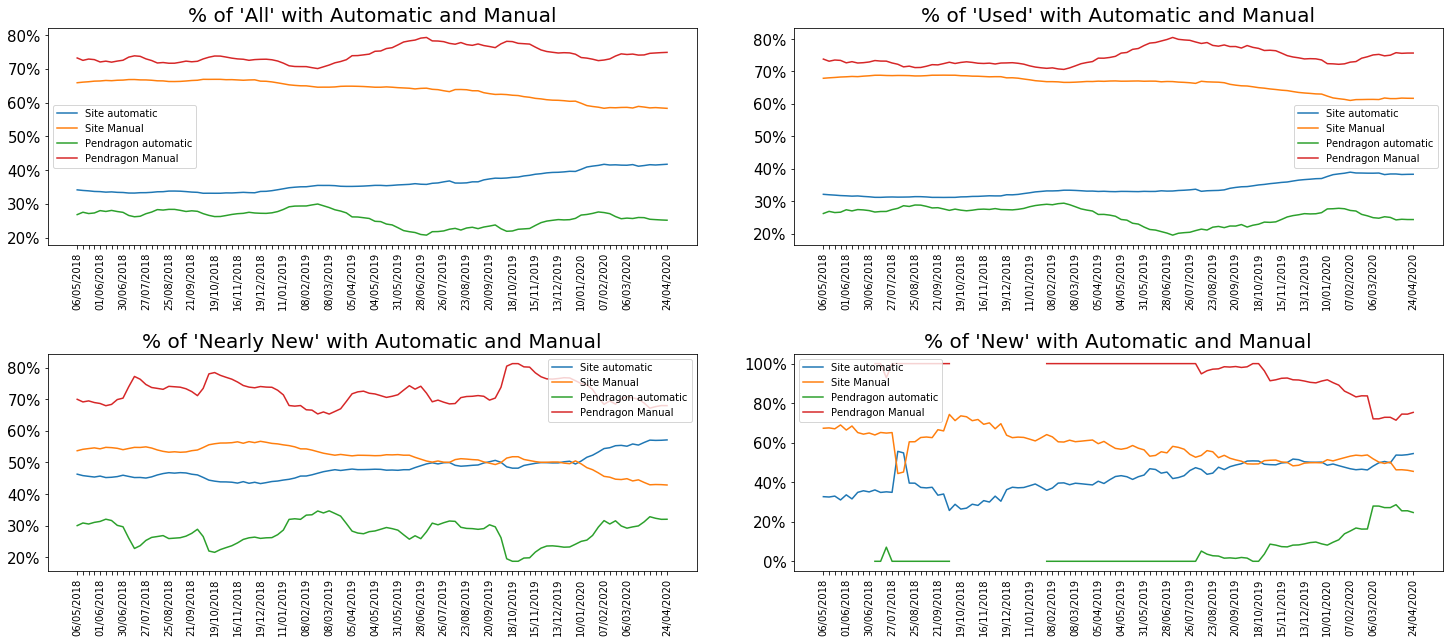

In [124]:
# 4 line charts showing % of Automatic vs Manual for all, used, nearly new and new cars pendragon vs site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1=[]
y2=[]
chart_cols=['total_automatic','total_manual','used_automatic','used_manual',
           'nearlyNew_automatic','nearlyNew_manual','new_automatic','new_manual']
chart_cols_pendragon=['total_automatic_pendragon','total_manual_pendragon','used_automatic_pendragon','used_manual_pendragon',
           'nearlyNew_automatic_pendragon','nearlyNew_manual_pendragon','new_automatic_pendragon','new_manual_pendragon']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y1.append(df_summary[chart_cols[2*i]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y1.append(df_summary[chart_cols[(2*i)+1]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y2.append(df_summary[chart_cols_pendragon[2*i]]/(df_summary[chart_cols_pendragon[2*i]] + df_summary[chart_cols_pendragon[(2*i)+1]]))
    y2.append(df_summary[chart_cols_pendragon[(2*i)+1]]/(df_summary[chart_cols_pendragon[2*i]] + df_summary[chart_cols_pendragon[(2*i)+1]]))    
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' with Automatic and Manual"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y1[2*i], label='Site automatic')
    ax[int(i/2),i%2].plot(x, y1[(2*i)+1], label='Site Manual')
    ax[int(i/2),i%2].plot(x, y2[2*i], label='Pendragon automatic')
    ax[int(i/2),i%2].plot(x, y2[(2*i)+1], label='Pendragon Manual')        
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on transmission by condition pendragon vs site.png', bbox_inches = 'tight')
    
    slideTitle.append('Transmission type - Pendragon vs Site % by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on transmission by condition pendragon vs site.png')

plt.show()

In [125]:
df_yoyData_pendragonUsedGone = yoy_dataframes('Pendragon Used gone')
df_yoyData_pendragonNearlyNewGone = yoy_dataframes('Pendragon Nearly New gone')

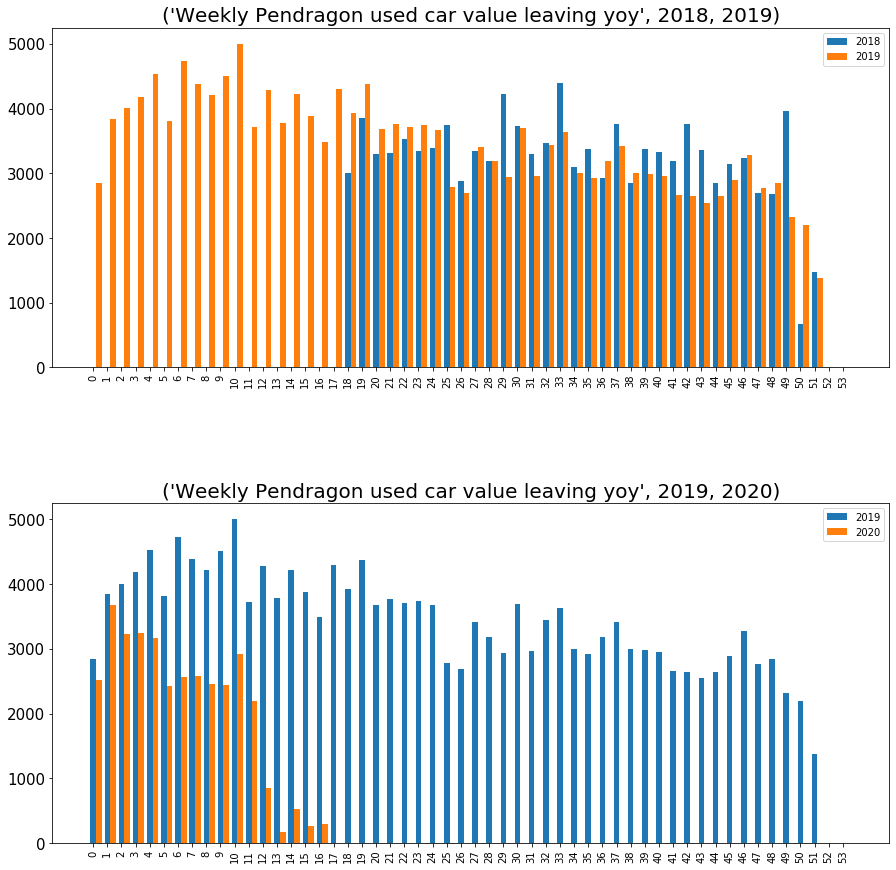

In [126]:
yoy_dataframes_charts(df_yoyData_pendragonUsedGone, 'Weekly Pendragon used car value leaving yoy', 'Auto Trader - Pendragon weekly used car value leaving yoy.png','','')

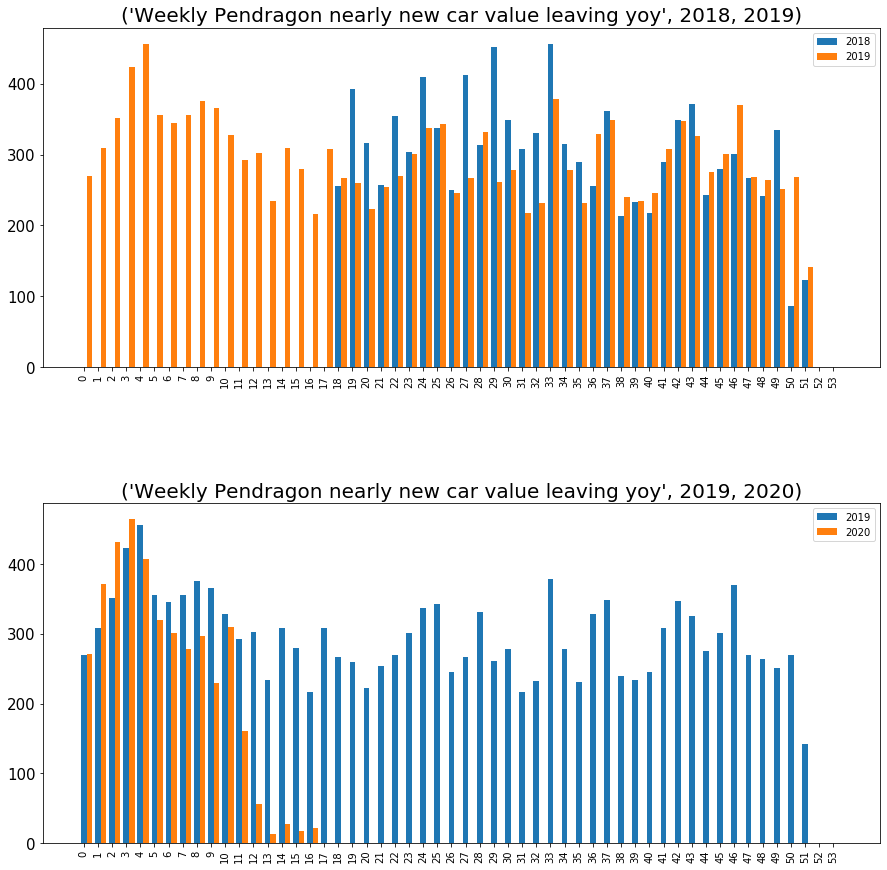

In [127]:
yoy_dataframes_charts(df_yoyData_pendragonNearlyNewGone, 'Weekly Pendragon nearly new car value leaving yoy', 'Auto Trader - Pendragon weekly nearly new car value leaving yoy.png','','')

In [128]:
#
# Exploring Lookers data
# brands are charles hurst|taggarts|lookers
#

In [129]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Lookers Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [130]:
lookersVolume_New = []
lookersVolume_NearlyNew = []
lookersVolume_Used = []

for i in range(len(df)):
    lookersVolume_New.append(df[i][(df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i]['condition'] == 'New')]['name'].count())
    lookersVolume_NearlyNew.append(df[i][(df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i]['condition'] == 'Nearly New')]['name'].count())
    lookersVolume_Used.append(df[i][(df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i]['condition'] == 'Used')]['name'].count())
    
df_summary['lookers New'] = lookersVolume_New
df_summary['lookers Nearly New'] = lookersVolume_NearlyNew
df_summary['lookers Used'] = lookersVolume_Used
df_summary['lookers total'] = df_summary['lookers New'] + df_summary['lookers Nearly New'] + df_summary['lookers Used']

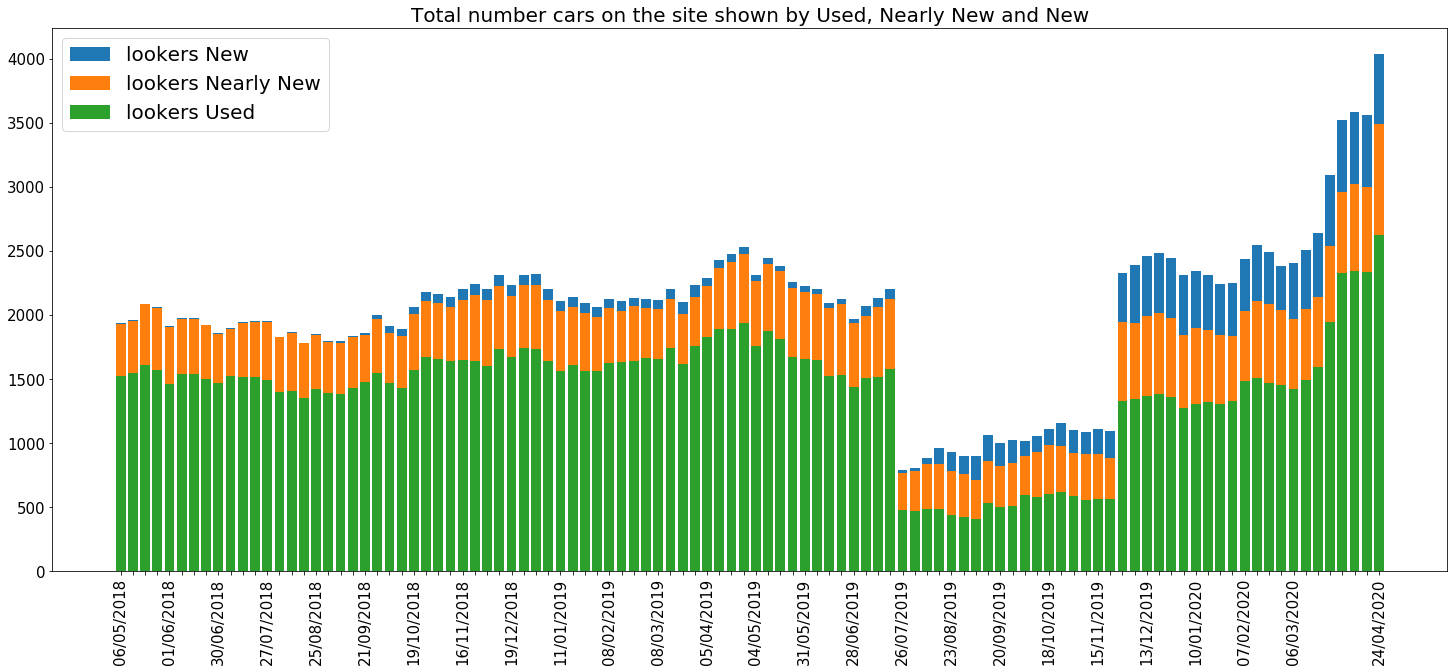

In [131]:
# 1 bar chart showing lookers cars broken down by used, nearly new and new

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary.index.values

labels = list(df_summary['Date'])

for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

chart_cols=['lookers Used','lookers Nearly New','lookers New']
cum_sum = [0]*len(df_summary)
y = [0]*len(chart_cols)

for i in range(0,len(chart_cols)):
    cum_sum = cum_sum + df_summary[chart_cols[i]]
    y[i] = cum_sum

ax.set_title('Total number cars on the site shown by Used, Nearly New and New', fontsize=20)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_xticks(x)
ax.yaxis.set_tick_params(labelsize=15)


for i in range(len(chart_cols)-1,-1,-1):
    ax.bar(x, y[i], label = chart_cols[i])

ax.legend(fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - bar chart of lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('lookers cars on the site by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - bar chart of lookers cars on site.png')

plt.show()


In [132]:
price_change_total_lookers = [0]
price_change_nearlyNew_lookers = [0]
price_change_used_lookers = [0]

for i in range(1,len(df)):
    price_total1_lookers = df[i][(df[i]['veh_id'].isin(df[i-1]['veh_id'])) & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['price'].sum()
    price_total0_lookers = df[i-1][(df[i-1]['veh_id'].isin(df[i]['veh_id'])) & ((df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['price'].sum()
    price_nearlyNew1_lookers = df[i][(df[i]['veh_id'].isin(df[i-1]['veh_id'])) & (df[i]['condition'] == 'Nearly New')  & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['price'].sum()
    price_nearlyNew0_lookers = df[i-1][(df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['condition'] == 'Nearly New') & ((df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['price'].sum()
    price_used1_lookers = df[i][(df[i]['veh_id'].isin(df[i-1]['veh_id'])) & (df[i]['condition'] == 'Used') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['price'].sum()
    price_used0_lookers = df[i-1][(df[i-1]['veh_id'].isin(df[i]['veh_id'])) & (df[i-1]['condition'] == 'Used') & ((df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['price'].sum()

    price_change_total_lookers.append((price_total1_lookers - price_total0_lookers)/price_total0_lookers)
    price_change_nearlyNew_lookers.append((price_nearlyNew1_lookers - price_nearlyNew0_lookers)/price_nearlyNew0_lookers)
    price_change_used_lookers.append((price_used1_lookers - price_used0_lookers)/price_used0_lookers)
    
df_summary['price change total lookers'] = price_change_total_lookers
df_summary['price change nearly new lookers'] = price_change_nearlyNew_lookers
df_summary['price change used lookers'] = price_change_used_lookers

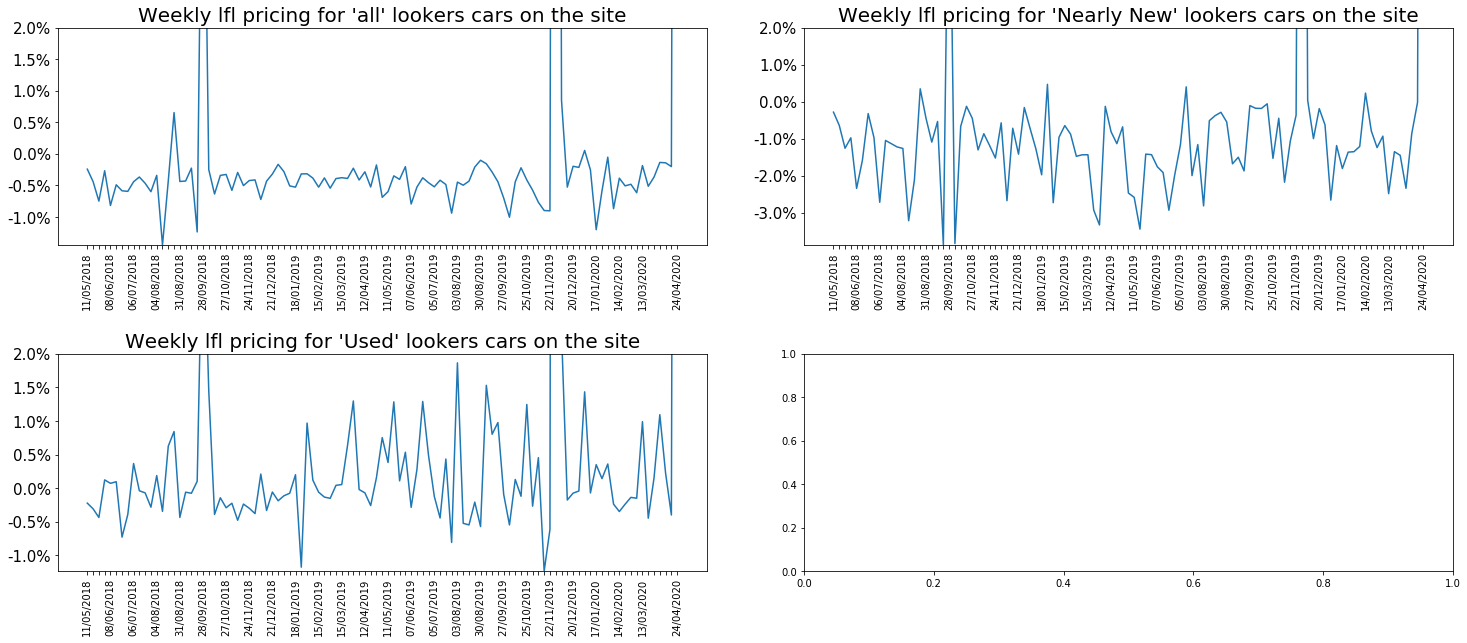

In [133]:
# plot 4 chart showing weekly lfl pricing of lookers cars remaining on the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('weekly lfl pricing for lookers cars remaining on the site\n(y-axis scaled differently for each chart)', fontsize = 20)


x = df_summary['Date'][1:]

labels = list(df_summary['Date'][1:])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['price change total lookers','price change nearly new lookers','price change used lookers']
chart_titles=['all', 'Nearly New','Used']

for i in range(3):
    y.append(df_summary[chart_cols[i]][1:])
    ax[int(i/2),i%2].set_title(str("Weekly lfl pricing for '") + chart_titles[i] + str("' lookers cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=1))
    ax[int(i/2),i%2].set_ylim(top = 0.02, bottom= min(y[i]))
    ax[int(i/2),i%2].plot(x, y[i])

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - lookers weekly lfl price change by condition.png', bbox_inches = 'tight')

    slideTitle.append('Weekly lfl price change for lookers cars remaining on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - lookers weekly lfl price change by condition.png')   
    
plt.show()

In [134]:
# calculation the % of lookers sales each week
   
leave_lookers_New = [0]
leave_lookers_NearlyNew = [0]
leave_lookers_Used = [0]

for i in range(1,len(df)):
    leave_lookers_New.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i-1]['condition'] == 'New')]['name'].count())
    leave_lookers_NearlyNew.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i-1]['condition'] == 'Nearly New')]['name'].count())
    leave_lookers_Used.append(df[i-1][(~df[i-1]['veh_id'].isin(df[i]['veh_id'].values)) & (df[i-1]['name'].str.contains("charles hurst|taggarts|lookers", case=False)) & (df[i-1]['condition'] == 'Used')]['name'].count())

df_summary['lookers New gone'] = leave_lookers_New
df_summary['lookers Nearly New gone'] = leave_lookers_NearlyNew
df_summary['lookers Used gone'] = leave_lookers_Used   

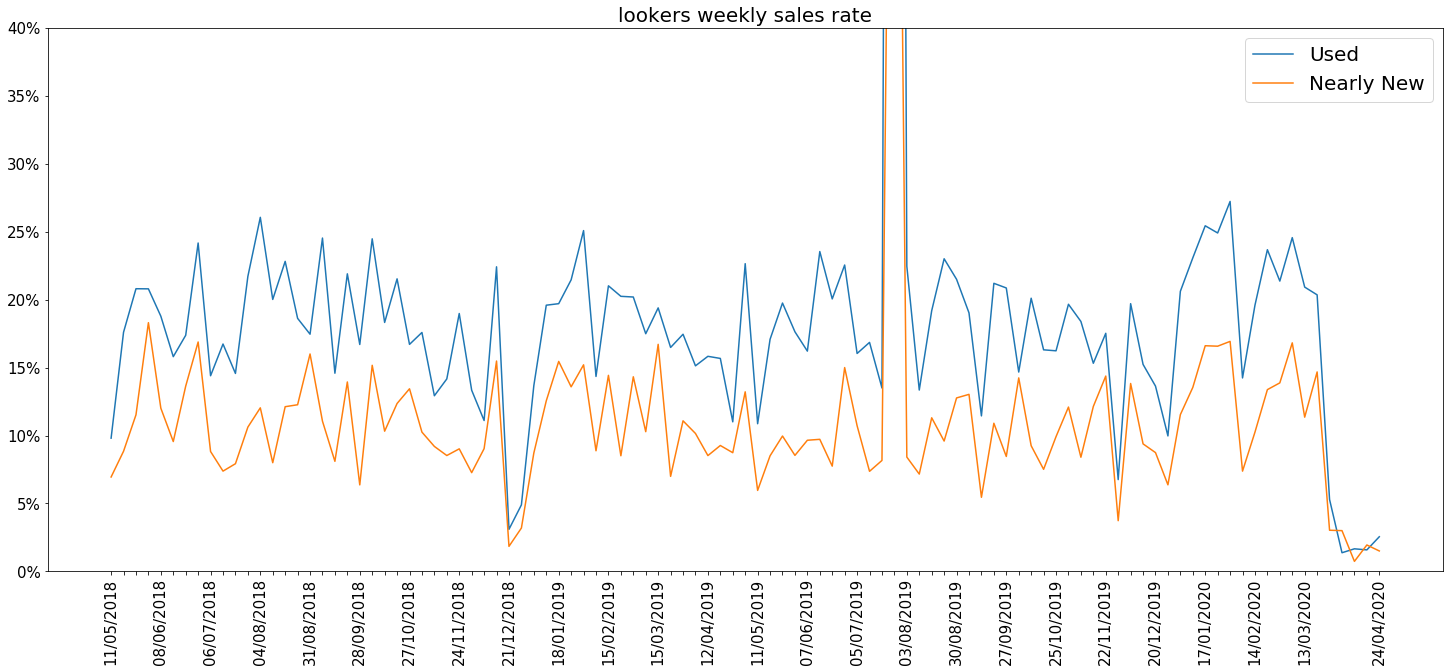

In [135]:
# plot 1 chart showing lookers sales rate

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date'][1:]

#prevent x-axis labels from overlapping by printing first, every 5 and last label only
labels = list(df_summary['Date'][1:])
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['lookers Used gone'][1:] / df_summary['lookers Used'][1:]
y2 = df_summary['lookers Nearly New gone'][1:] / df_summary['lookers Nearly New'][1:]
#y3 = df_summary['lookers New gone'] / df_summary['lookers New']
#ax.set_xticks(x)
ax.set_title('lookers weekly sales rate', fontsize=20)
ax.set_xticklabels(labels, rotation = 90, fontsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
ax.set_ylim(top = 0.4)
ax.plot(x, y1, label = 'Used')
ax.plot(x, y2, label = 'Nearly New')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - lookers pct leaving.png', bbox_inches = 'tight')

    slideTitle.append('lookers weekly sales rate')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - lookers pct leaving.png')   
    
plt.show()

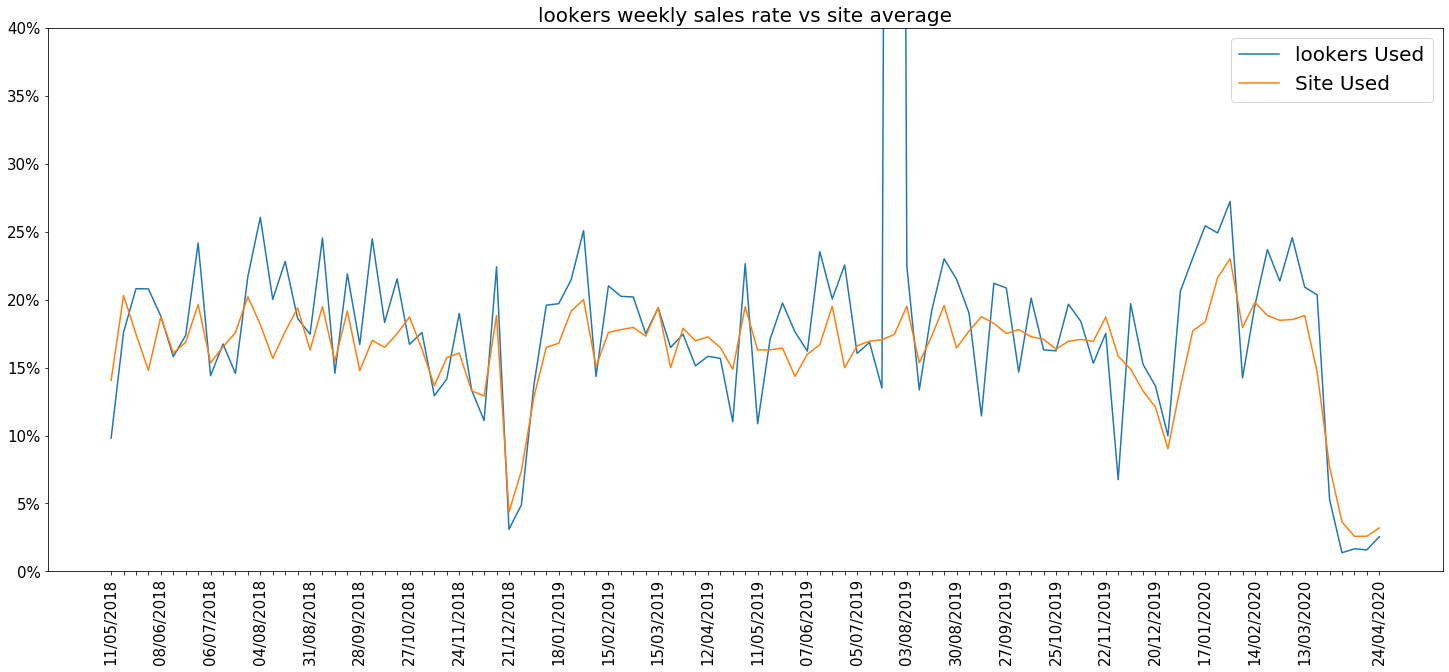

In [136]:
# plot 1 chart showing lookers used car sales rate vs site sales rate

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date'][1:]

#prevent x-axis labels from overlapping by printing first, every 5 and last label only
labels = list(df_summary['Date'][1:])
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['lookers Used gone'][1:] / df_summary['lookers Used'][1:]
y2 = df_summary['% used gone'][1:]
#y3 = df_summary['lookers New gone'] / df_summary['lookers New']
#ax.set_xticks(x)
ax.set_title('lookers weekly sales rate vs site average', fontsize=20)
ax.set_xticklabels(labels, rotation = 90, fontsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
ax.set_ylim(top = 0.4)
ax.plot(x, y1, label = 'lookers Used')
ax.plot(x, y2, label = 'Site Used')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - lookers pct leaving vs average.png', bbox_inches = 'tight')

    slideTitle.append('lookers weekly sales rate vs site average')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - lookers pct leaving vs average.png')   
    
plt.show()

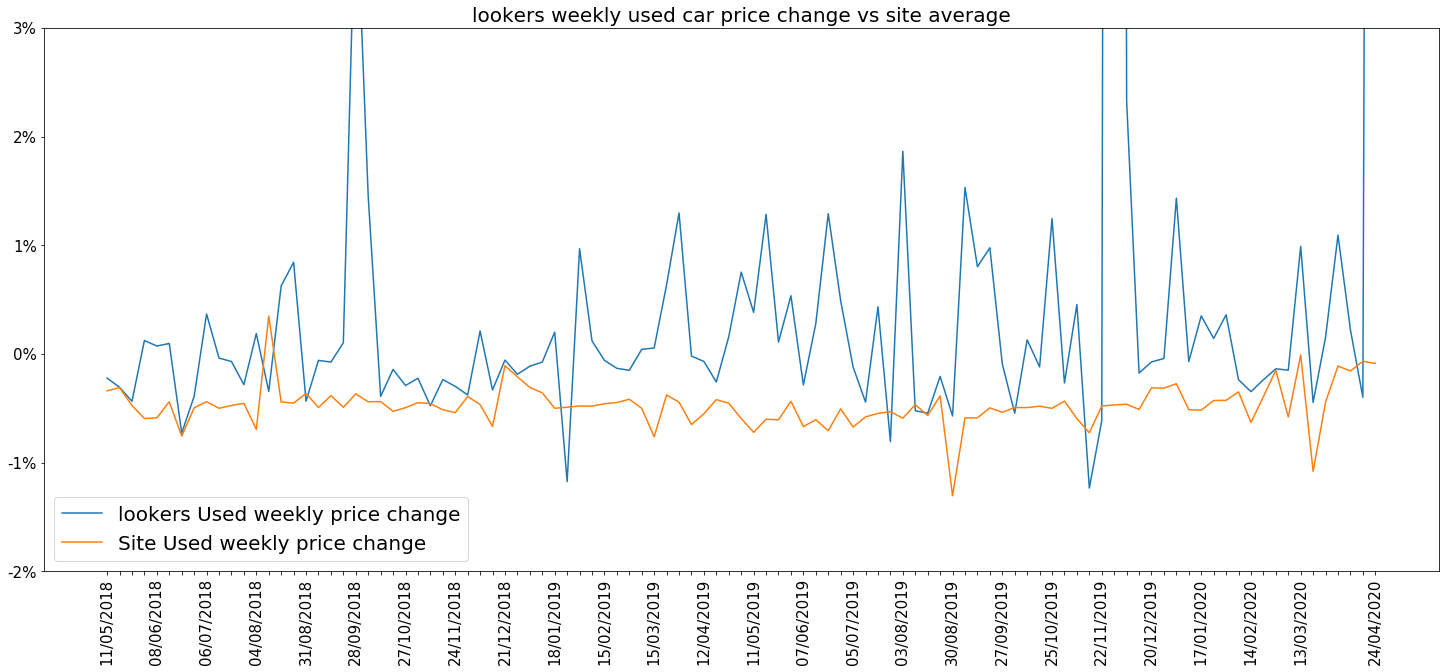

In [137]:
# plot 1 chart showing weekly lfl pricing of lookers cars remaining on the site vs site average

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date'][1:]

#prevent x-axis labels from overlapping by printing first, every 5 and last label only
labels = list(df_summary['Date'][1:])
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1 = df_summary['price change used lookers'][1:]
y2 = df_summary['price change used'][1:]
#y3 = df_summary['lookers New gone'] / df_summary['lookers New']
#ax.set_xticks(x)
ax.set_title('lookers weekly used car price change vs site average', fontsize=20)
ax.set_xticklabels(labels, rotation = 90, fontsize = 15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
ax.set_ylim(top = 0.03, bottom = -0.02)
ax.plot(x, y1, label = 'lookers Used weekly price change')
ax.plot(x, y2, label = 'Site Used weekly price change')
#ax.plot(x, y3, label = 'New')
ax.legend(fontsize = 20)

# presentation slide data
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - lookers weekly lfl price change by condition.png', bbox_inches = 'tight')

    slideTitle.append('Weekly lfl price change for lookers cars remaining on the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - lookers weekly lfl price change by condition.png')   
    
plt.show()

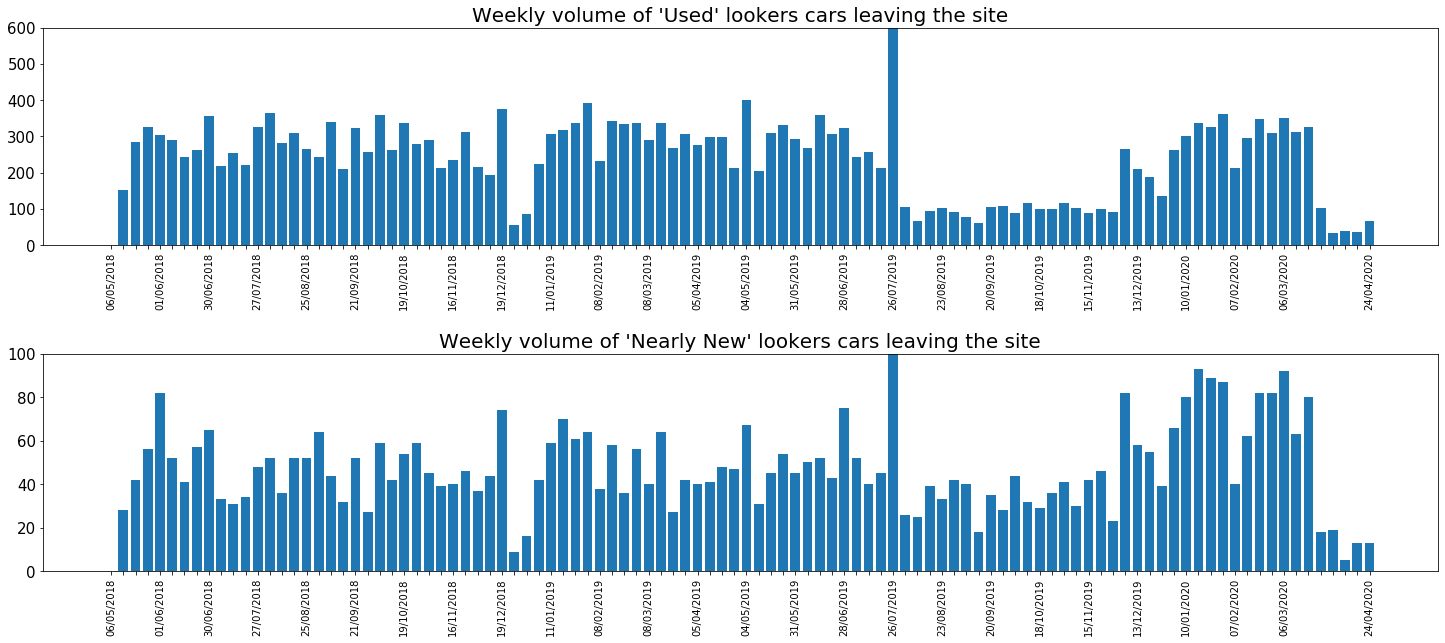

In [138]:
# 2 bar charts showing volume of all lookers cars, used cars, nearly new cars, new cars leaving the site

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y=[]
chart_cols=['lookers Used gone','lookers Nearly New gone']
chart_titles=['Used','Nearly New']

for i in range(2):
    y.append(df_summary[chart_cols[i]])
    ax[i].set_title(str("Weekly volume of '") + chart_titles[i] + str("' lookers cars leaving the site"), fontsize=20)
    ax[i].set_xticklabels(labels, rotation = 90)
    ax[i].yaxis.set_tick_params(labelsize=15)
    ax[0].set_ylim(top = 600)
    ax[1].set_ylim(top = 100)
    #ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[i].bar(x, y[i])

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 2 charts volume leaving lookers.png', bbox_inches = 'tight')
    
    slideTitle.append('Weekly volume of lookers cars leaving the site')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 2 charts volume leaving lookers.png')

plt.show()

In [139]:
# add in columns for number of lookers videos and total images

hasVideo_lookers = []
totalImages_lookers = []
new_hasVideo_lookers = []
new_totalImages_lookers = []
nearlyNew_hasVideo_lookers = []
nearlyNew_totalImages_lookers = []
used_hasVideo_lookers = []
used_totalImages_lookers = []

for i in range(len(df)):
    hasVideo_lookers.append(df[i][(df[i]['hasVideo'] == True) \
                                    & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                              ['cars'].count())
    totalImages_lookers.append(df[i][((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False, na=False)))]\
                                 ['totalImages'].sum())
    new_hasVideo_lookers.append(df[i][(df[i]['condition'] == 'New') & (df[i]['hasVideo'] == True) \
                                        & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                                  ['cars'].count())
    new_totalImages_lookers.append(df[i][(df[i]['condition'] == 'New') \
                                           & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                                     ['totalImages'].sum())
    nearlyNew_hasVideo_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['hasVideo'] == True) \
                                              & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                                        ['cars'].count())
    nearlyNew_totalImages_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') \
                                                 & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                                           ['totalImages'].sum())    
    used_hasVideo_lookers.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['hasVideo'] == True) \
                                         & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                                   ['cars'].count())
    used_totalImages_lookers.append(df[i][(df[i]['condition'] == 'Used') \
                                            & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]\
                                      ['totalImages'].sum())
    
df_summary['total_hasVideo_lookers'] = hasVideo_lookers
df_summary['totalImages_lookers'] = totalImages_lookers
df_summary['used_hasVideo_lookers'] = used_hasVideo_lookers
df_summary['usedImages_lookers'] = used_totalImages_lookers
df_summary['nearlyNew_hasVideo_lookers'] = nearlyNew_hasVideo_lookers
df_summary['nearlyNewImages_lookers'] = nearlyNew_totalImages_lookers
df_summary['new_hasVideo_lookers'] = new_hasVideo_lookers
df_summary['newImages_lookers'] = new_totalImages_lookers

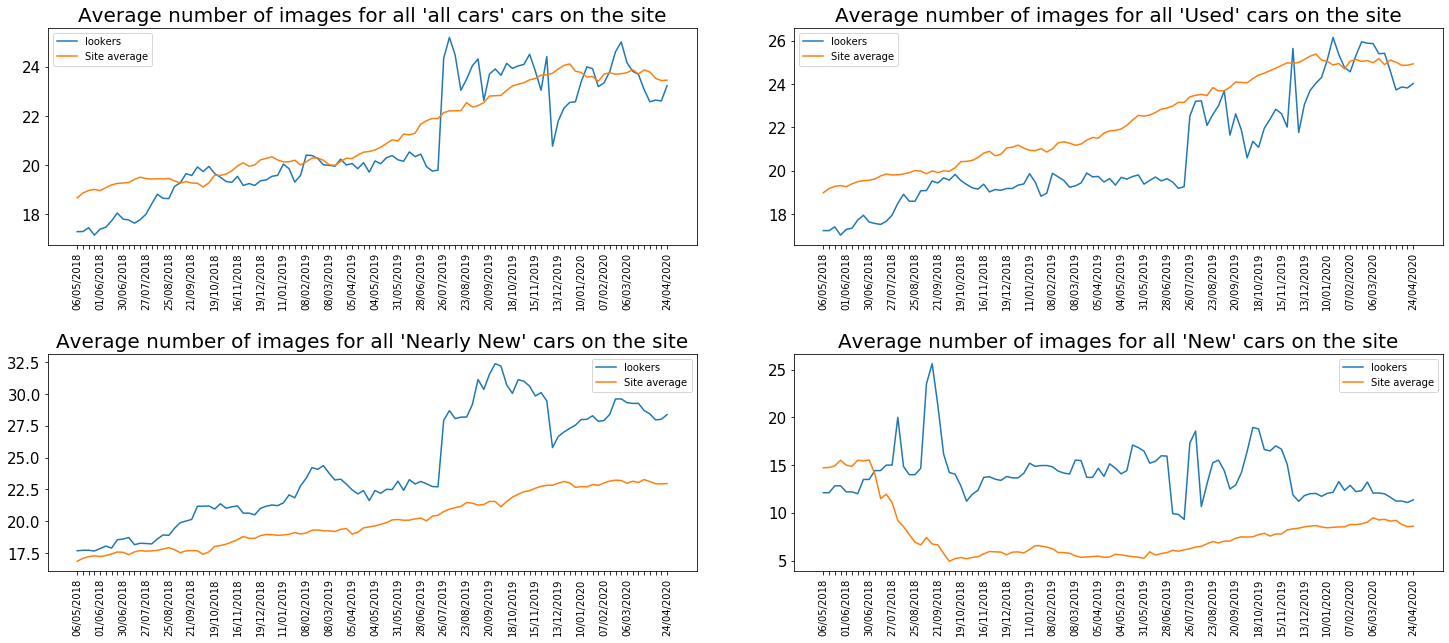

In [140]:
# 4 bar charts showing lookers average number of images for all, used, nearly new and new cars on the site
# vs the site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1=[]
y2=[]
chart_cols=['totalImages_lookers','usedImages_lookers','nearlyNewImages_lookers','newImages_lookers']
chart_cols_site=['totalImages','usedImages','nearlyNewImages','newImages']
chart_titles=['all cars','Used','Nearly New','New']
chart_cols_1=['lookers total','lookers Used','lookers Nearly New','lookers New']
chart_cols_site_1=['Total Cars','Used','Nearly New','New']

for i in range(4):
    y1.append(df_summary[chart_cols[i]]/df_summary[chart_cols_1[i]])
    y2.append(df_summary[chart_cols_site[i]]/df_summary[chart_cols_site_1[i]])
    ax[int(i/2),i%2].set_title(str("Average number of images for all '") + chart_titles[i] + str("' cars on the site"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].plot(x, y1[i], label = 'lookers')
    ax[int(i/2),i%2].plot(x, y2[i], label = 'Site average')
    ax[int(i/2),i%2].legend()

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts lookers average images vs site.png', bbox_inches = 'tight')
    
    slideTitle.append('Average Number of images per lookers vs site cars by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts lookers average images vs site.png')

plt.show()

In [141]:
# add columns for fuel type for new, nearly new and used cars

total_fuelPetrol_lookers = []
total_fuelDiesel_lookers = []
total_fuelElectric_lookers = []
new_fuelPetrol_lookers = []
new_fuelDiesel_lookers = []
new_fuelElectric_lookers = []
nearlyNew_fuelPetrol_lookers = []
nearlyNew_fuelDiesel_lookers = []
nearlyNew_fuelElectric_lookers = []
used_fuelPetrol_lookers = []
used_fuelDiesel_lookers = []
used_fuelElectric_lookers = []

for i in range(len(df)):
    total_fuelPetrol_lookers.append(df[i][(df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    total_fuelDiesel_lookers.append(df[i][(df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    total_fuelElectric_lookers.append(df[i][(df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    new_fuelPetrol_lookers.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    new_fuelDiesel_lookers.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    new_fuelElectric_lookers.append(df[i][(df[i]['condition'] == 'New') & (df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    nearlyNew_fuelPetrol_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    nearlyNew_fuelDiesel_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    nearlyNew_fuelElectric_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())    
    used_fuelPetrol_lookers.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Petrol') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    used_fuelDiesel_lookers.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Diesel') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())
    used_fuelElectric_lookers.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['fuel'] == 'Electric') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['fuel'].count())    

df_summary['total_fuelPetrol_lookers'] = total_fuelPetrol_lookers
df_summary['total_fuelDiesel_lookers'] = total_fuelDiesel_lookers
df_summary['total_fuelElectric_lookers'] = total_fuelElectric_lookers
df_summary['used_fuelPetrol_lookers'] = used_fuelPetrol_lookers
df_summary['used_fuelDiesel_lookers'] = used_fuelDiesel_lookers
df_summary['used_fuelElectric_lookers'] = used_fuelElectric_lookers
df_summary['nearlyNew_fuelPetrol_lookers'] = nearlyNew_fuelPetrol_lookers
df_summary['nearlyNew_fuelDiesel_lookers'] = nearlyNew_fuelDiesel_lookers
df_summary['nearlyNew_fuelElectric_lookers'] = nearlyNew_fuelElectric_lookers
df_summary['new_fuelPetrol_lookers'] = new_fuelPetrol_lookers
df_summary['new_fuelDiesel_lookers'] = new_fuelDiesel_lookers
df_summary['new_fuelElectric_lookers'] = new_fuelElectric_lookers


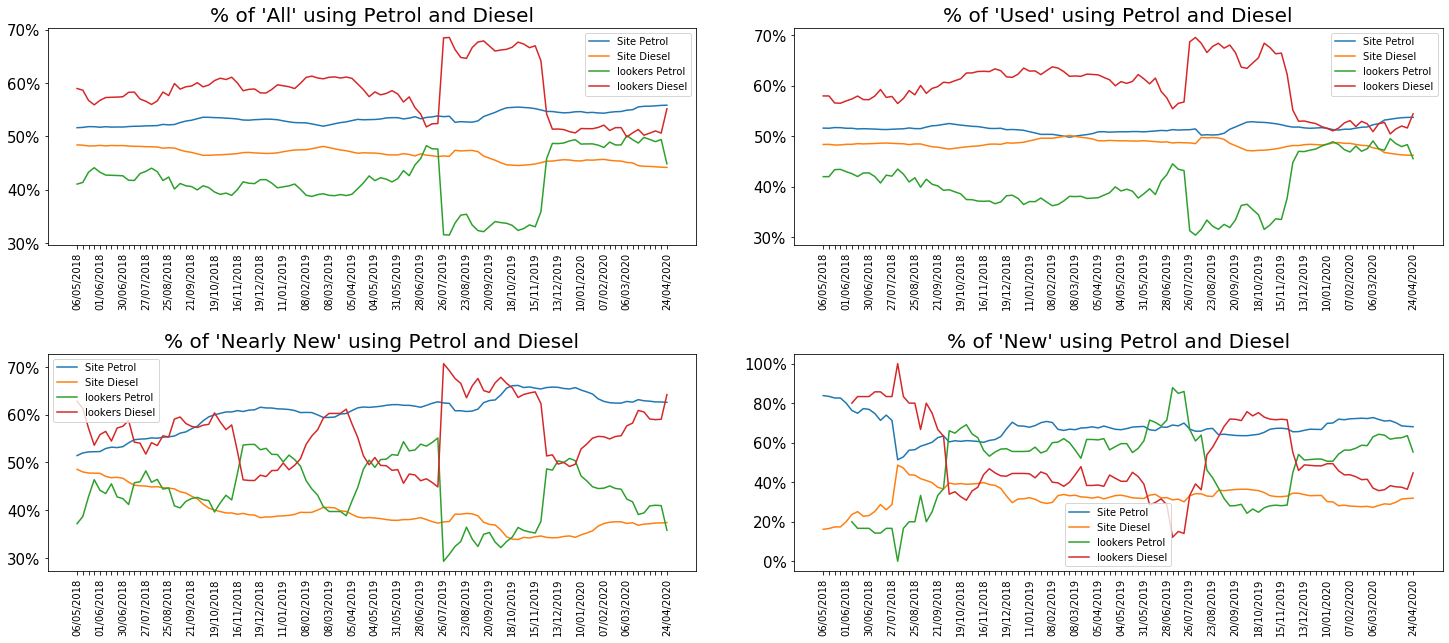

In [142]:
# 4 line charts showing % of Petrol vs Diesel for all, used, nearly new and new cars lookers vs site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1=[]
y2=[]
chart_cols=['total_fuelPetrol','total_fuelDiesel','used_fuelPetrol','used_fuelDiesel',
           'nearlyNew_fuelPetrol','nearlyNew_fuelDiesel','new_fuelPetrol','new_fuelDiesel']
chart_cols_lookers=['total_fuelPetrol_lookers','total_fuelDiesel_lookers','used_fuelPetrol_lookers','used_fuelDiesel_lookers',
           'nearlyNew_fuelPetrol_lookers','nearlyNew_fuelDiesel_lookers','new_fuelPetrol_lookers','new_fuelDiesel_lookers']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y1.append(df_summary[chart_cols[2*i]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y1.append(df_summary[chart_cols[(2*i)+1]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y2.append(df_summary[chart_cols_lookers[2*i]]/(df_summary[chart_cols_lookers[2*i]] + df_summary[chart_cols_lookers[(2*i)+1]]))
    y2.append(df_summary[chart_cols_lookers[(2*i)+1]]/(df_summary[chart_cols_lookers[2*i]] + df_summary[chart_cols_lookers[(2*i)+1]]))    
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' using Petrol and Diesel"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y1[2*i], label='Site Petrol')
    ax[int(i/2),i%2].plot(x, y1[(2*i)+1], label='Site Diesel')
    ax[int(i/2),i%2].plot(x, y2[2*i], label='lookers Petrol')
    ax[int(i/2),i%2].plot(x, y2[(2*i)+1], label='lookers Diesel')    
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on lookers vs site fuel condition.png', bbox_inches = 'tight')
    
    slideTitle.append('Fuel type lookers vs Site - % by Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on lookers vs site fuel condition.png')

plt.show()

In [143]:
# add columns for transmission type for lookers all, used, nearly new and new

total_automatic_lookers = []
total_manual_lookers = []
new_automatic_lookers = []
new_manual_lookers = []
nearlyNew_automatic_lookers = []
nearlyNew_manual_lookers = []
used_automatic_lookers = []
used_manual_lookers = []

for i in range(len(df)):
    total_automatic_lookers.append(df[i][(df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    total_manual_lookers.append(df[i][(df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    new_automatic_lookers.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    new_manual_lookers.append(df[i][(df[i]['condition'] == 'New') & (df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    nearlyNew_automatic_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    nearlyNew_manual_lookers.append(df[i][(df[i]['condition'] == 'Nearly New') & (df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    used_automatic_lookers.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Automatic') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())
    used_manual_lookers.append(df[i][(df[i]['condition'] == 'Used') & (df[i]['transmission'] == 'Manual') & ((df[i]['name'].str.contains("charles hurst|taggarts|lookers", case=False)))]['transmission'].count())

df_summary['total_automatic_lookers'] = total_automatic_lookers
df_summary['total_manual_lookers'] = total_manual_lookers
df_summary['used_automatic_lookers'] = used_automatic_lookers
df_summary['used_manual_lookers'] = used_manual_lookers
df_summary['nearlyNew_automatic_lookers'] = nearlyNew_automatic_lookers
df_summary['nearlyNew_manual_lookers'] = nearlyNew_manual_lookers
df_summary['new_automatic_lookers'] = new_automatic_lookers
df_summary['new_manual_lookers'] = new_manual_lookers


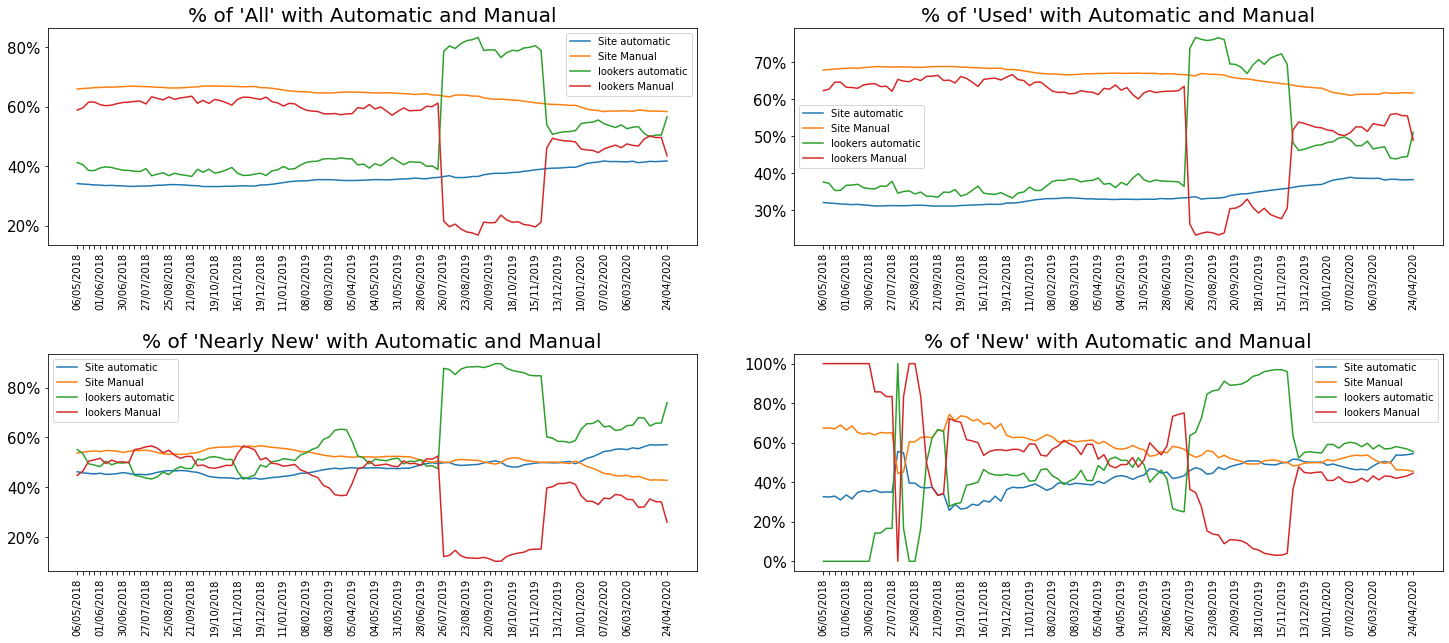

In [144]:
# 4 line charts showing % of Automatic vs Manual for all, used, nearly new and new cars lookers vs site

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.15)
#plt.suptitle('Charts showing Total Cars and then split by New, Nearly New and Used\n(watch the y-axis!!)', fontsize = 20)

x = df_summary['Date']

labels = list(df_summary['Date'])

# prevent x-axis labels from overlapping by printing every nth label
for i in range(4,len(labels),4):
    labels[i-1], labels[i-2], labels[i-3]='','',''

labels[len(labels)-1]=list(df_summary['Date'])[-1]
labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

y1=[]
y2=[]
chart_cols=['total_automatic','total_manual','used_automatic','used_manual',
           'nearlyNew_automatic','nearlyNew_manual','new_automatic','new_manual']
chart_cols_lookers=['total_automatic_lookers','total_manual_lookers','used_automatic_lookers','used_manual_lookers',
           'nearlyNew_automatic_lookers','nearlyNew_manual_lookers','new_automatic_lookers','new_manual_lookers']
chart_titles=['All','Used','Nearly New','New']

for i in range(4):
    y1.append(df_summary[chart_cols[2*i]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y1.append(df_summary[chart_cols[(2*i)+1]]/(df_summary[chart_cols[2*i]] + df_summary[chart_cols[(2*i)+1]]))
    y2.append(df_summary[chart_cols_lookers[2*i]]/(df_summary[chart_cols_lookers[2*i]] + df_summary[chart_cols_lookers[(2*i)+1]]))
    y2.append(df_summary[chart_cols_lookers[(2*i)+1]]/(df_summary[chart_cols_lookers[2*i]] + df_summary[chart_cols_lookers[(2*i)+1]]))    
    ax[int(i/2),i%2].set_title(str("% of '") + chart_titles[i] + str("' with Automatic and Manual"), fontsize=20)
    ax[int(i/2),i%2].set_xticklabels(labels, rotation = 90)
    ax[int(i/2),i%2].yaxis.set_tick_params(labelsize=15)
    ax[int(i/2),i%2].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[int(i/2),i%2].plot(x, y1[2*i], label='Site automatic')
    ax[int(i/2),i%2].plot(x, y1[(2*i)+1], label='Site Manual')
    ax[int(i/2),i%2].plot(x, y2[2*i], label='lookers automatic')
    ax[int(i/2),i%2].plot(x, y2[(2*i)+1], label='lookers Manual')        
    ax[int(i/2),i%2].legend()
    
if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Auto Trader - 4 charts on transmission by condition lookers vs site.png', bbox_inches = 'tight')
    
    slideTitle.append('Transmission type - lookers vs Site % by All, Used, Nearly New and New')
    slideText.append('May 2018 to '+ str(monthNow))
    imagePath.append('Auto Trader - 4 charts on transmission by condition lookers vs site.png')

plt.show()

In [145]:
df_yoyData_lookersUsedGone = yoy_dataframes('lookers Used gone')
df_yoyData_lookersNearlyNewGone = yoy_dataframes('lookers Nearly New gone')

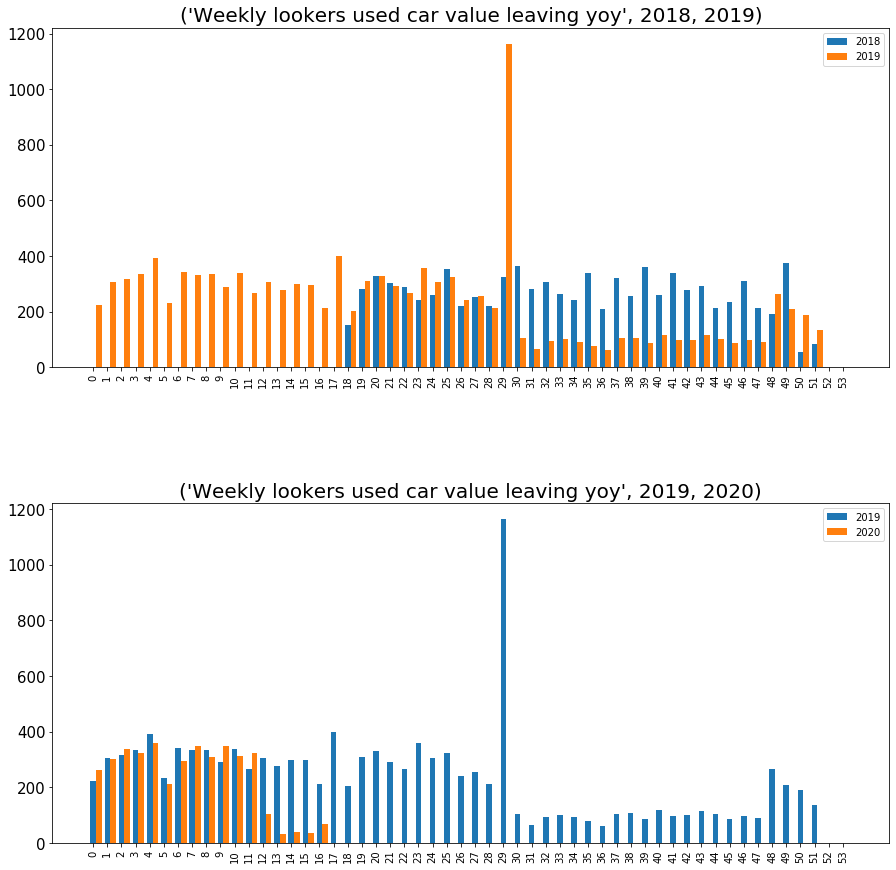

In [146]:
yoy_dataframes_charts(df_yoyData_lookersUsedGone, 'Weekly lookers used car value leaving yoy', 'Auto Trader - lookers weekly used car value leaving yoy.png','','')

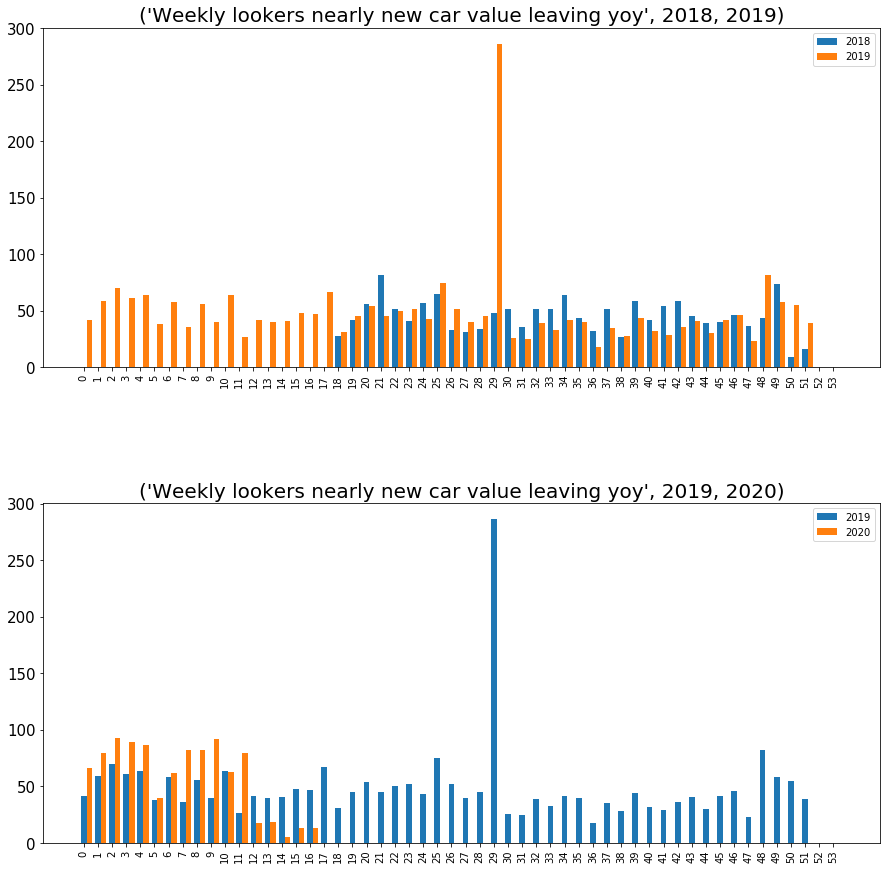

In [147]:
yoy_dataframes_charts(df_yoyData_lookersNearlyNewGone, 'Weekly lookers nearly new car value leaving yoy', 'Auto Trader - lookers weekly nearly new car value leaving yoy.png','','')

In [148]:
df_summary.head()

Date  Total Cars  New  Nearly New    Used  forecourts_total  \
0  06/05/2018      419905  505       59610  359790             12703   
1  11/05/2018      425506  542       60671  364293             12736   
2  19/05/2018      430633  572       61771  368290             12736   
3  26/05/2018      437824  597       62012  375215             12778   
4  01/06/2018      433471  580       60343  372548             12768   

   forecourts_used  forecourts_nearlyNew  forecourts_new   total_value  \
0            12624                  4683             155  5.982719e+09   
1            12653                  4709             158  6.042379e+09   
2            12659                  4746             161  6.111748e+09   
3            12713                  4747             164  6.182262e+09   
4            12707                  4717             171  6.095134e+09   

     total_used  total_nearlyNew   total_new  avePrice_total  avePrice_used  \
0  4.446430e+09     1.519127e+09  17162221.0    14248.403006   12359.021436   
1  4.485590e+09     1.539106e+09  17683004.0    14200.856769   12313.510934   
2  4.530266e+09     1.562621e+09  18861170.0    14192.869955   12301.179508   
3  4.593843e+09     1.569127e+09  19292173.0    14120.718173   12243.488661   
4  4.541042e+09     1.535099e+09  18993289.0    14061.226571   12189.144846   

   avePrice_nearlyNew  avePrice_new  total_hasVideo  totalImages  \
0        25484.434021  33984.596040           66068      7841570   
1        25368.484523  32625.468635           67758      8028698   
2        25297.403189  32974.073427           70423      8170129   
3        25304.017094  32315.197655           71198      8326265   
4        25439.555872  32747.050000           70863      8222972   

   used_hasVideo  usedImages  nearlyNew_hasVideo  nearlyNewImages  \
0          51237     6829672               14675          1004464   
1          52448     6983967               15144          1036735   
2          54133     7098173               16102          1063421   
3          55269     7245280               15733          1071728   
4          55161     7174949               15525          1039326   

   new_hasVideo  newImages  total_fuelPetrol  total_fuelDiesel  \
0           156       7434            207849            194890   
1           166       7996            211024            197418   
2           188       8535            214062            199097   
3           196       9257            217526            202436   
4           177       8697            214914            200805   

   total_fuelElectric  used_fuelPetrol  used_fuelDiesel  used_fuelElectric  \
0                   8           179105           167864                  5   
1                   7           181398           170171                  5   
2                   7           183812           171516                  6   
3                   8           187134           174762                  7   
4                   6           185332           173906                  5   

   nearlyNew_fuelPetrol  nearlyNew_fuelDiesel  nearlyNew_fuelElectric  \
0                 28599                 26998                       3   
1                 29470                 27216                       2   
2                 30098                 27549                       1   
3                 30240                 27642                       1   
4                 29426                 26860                       1   

   new_fuelPetrol  new_fuelDiesel  new_fuelElectric  total_automatic  \
0             145              28                 0           142390   
1             156              31                 0           143555   
2             152              32                 0           144682   
3             152              32                 0           146309   
4             156              39                 0           144626   

   total_manual  used_automatic  used_manual  nearlyNew_automatic  \
0        274893          

In [157]:
#
# Preparing the presentation
#

In [158]:
if PwrptPrep == 1:
    prs = Presentation('Presentation - template.pptx')

In [159]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    listShapes = [1,2,0]

    for i in range(3):
        slide = prs.slides[0]
        shape = slide.shapes[listShapes[i]]
        text_frame = shape.text_frame
        text_frame.paragraphs[0].runs[0].text = presentationTitle[i]

In [160]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Preamble', 'Summary']

    for i in range(2):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = 1
        
        if i == 0:
            p.text = 'original data points collected from the Auto Trader website is currently '+'{0:.2f}'.format(sum(dataCollected)/1000000000)+ ' billion'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the data is gathered weekly from May 2018 to '+ str(monthNow)
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'each car on the website has 32 datapoints - see appendix for details - \
            but includes price, miles driven, transmission, engine, fuel, credit offered'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the chart pack analyses the data from the website and also looks specifically at Pendragon and Lookers'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the aim of the chart pack is to show three things:'
            p = tf.add_paragraph()
            p.level = 1
            p.text = '1) show the trends of the Auto Trader customer base such as sales rates, pricing, dealer size, car type trends etc'            
            p = tf.add_paragraph()
            p.level = 1
            p.text = '2) looks specifically at some key customers'
            p = tf.add_paragraph()
            p.level = 1
            p.text = '3) as an input to real time economic indicators - a Used Car purchase is in \
            part discretionary, frequent, high ticket and therefore a useful real time economic indicator'            

        if i == 1:
            p.text = 'to be added by user if required'
            p = tf.add_paragraph()
            p.level = 1

In [161]:
# add the Chapter contents slide and Chapter 1 slide
if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'Contents'

    rows = cols = 2
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(1.5)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(1.5)
    table.columns[1].width = Inches(2.0)

    tableText = ['01', 'Charts', '02', 'Appendix']
    TableFont = [60, 14, 60, 14]
    tableCell1 = [0,0,1,1]
    tableCell2 = [0,1,0,1]

    for i in range(4):
        table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
        cell = table.cell(tableCell1[i], tableCell2[i])
        para = cell.text_frame.paragraphs[0]
        para.font.bold = True
        para.font.size = Pt(TableFont[i])
        para.font.color.rgb = RGBColor(0, 55, 129) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()

    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '01'
    title = slide.shapes.title
    title.text = 'Charts'


In [162]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(0.25)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        if imagePath[i] !='':
            pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)


In [163]:
# add Appendix slide

if PwrptPrep == 1:
    
    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '02'
    title = slide.shapes.title
    title.text = 'Appendix'

In [164]:
# add the 'Sample 3 lines of the latest upload slide'

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'Sample 3 lines of the latest upload ('+str(monthNow)+')'

    rows = 19
    cols = 9
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(0.25)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    col_width=[0.1,0.5,1.0,1.5,1.0,1.0,1.1,1.5,1.0]    
    for i in range(9):
        table.columns[i].width = Inches(col_width[i])

        
    # prepare the text for each cell
    # cycle through 8 columns at a time in the dataframe
    # add a blank line after every 8 columns
    
    tableText = []
    
    for ii in range(4):
        tableText.append('') 

        for col in df[-1].columns[(ii*8) + 0:(ii*8) + 8]:
            tableText.append(col)

        for i in range(3*8):
            if i%8 == 0:
                tableText.append(str(int(i/8)))          
            tableText.append(str(df[-1].iat[int(i/8)+22, (ii*8) + i%8]))
        
        tableText.extend(['']*9)
        
    # fill in the table
    for i in range(19*9):
        table.cell(int(i/9), i%9).text = tableText[i]
        cell = table.cell(int(i/9), i%9)
        para = cell.text_frame.paragraphs[0]
        if i%9 == 0 or int(i/9) == 0 or int(i/9) == 5 or int(i/9) == 10 or int(i/9) == 15:
            para.font.bold = True
        else:
            para.font.bold = False
        para.font.size = Pt(6)
        para.font.color.rgb = RGBColor(0, 0, 0) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()
    

In [165]:
# add the methodology slide
# and the 'Code used to gather page', rotate the text
# and upload the Python, github and Pandas pages

if PwrptPrep == 1:
    
    # list of appendix text files to take from my PC to be put into slides
    appendixTitleList = ['Limitations of this analysis','Appendix: Methodology','Code used to gather the Auto Trader data part 1 ',
                         'Code used to gather the Auto Trader data part 2 ', 'Code used to gather the Auto Trader data part 3 ',
                         'Appendix: Python Programming Language','Appendix: Github','Appendix: Pandas']
    appendixFileList = ['Presentation - Auto Trader limitations.txt','Presentation - methodolgy Auto Trader.txt',
                        'Presentation - code Auto Trader 1.txt', 'Presentation - code Auto Trader 2.txt',
                        'Presentation - code Auto Trader 3.txt', 'Presentation - Python Slide.txt',
                        'Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']

    for i in range(len(appendixTitleList)):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)
        title = slide.shapes.title
        title.text = appendixTitleList[i]
        lines = [line.rstrip('\n') for line in open(appendixFileList[i])]
        
        if (appendixTitleList[i] == 'Code used to gather the Auto Trader data part 1 ') or \
        (appendixTitleList[i] == 'Code used to gather the Auto Trader data part 2 ') or \
        (appendixTitleList[i] == 'Code used to gather the Auto Trader data part 3 '): # rotate the text code -90
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(-4.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = -90            
        else: # other slides are normal
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(0.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = 0
            
        tf = txBox.text_frame
        tf.word_wrap = True
        
        for ii in range(len(lines)):
            p = tf.add_paragraph()
            p.level = 1
            
            if appendixTitleList[i] == 'Appendix: Methodology' and ii>1: # reduce the font size after line 1
                p.font.size = Pt(7)     
            elif (appendixTitleList[i] == 'Code used to gather the Auto Trader data part 1 ') or \
            (appendixTitleList[i] == 'Code used to gather the Auto Trader data part 2 ') or \
            (appendixTitleList[i] == 'Code used to gather the Auto Trader data part 3 '): # reduce the font size
                p.font.size = Pt(8)
                p.level = 0  
            else:
                txBox.rotation = 0
                p.font.size = Pt(12)            
            
            if 'https' in lines[ii]:
                r = p.add_run()
                r.text = lines[ii].split('https')[0]
                r1 = p.add_run()
                r1.text = 'https' + lines[ii].split('https')[1]        
                hlink = r1.hyperlink
                hlink.address = r1.text
            else:
                p.text = lines[ii]


In [166]:
# add closing slide

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[40]
    slide = prs.slides.add_slide(blank_slide_layout)

In [167]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:

    prs.save(saveFileName)

In [168]:
#
# all the slide types
# only to be run for reference
#

In [169]:
# prs = Presentation('Persentation - template.pptx')

In [170]:
# for i in range(43):

#     blank_slide_layout = prs.slide_layouts[i]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [171]:
# prs.save('presentationPrep - all the slides.pptx')

In [172]:
i=48
df[-1][i:i+5]

cars                             name  \
48    18  Manchester Performance Cars Ltd   
49    48               Cars Of Manchester   
50    48               Cars Of Manchester   
51    48               Cars Of Manchester   
52    87       West Way Nissan Manchester   

                                           dealer_url  dealerReviewValue  \
48  /dealers/greater-manchester/manchester/manches...                5.0   
49  /dealers/greater-manchester/manchester/cars-of...                4.5   
50  /dealers/greater-manchester/manchester/cars-of...                4.5   
51  /dealers/greater-manchester/manchester/cars-of...                4.5   
52  /dealers/greater-manchester/manchester/west-wa...                4.6   

    numberOfDealerReview           veh_id  \
48                  57.0  202001146127396   
49                  51.0  202004178978044   
50                  51.0  202003288785681   
51                  51.0  201910052984694   
52                 256.0  202003048025955   

                                          description   price   registration  \
48  Ford Fiesta,Ford Fiesta 1.4L TITANIUM TDCI 5d ...  4500.0  2012 (12 reg)   
49  Vauxhall Meriva,Vauxhall Meriva 1.6 i 16v Life...  1500.0  2010 (10 reg)   
50  Toyota Corolla Verso,Toyota Corolla Verso 2.2 ...  1500.0  2005 (55 reg)   
51  SEAT Altea,SEAT Altea 1.9 TDI SE MPV 5dr Diese...  1500.0  2009 (59 reg)   
52            Nissan Micra,Nissan Micra 1.2 N-Tec 5dr  7841.0  2016 (66 reg)   

       miles transmission engine    fuel      advert_type page_type condition  \
48   75000.0       Manual   1.4L  Diesel  STANDARD_ADVERT     Trade      Used   
49  124000.0    Automatic   1.6L  Petrol  STANDARD_ADVERT     Trade      Used   
50   91000.0       Manual   2.2L  Diesel  STANDARD_ADVERT     Trade      Used   
51  136000.0       Manual   1.9L  Diesel  STANDARD_ADVERT     Trade      Used   
52   22364.0       Manual   1.2L  Petrol  STANDARD_ADVERT     Trade      Used   

   writeOffCategory  manufacturerApproved franchiseApproved  totalImages  \
48              NaN                 False             false           20   
49              NaN                 False             false           13   
50                S                 False             false           14   
51              NaN                 False             false           16   
52              NaN                 False              true           44   

    hasVideo  monthlyPayment quoteType  duration  customerDeposit  \
48      True             NaN       NaN       NaN              NaN   
49     False             NaN       NaN       NaN              NaN   
50     False             NaN       NaN       NaN              NaN   
51     False             NaN       NaN       NaN              NaN   
52     False          145.71       PCP      48.0           1000.0   

    totalCredit  totalAmountPayable  representativeApr  totalInterestPayable  \
48          NaN                 NaN                NaN                   NaN   
49          NaN                 NaN                NaN                   NaN   
50          NaN                 NaN                NaN                   NaN   
51          NaN                 NaN                NaN                   NaN   
52       6841.0             9949.08               11.9               2108.08   

    fixedRateInterest  finalPayment  optionToPurchaseFee  
48                NaN           NaN                  NaN  
49                NaN           NaN                  NaN  
50                NaN           NaN                  NaN  
51                NaN           NaN                  NaN  
52               6.19        1955.0                  NaN